# Predicting Employee Productivity Using Tree Models
The garment industry is one of the key examples of the industrial globalization of the modern era. It is a highly labour-intensive industry with lots of manual processes. Satisfying the huge global demand for garment products is mostly dependent on the production and delivery performance of the employees in the garment manufacturing companies. So, it is highly desirable among the decision-makers in the garments industry to track, analyze, and predict the productivity performance of the working teams in their factories.

The dataset is the productivity prediction of garment employees dataset from [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Productivity+Prediction+of+Garment+Employees). The dataset can be used for regression purpose by predicting the productivity range (0-1) or for classification purpose by transforming the productivity range (0-1) into different classes.

The dataset features are:
* date : Date in MM-DD-YYYY
* day : Day of the Week
* quarter : A portion of the month. A month was divided into four quarters
* department : Associated department with the instance
* team_no : Associated team number with the instance
* no_of_workers : Number of workers in each team
* no_of_style_change : Number of changes in the style of a particular product
* targeted_productivity : Targeted productivity set by the Authority for each team for each day.
* smv : Standard Minute Value, it is the allocated time for a task
* wip : Work in progress. Includes the number of unfinished items for products
* over_time : Represents the amount of overtime by each team in minutes
* incentive : Represents the amount of financial incentive (in BDT) that enables or motivates a particular course of action.
* idle_time : The amount of time when the production was interrupted due to several reasons
* idle_men : The number of workers who were idle due to production interruption
* actual_productivity : The actual % of productivity that was delivered by the workers. It ranges from 0-1.

**Project Goal**
We'll be using a regression tree and a classification tree to predict productivity given certain features.

**This Notebook will focus on EDA only**

Let's import our EDA and ML libraries

In [67]:
import warnings
warnings.filterwarnings('ignore')

# EDA Libraries
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.style as style
style.use('fivethirtyeight')
import seaborn as sns
import missingno as msno
import datetime as dt

# Machine Learning Libraries
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, cross_validate, GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.tree import plot_tree, export_text
from dmba import plotDecisionTree, textDecisionTree
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

Let's load and review the dataset.

In [68]:
df = pd.read_csv('garments_worker_productivity.csv')
df.head()

date   quarter  department       day  team  targeted_productivity  \
0  1/1/2015  Quarter1      sweing  Thursday     8                   0.80   
1  1/1/2015  Quarter1  finishing   Thursday     1                   0.75   
2  1/1/2015  Quarter1      sweing  Thursday    11                   0.80   
3  1/1/2015  Quarter1      sweing  Thursday    12                   0.80   
4  1/1/2015  Quarter1      sweing  Thursday     6                   0.80   

     smv     wip  over_time  incentive  idle_time  idle_men  \
0  26.16  1108.0       7080         98        0.0         0   
1   3.94     NaN        960          0        0.0         0   
2  11.41   968.0       3660         50        0.0         0   
3  11.41   968.0       3660         50        0.0         0   
4  25.90  1170.0       1920         50        0.0         0   

   no_of_style_change  no_of_workers  actual_productivity  
0                   0           59.0             0.940725  
1                   0            8.0             0.886500  
2                   0           30.5             0.800570  
3                   0           30.5             0.800570  
4                   0           56.0             0.800382

In [69]:
df.shape

(1197, 15)

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

The dataset has 1197 records and 15 features. We'll start the analysis by conducting some cleaning to identify nulls and assign datatypes.

### Data Cleaning

Let's clean the date datatype. The other datatypes are appropriate.

In [71]:
df['date'] = pd.to_datetime(df['date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   date                   1197 non-null   datetime64[ns]
 1   quarter                1197 non-null   object        
 2   department             1197 non-null   object        
 3   day                    1197 non-null   object        
 4   team                   1197 non-null   int64         
 5   targeted_productivity  1197 non-null   float64       
 6   smv                    1197 non-null   float64       
 7   wip                    691 non-null    float64       
 8   over_time              1197 non-null   int64         
 9   incentive              1197 non-null   int64         
 10  idle_time              1197 non-null   float64       
 11  idle_men               1197 non-null   int64         
 12  no_of_style_change     1197 non-null   int64         
 13  no_

Let's check missing values.

In [72]:
df.isnull().sum()

date                       0
quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64

Let's visualize this.

<AxesSubplot:>

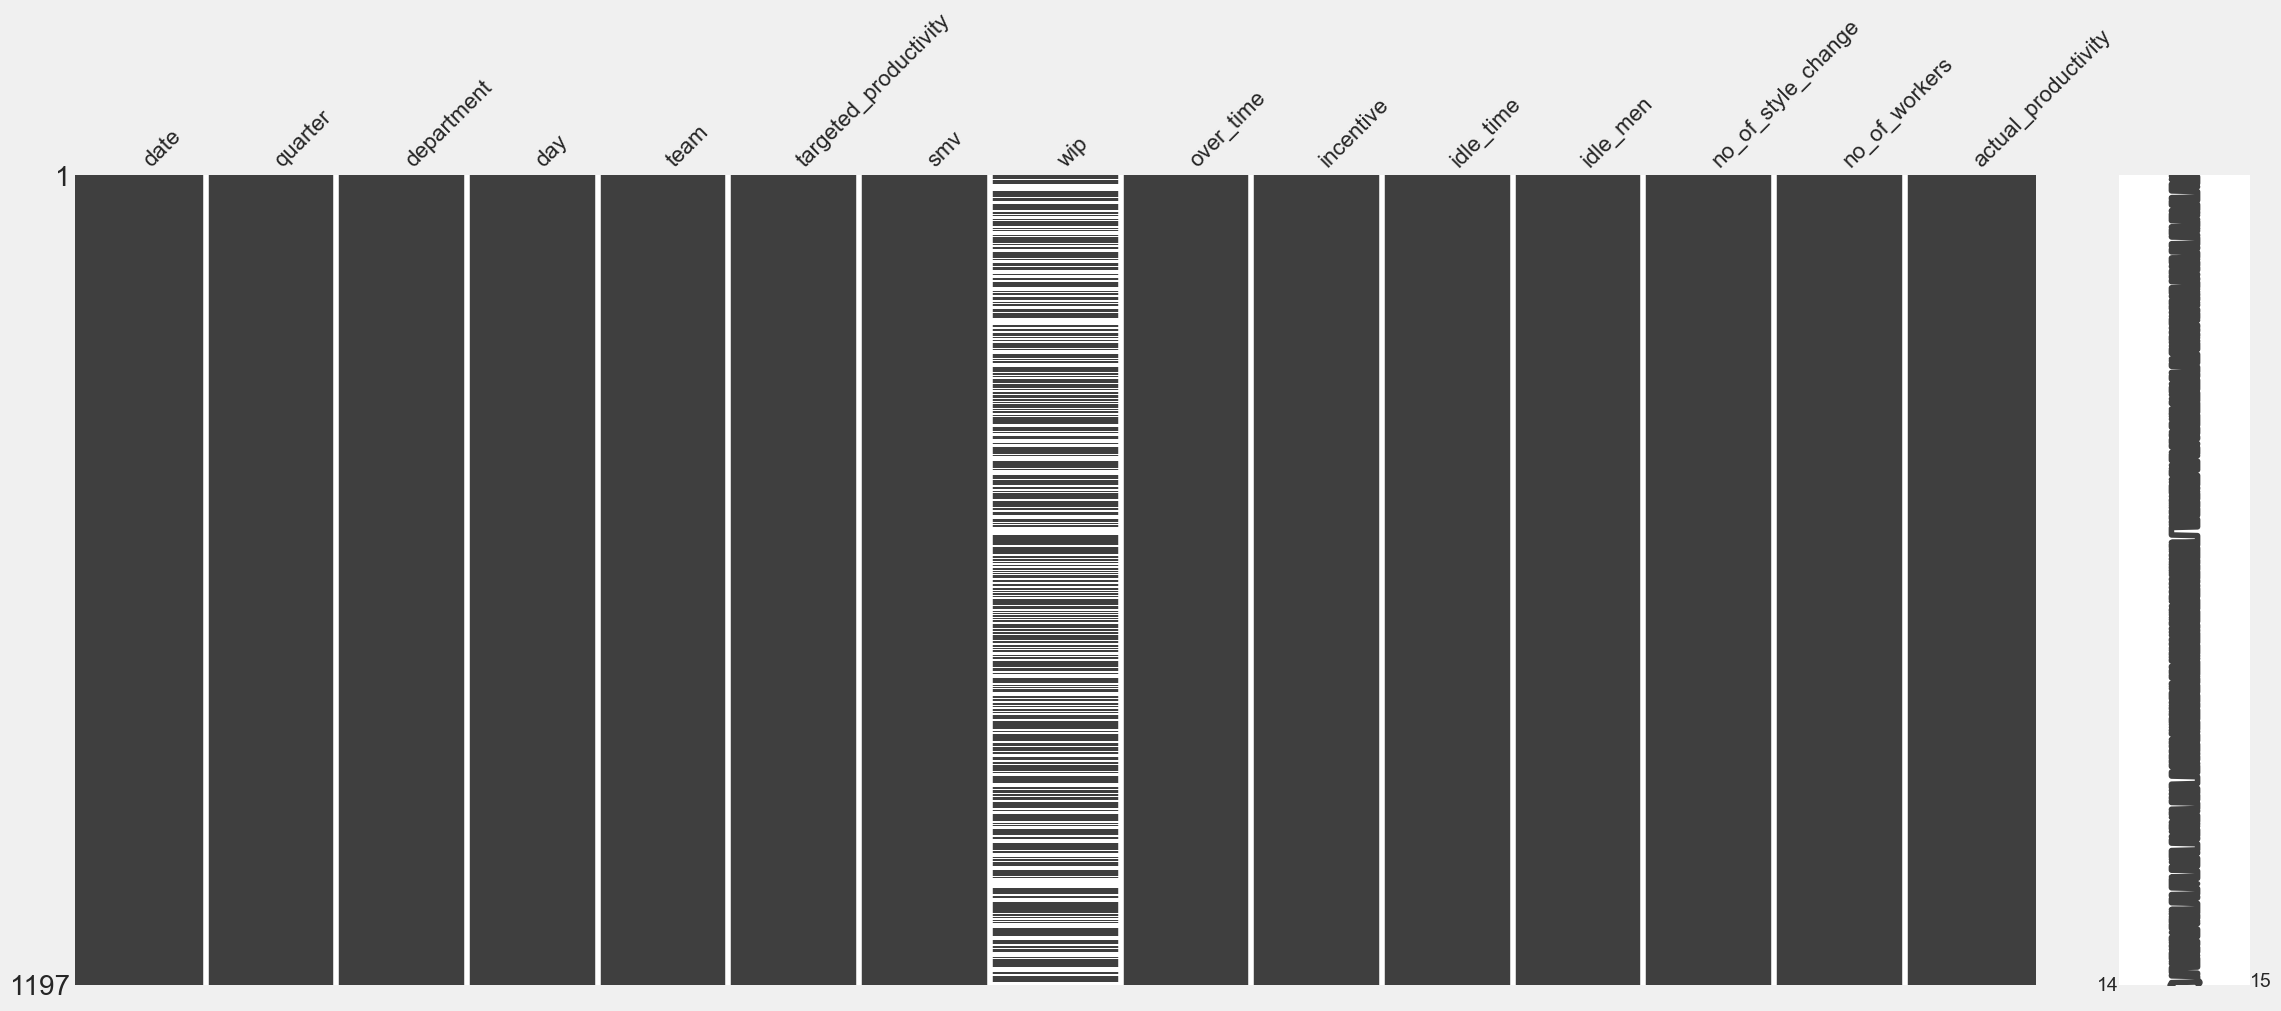

In [73]:
msno.matrix(df)

There are no missing values in any features except the wip (work in progress) feature, which has missing values in nearly  half of the records. In order to determine how to deal with these missing values, let's analyze the datatype.

In [74]:
df['wip'].head()

0    1108.0
1       NaN
2     968.0
3     968.0
4    1170.0
Name: wip, dtype: float64

The feature is a numerical one. There are number of options for handling missing numeric values including deleting them (row or column) or replacing with the mean, median, mode, previous value, next value or imputing them using interpolation.

Let's see the distribution of the column to determine the best option.

In [75]:
df['wip'].value_counts(bins=10)

(-16.116, 2318.5]     681
(20810.5, 23122.0]      4
(2318.5, 4630.0]        2
(6941.5, 9253.0]        1
(9253.0, 11564.5]       1
(11564.5, 13876.0]      1
(16187.5, 18499.0]      1
(4630.0, 6941.5]        0
(13876.0, 16187.5]      0
(18499.0, 20810.5]      0
Name: wip, dtype: int64

From the table above, the bulk of the records fall between the range of -16 and 2318. Then there are some extreme outliers in teh 20k-23k range. This makes our histogram look like this:

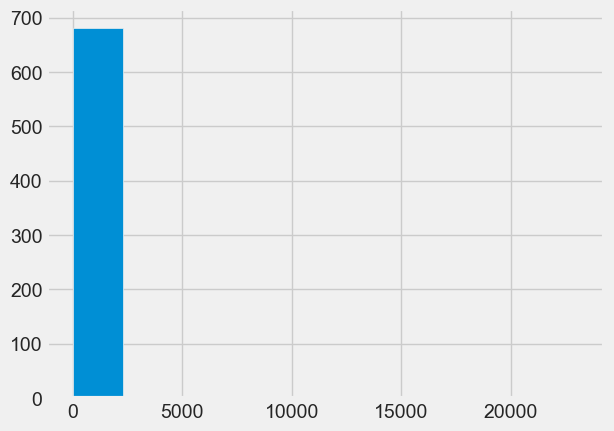

In [76]:
plt.hist(df['wip'].dropna(), bins=10)
plt.show()

Using the mean will be a bad idea because it will be overly influenced by outliers. Let's visualize this column in a boxplot to see the spread.

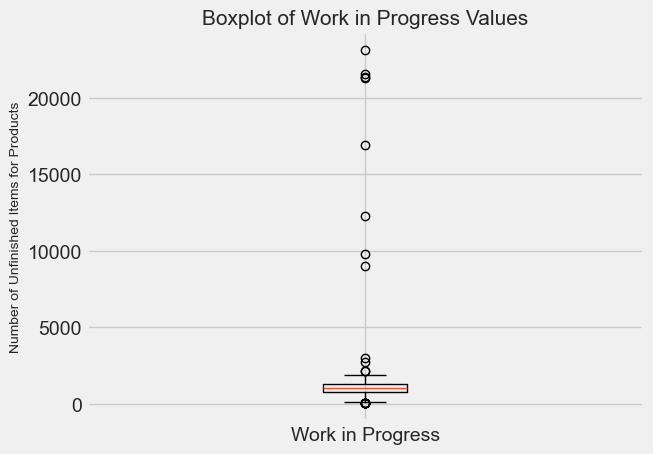

In [77]:
plt.boxplot(df['wip'].dropna())
plt.xticks(ticks=plt.xticks()[0], labels=['Work in Progress'])
plt.ylabel('Number of Unfinished Items for Products', size=10)
plt.title('Boxplot of Work in Progress Values', size=15)
plt.show()

Let's compare the mean and median of the feature.

In [78]:
df['wip'].describe()

count      691.000000
mean      1190.465991
std       1837.455001
min          7.000000
25%        774.500000
50%       1039.000000
75%       1252.500000
max      23122.000000
Name: wip, dtype: float64

While the mean is not significantly higher than the median (a more balanced metric unaffected by outliers), let's determine the interquartile range, in order to assess the mean appropriately.

In [79]:
# First quartile (Q1)
Q1 = np.percentile(df['wip'].dropna(), 25, interpolation='midpoint')
# Third quartile (Q3)
Q3 = np.percentile(df['wip'].dropna(), 75, interpolation='midpoint')
# Interquaritle range (IQR)
IQR = Q3 - Q1

print({'Q1':Q1, 'Q3':Q3, 'IQR':IQR})

{'Q1': 774.5, 'Q3': 1252.5, 'IQR': 478.0}


The mean falls between the median and the 3rd quartile. Given how many empty values, filling with the mean will skew the dataset toward that value. Before we select an option, let's see a sample subset of the column.

In [80]:
print(df['wip'].dropna().sample(50))

888      1060.0
1159      756.0
359      1206.0
780       919.0
309       585.0
65       1227.0
659      1283.0
446      1764.0
557       881.0
472       976.0
709      1025.0
402      1472.0
229       723.0
561     16882.0
98        910.0
343      1134.0
168       966.0
869       922.0
27        844.0
74        757.0
410      1295.0
310      1138.0
82        666.0
89       1305.0
120      1144.0
935      1653.0
862       841.0
363      1735.0
1180      560.0
667       629.0
760       957.0
978       609.0
945       694.0
79        944.0
720       854.0
877      1717.0
1080     1117.0
163      1082.0
946       816.0
702       640.0
1027      601.0
1081      230.0
515       717.0
579      1435.0
378      1244.0
95       1101.0
777       700.0
934       361.0
450      1118.0
933       847.0
Name: wip, dtype: float64


Let's chart a few sample distributions of the feature.

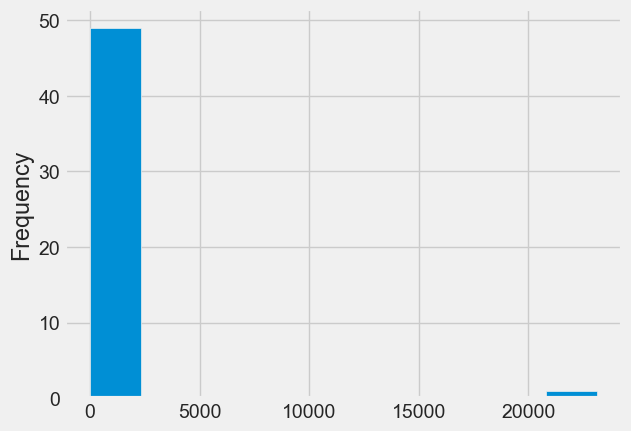

In [81]:
df['wip'].dropna().sample(50).plot.hist()
plt.show()

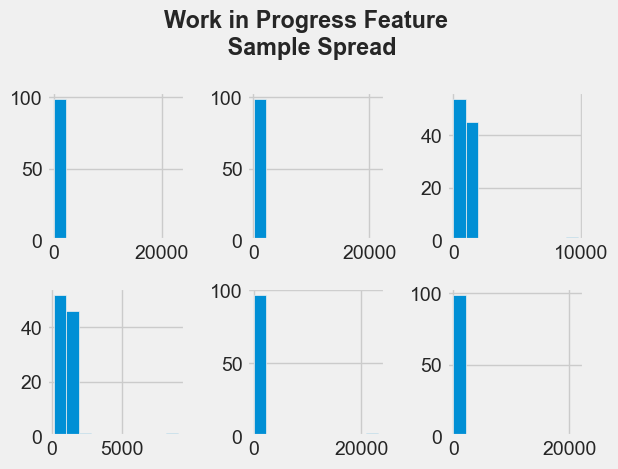

In [82]:
plot_num = list(range(0,6))

for num in plot_num:
    plt.subplot(2, 3, num+1)
    plt.hist(df['wip'].dropna().sample(100))
    plt.tight_layout()


plt.suptitle(t='Work in Progress Feature \n Sample Spread', weight='bold')
plt.tight_layout()
plt.show()

From these subplots, when the outliers are reduced, the feature distribution is normal. Let's check this again.

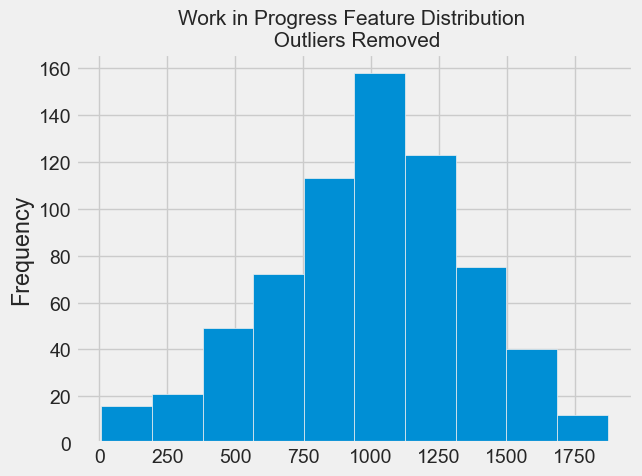

In [83]:
df['wip'].loc[df['wip'] <= Q3+1.5*IQR].plot.hist()
plt.title('Work in Progress Feature Distribution \n Outliers Removed', size=15)
plt.show()

In [84]:
df['wip'].loc[df['wip'] <= Q3+1.5*IQR].describe()

count     679.000000
mean      997.742268
std       359.504432
min         7.000000
25%       768.500000
50%      1035.000000
75%      1233.000000
max      1871.000000
Name: wip, dtype: float64

In [85]:
df['wip'].loc[df['wip'] <= Q3+1.5*IQR].mode()

0    1039.0
Name: wip, dtype: float64

While the mean is slightly to the left of the median and the mode (a left skew), this distribution is more normal than the whole feature. We'll be using the mean of this distribution to replace our outliers, using the [SimpleImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html) class in sklearn.

In [86]:
imputer = SimpleImputer(missing_values=np.nan,
                        strategy="constant",
                        fill_value=df['wip'].loc[df['wip'] <= Q3+1.5*IQR].mean())
wip_1 = imputer.fit_transform(df[['wip']])

In [87]:
imputer = SimpleImputer(missing_values=np.nan,
                        strategy="constant",
                        fill_value=0)
wip_2 = imputer.fit_transform(df[['wip']])

Let's plot both imputations to find which one is as close to the original.

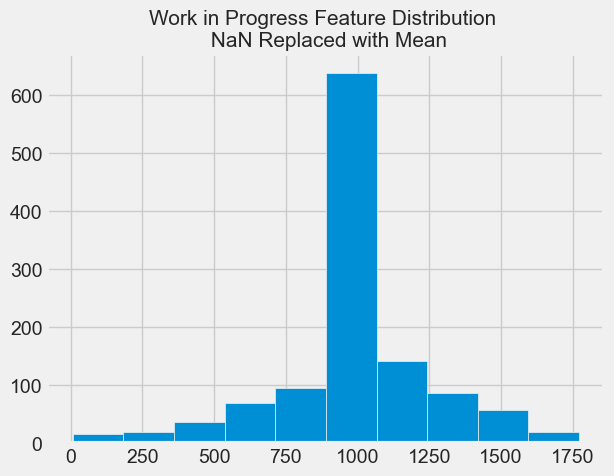

In [88]:
wip1_Q1 = np.percentile(wip_1, 25,
                        interpolation='midpoint')
wip1_Q3 = np.percentile(wip_1, 75,
                        interpolation='midpoint')
wip1_IQR = Q3 - Q1

plt.hist(wip_1[wip_1 <= wip1_Q3+1.5*wip1_IQR])
plt.title('Work in Progress Feature Distribution \n NaN Replaced with Mean', size=15)
plt.show()

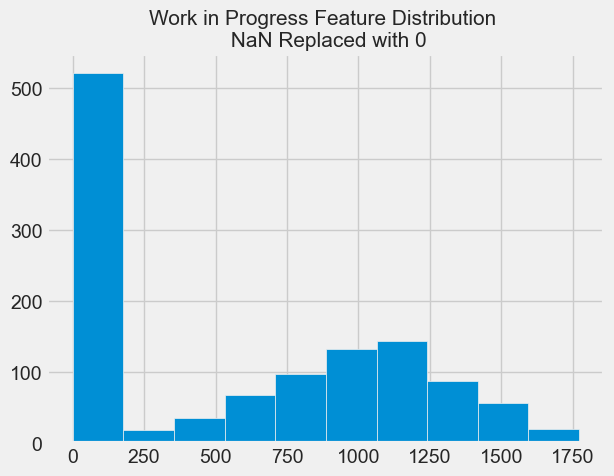

In [89]:
wip2_Q1 = np.percentile(wip_2, 25,
                        interpolation='midpoint')
wip2_Q3 = np.percentile(wip_2, 75,
                        interpolation='midpoint')
wip2_IQR = Q3 - Q1

plt.hist(wip_2[wip_2 <= wip2_Q3 + 1.5 * wip2_IQR])
plt.title('Work in Progress Feature Distribution \n NaN Replaced with 0', size=15)
plt.show()

While the first imputer has a very tall mode, it's located around the mean/ median like the initial feature. We'll use this imputer to update the feature.

In [90]:
imputer = SimpleImputer(missing_values=np.nan,
                        strategy="constant",
                        fill_value=df['wip'].loc[df['wip'] <= Q3+1.5*IQR].mean())
df['wip'] = imputer.fit_transform(df[['wip']])

In [91]:
df['wip'].describe()

count     1197.000000
mean      1108.997149
std       1398.893371
min          7.000000
25%        970.000000
50%        997.742268
75%       1083.000000
max      23122.000000
Name: wip, dtype: float64

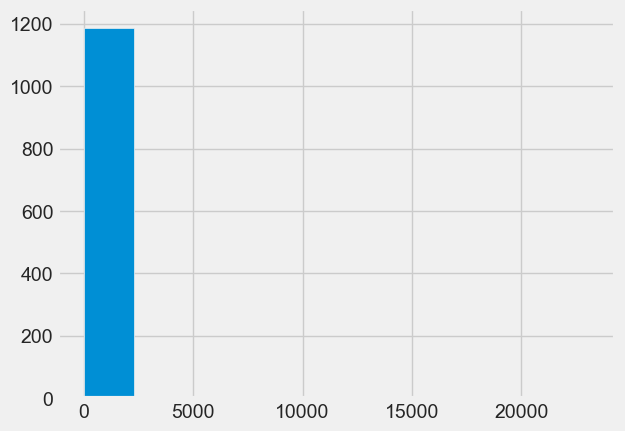

In [92]:
plt.hist(df['wip'].dropna(), bins=10)
plt.show()

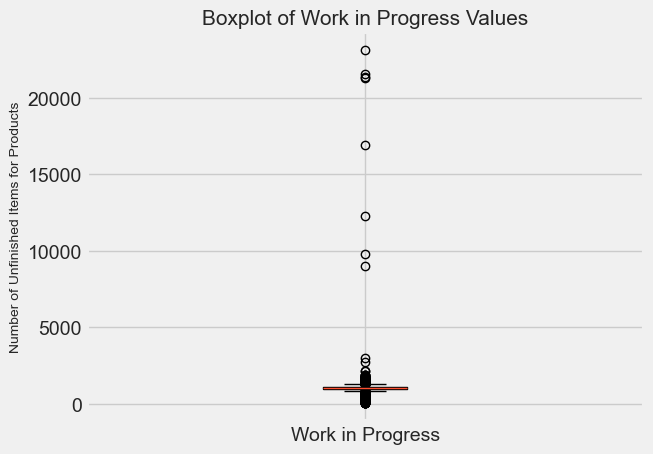

In [93]:
plt.boxplot(df['wip'].dropna())
plt.xticks(ticks=plt.xticks()[0], labels=['Work in Progress'])
plt.ylabel('Number of Unfinished Items for Products', size=10)
plt.title('Boxplot of Work in Progress Values', size=15)
plt.show()

Let's check for missing values again

<AxesSubplot:>

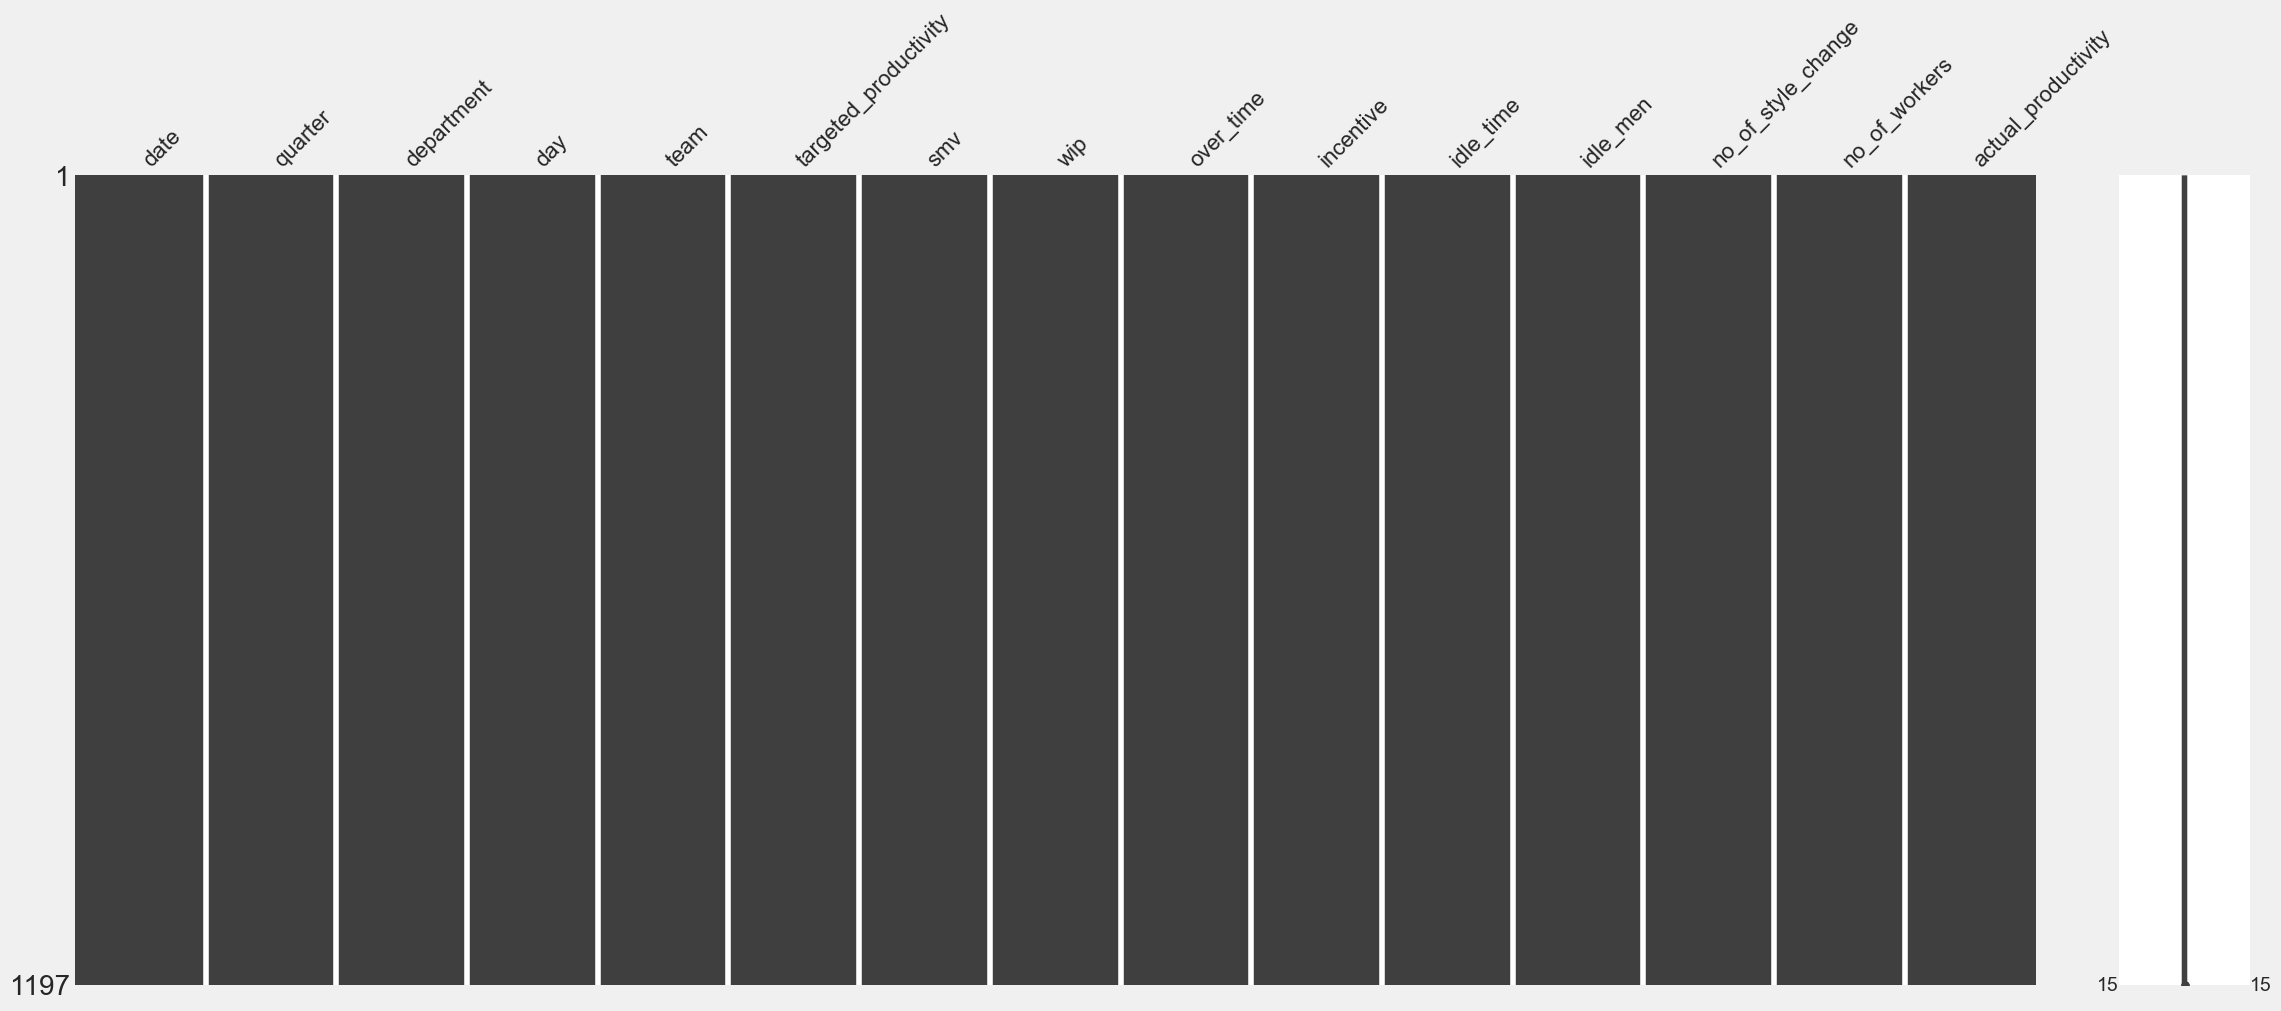

In [94]:
msno.matrix(df)

Let's clean the values in the department column. We'll correct the department value 'sweing' to sewing. Finishing is represented twice, which implies leading or trailing spaces. Let's clean and check again.

In [95]:
df['department'] = df['department'].apply(lambda x: 'sewing' if x == 'sweing' else x)

df['department'] = df['department'].apply(lambda x: x.strip())

df['department'].value_counts()

sewing       691
finishing    506
Name: department, dtype: int64

There are none. We'll move on to EDA.

### Exploratory Data Analysis
Our EDA will involve the following:
* descriptive statistics
* heatmap to find feature correlations
* finding the date range of the dataset
* spread of the department feature
* department vs actual productivity
* Team Number vs actual productivity
* smv vs actual productivity
* wip vs actual productivity
* overtime vs actual productivity
* incentive vs actual productivity
* idle time vs actual productivity
* idle men vs actual productivity
* number of product style changes vs actual productivity
* number of workers in a team vs actual productivity


In [96]:
df.head()

date   quarter department       day  team  targeted_productivity  \
0 2015-01-01  Quarter1     sewing  Thursday     8                   0.80   
1 2015-01-01  Quarter1  finishing  Thursday     1                   0.75   
2 2015-01-01  Quarter1     sewing  Thursday    11                   0.80   
3 2015-01-01  Quarter1     sewing  Thursday    12                   0.80   
4 2015-01-01  Quarter1     sewing  Thursday     6                   0.80   

     smv          wip  over_time  incentive  idle_time  idle_men  \
0  26.16  1108.000000       7080         98        0.0         0   
1   3.94   997.742268        960          0        0.0         0   
2  11.41   968.000000       3660         50        0.0         0   
3  11.41   968.000000       3660         50        0.0         0   
4  25.90  1170.000000       1920         50        0.0         0   

   no_of_style_change  no_of_workers  actual_productivity  
0                   0           59.0             0.940725  
1                   0            8.0             0.886500  
2                   0           30.5             0.800570  
3                   0           30.5             0.800570  
4                   0           56.0             0.800382

**Statistical Analysis**

In [97]:
df.describe()

team  targeted_productivity          smv           wip  \
count  1197.000000            1197.000000  1197.000000   1197.000000   
mean      6.426901               0.729632    15.062172   1108.997149   
std       3.463963               0.097891    10.943219   1398.893371   
min       1.000000               0.070000     2.900000      7.000000   
25%       3.000000               0.700000     3.940000    970.000000   
50%       6.000000               0.750000    15.260000    997.742268   
75%       9.000000               0.800000    24.260000   1083.000000   
max      12.000000               0.800000    54.560000  23122.000000   

          over_time    incentive    idle_time     idle_men  \
count   1197.000000  1197.000000  1197.000000  1197.000000   
mean    4567.460317    38.210526     0.730159     0.369256   
std     3348.823563   160.182643    12.709757     3.268987   
min        0.000000     0.000000     0.000000     0.000000   
25%     1440.000000     0.000000     0.000000     0.000000   
50%     3960.000000     0.000000     0.000000     0.000000   
75%     6960.000000    50.000000     0.000000     0.000000   
max    25920.000000  3600.000000   300.000000    45.000000   

       no_of_style_change  no_of_workers  actual_productivity  
count         1197.000000    1197.000000          1197.000000  
mean             0.150376      34.609858             0.735091  
std              0.427848      22.197687             0.174488  
min              0.000000       2.000000             0.233705  
25%              0.000000       9.000000             0.650307  
50%              0.000000      34.000000             0.773333  
75%              0.000000      57.000000             0.850253  
max              2.000000      89.000000             1.120437

**Correlation Heatmap**

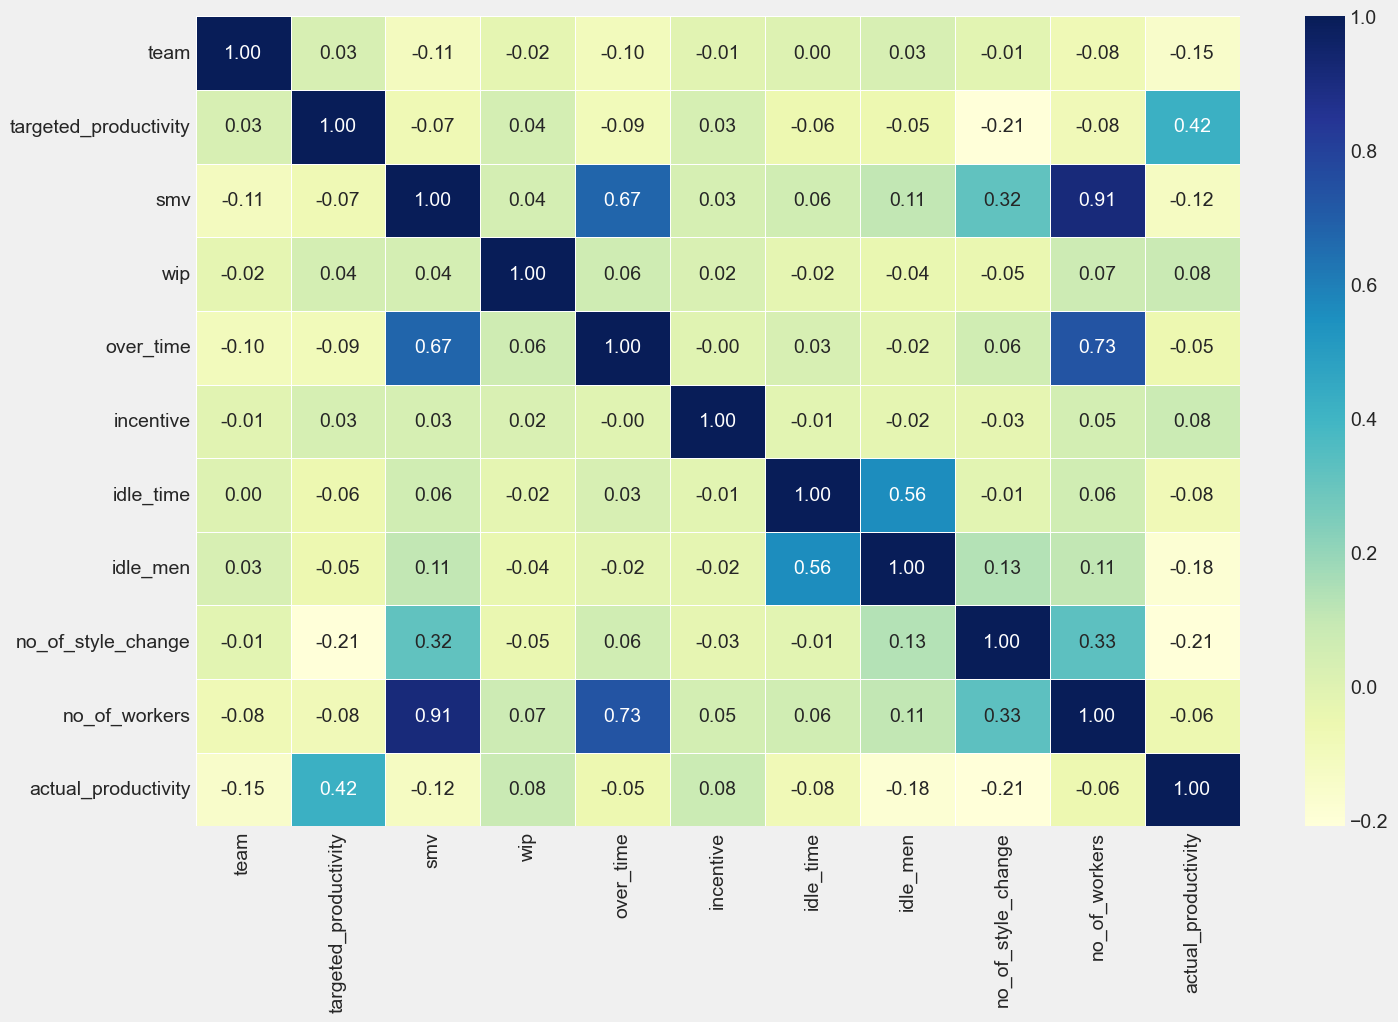

In [98]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(),
            annot=True,
            linewidths=0.5,
            fmt= ".2f",
            cmap="YlGnBu");

There are some feature correlations, but it doesn't seem like any of the features are correlated with actual productivity.

**Pairplot Analysis**

../../compiler/lib/


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 2000x2000 with 0 Axes>

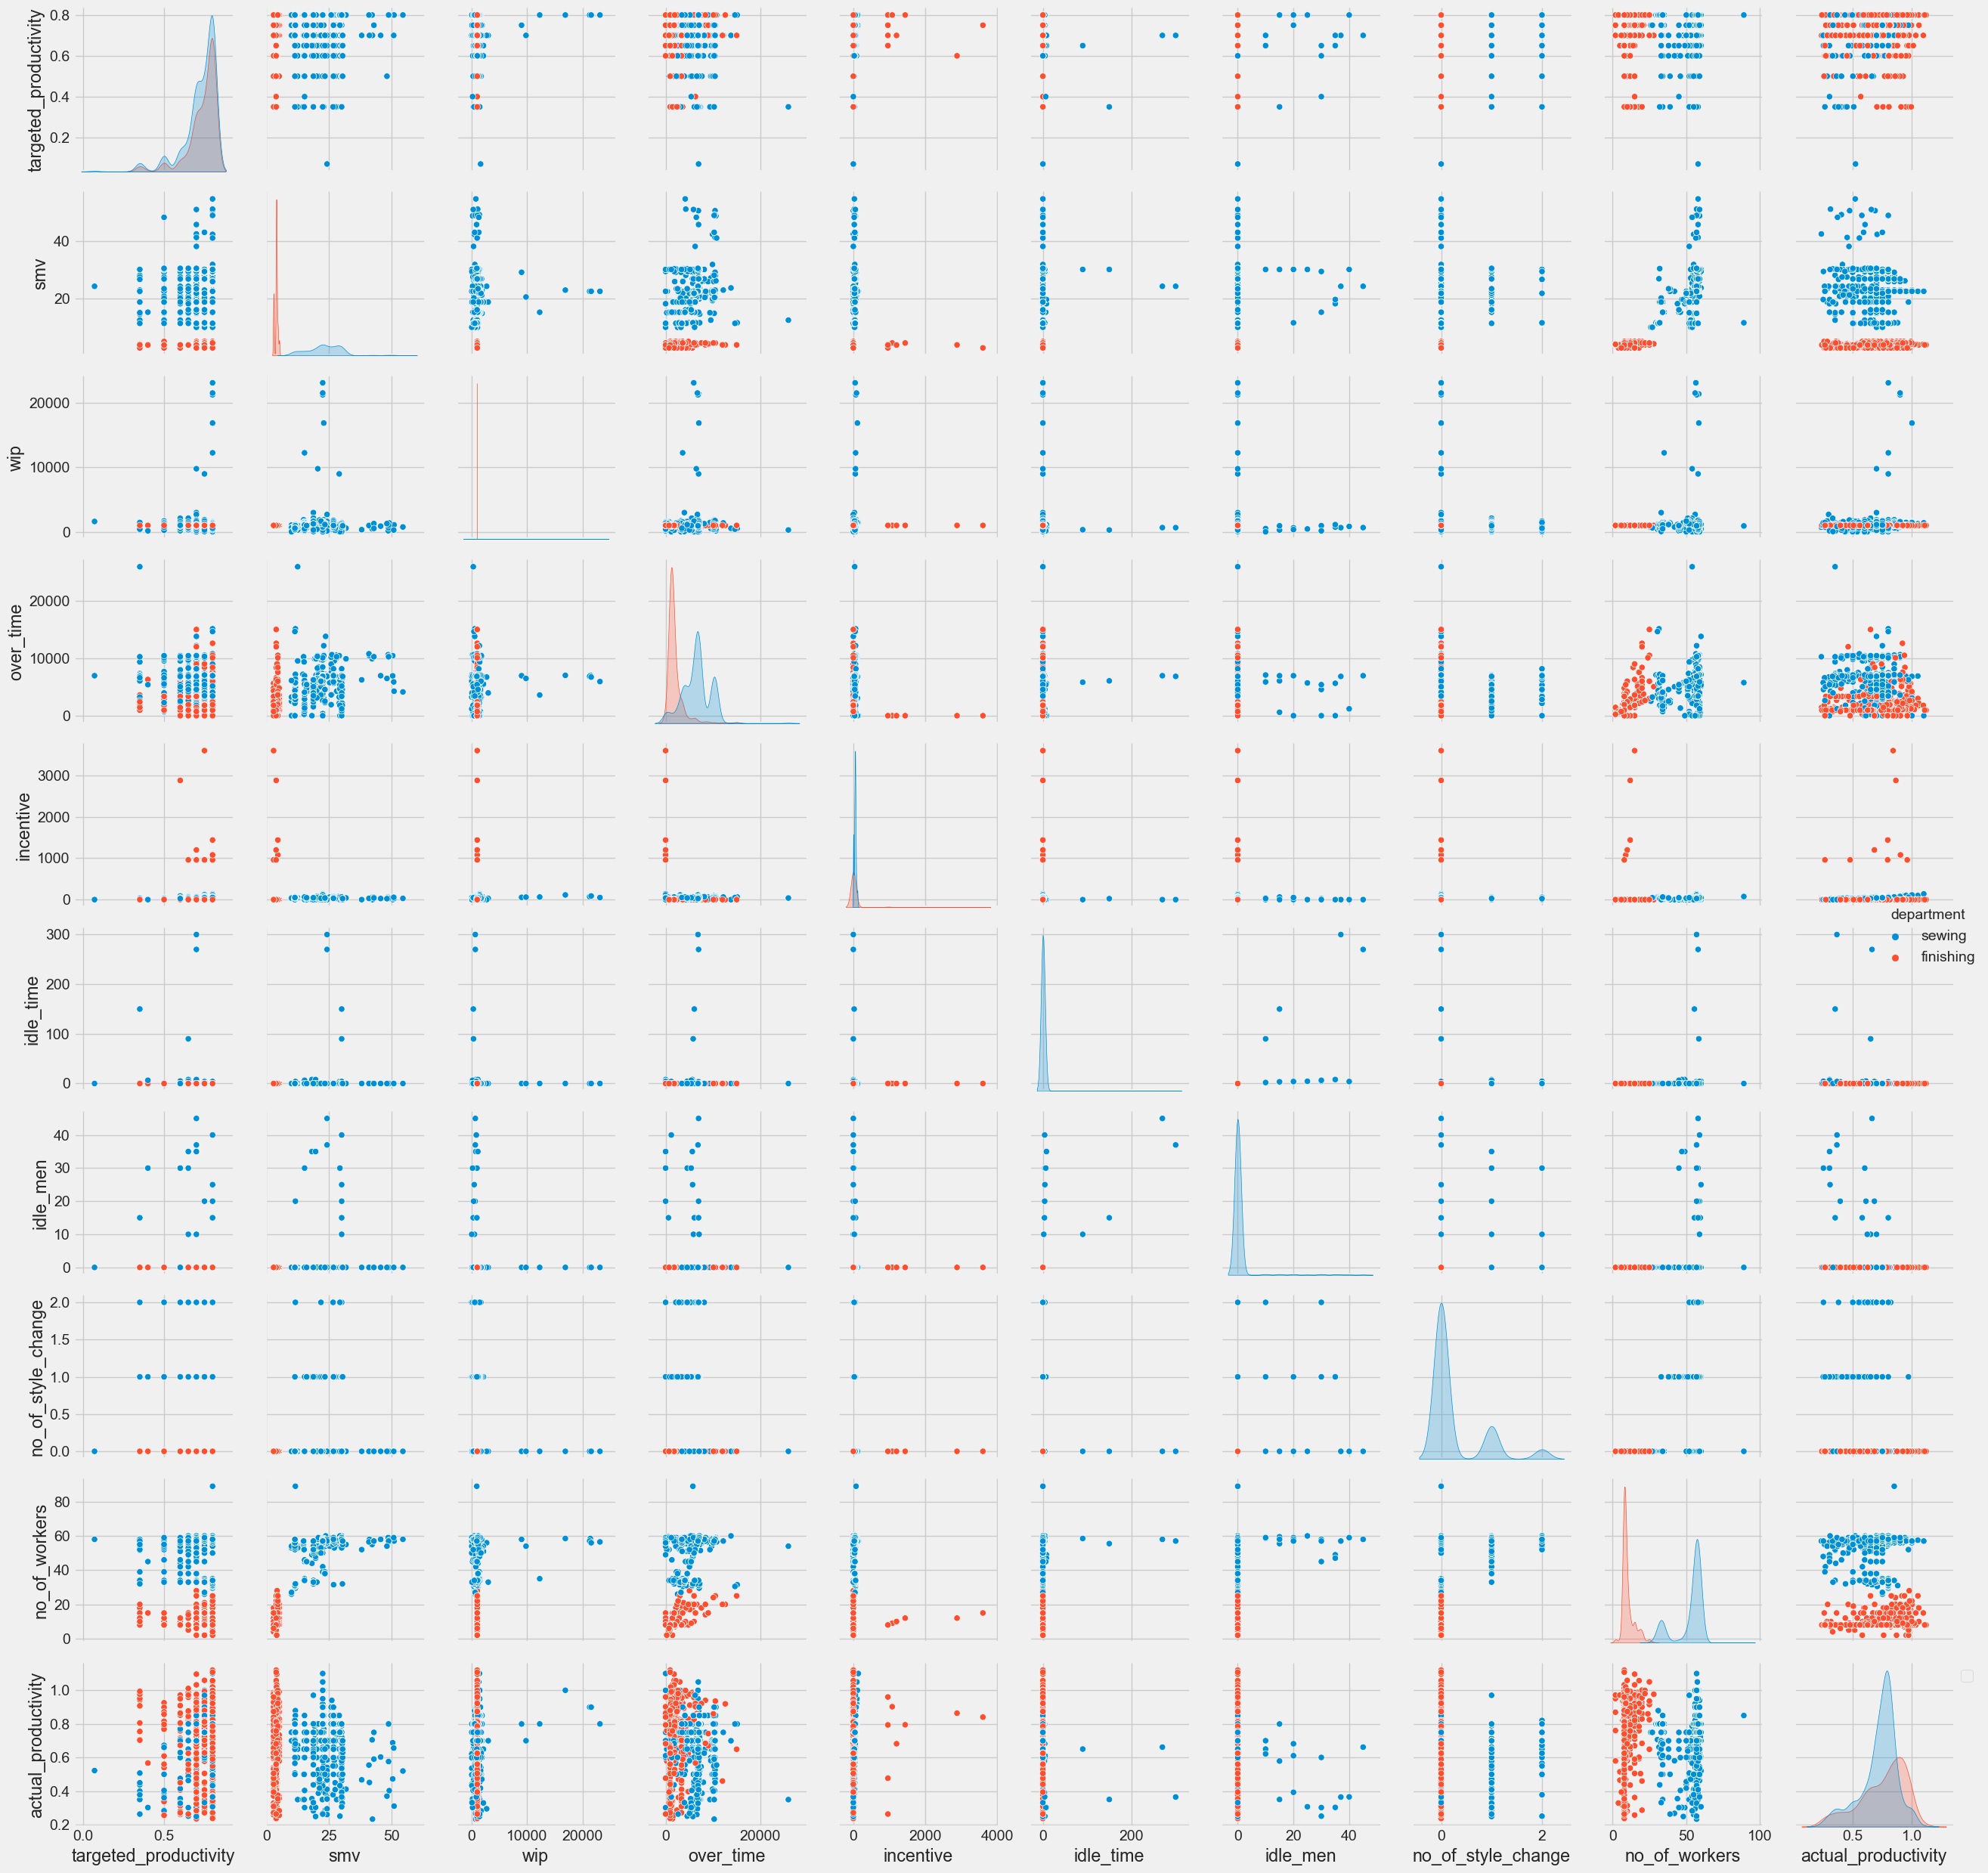

In [99]:
plt.figure(figsize=(20, 20))
sns.pairplot(df.drop(columns=['team']), hue='department')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

This chart is busy. Let's break the pairplot into 2.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 2000x2000 with 0 Axes>

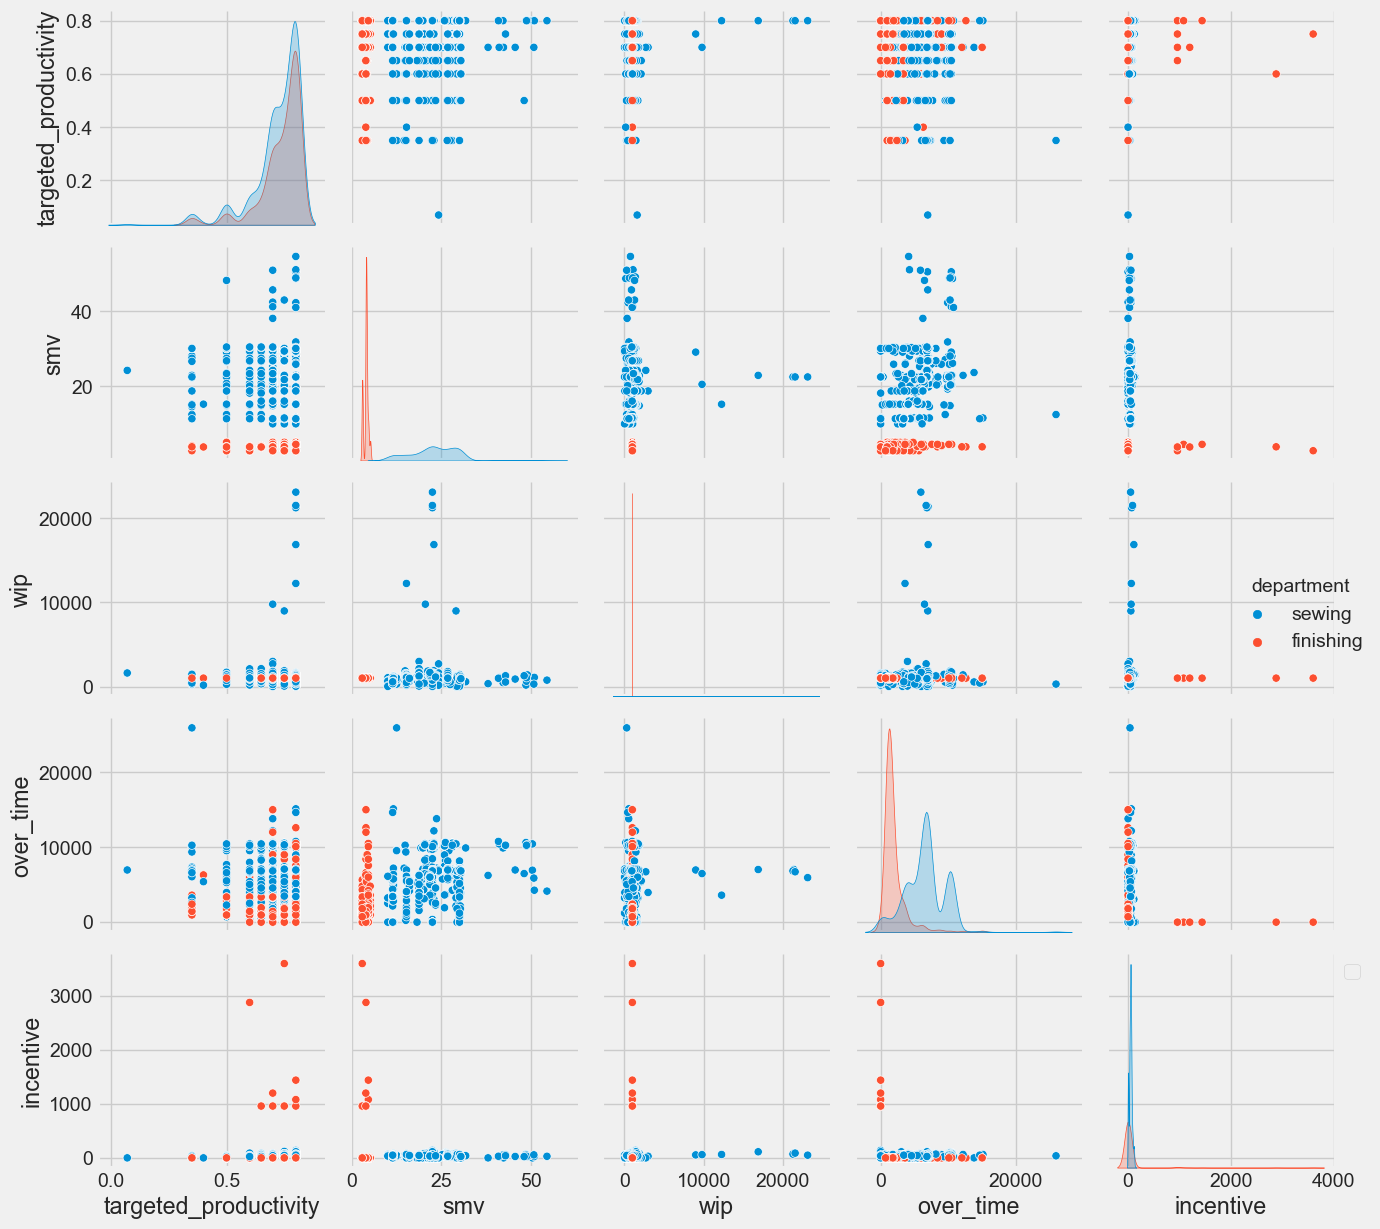

In [100]:
cols = ['targeted_productivity', 'smv', 'wip', 'over_time',
        'department', 'incentive', 'idle_time', 'idle_men',
        'no_of_style_change', 'no_of_workers',
        'actual_productivity', 'department']

plt.figure(figsize=(20, 20))
sns.pairplot(df[cols[:6]], hue='department')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 2000x2000 with 0 Axes>

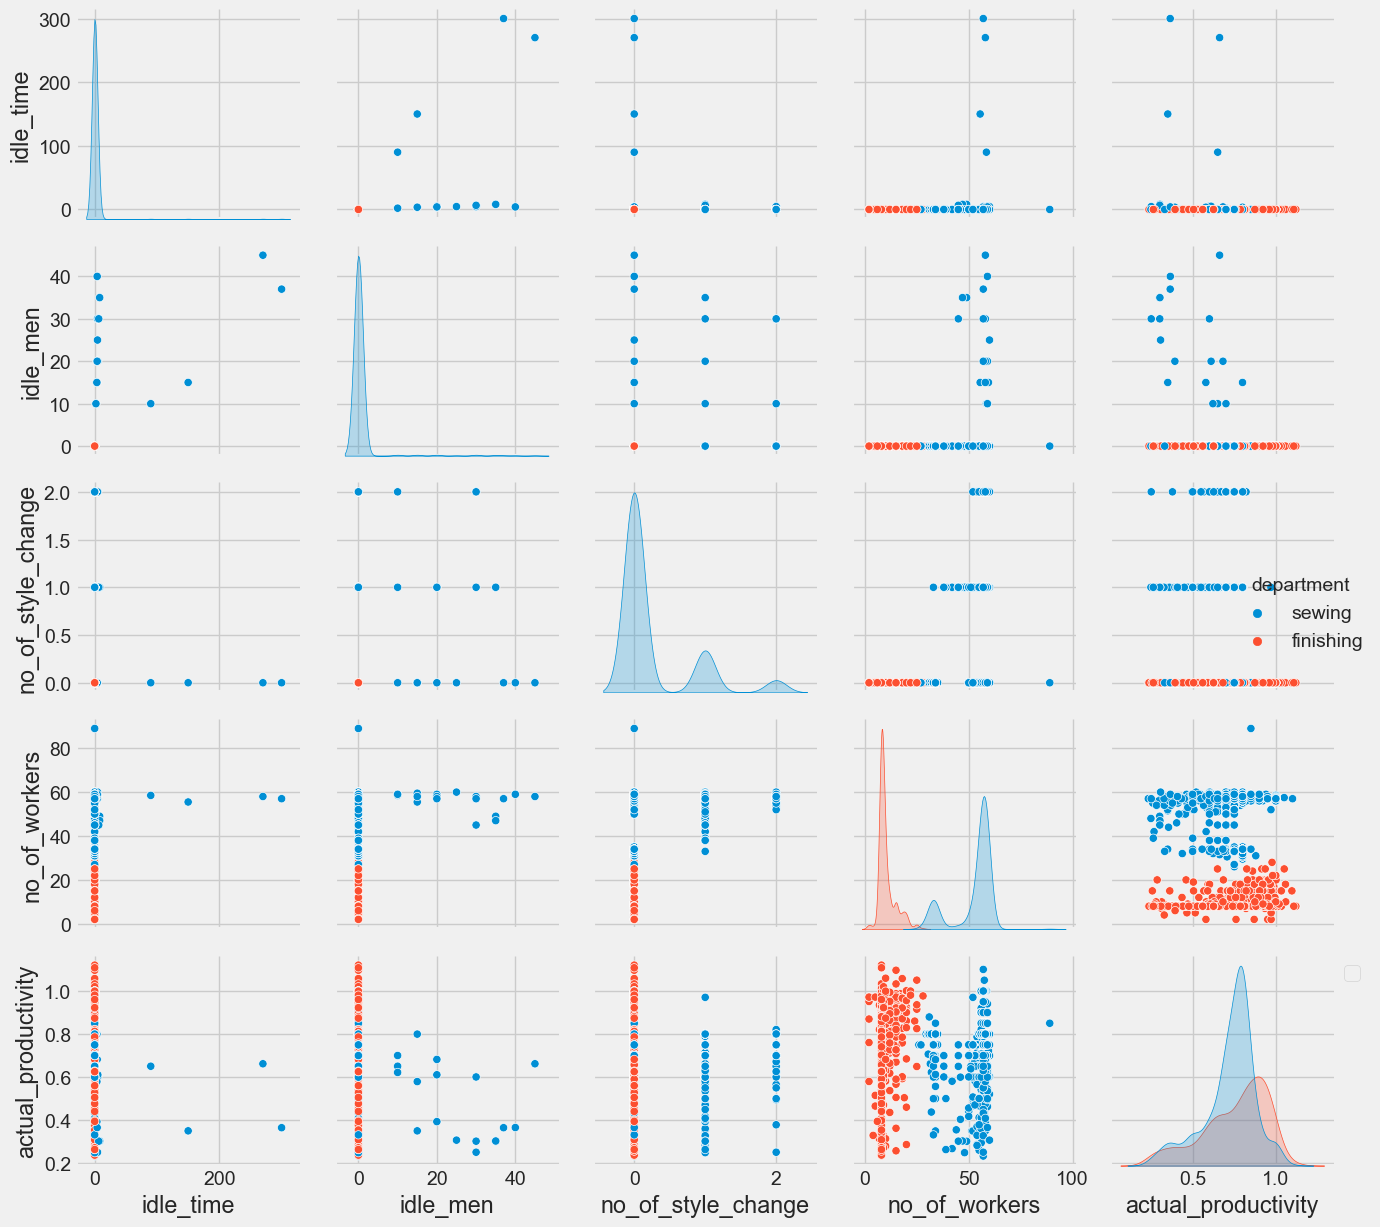

In [101]:
plt.figure(figsize=(20, 20))
sns.pairplot(df[cols[6:]], hue='department')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

**Date Range**

In [102]:
min_date = df['date'].min()
max_date = df['date'].max()

delta = max_date - min_date
print({'min_date':min_date, 'max_date':max_date, 'timedelta in days': delta.days})

{'min_date': Timestamp('2015-01-01 00:00:00'), 'max_date': Timestamp('2015-03-11 00:00:00'), 'timedelta in days': 69}


The dataset contains records collected within a 69-day period between 1st Jan 2015 and 11th March 2015.

**Quarter & Day Features**

In [103]:
df['quarter'].value_counts()

Quarter1    360
Quarter2    335
Quarter4    248
Quarter3    210
Quarter5     44
Name: quarter, dtype: int64

Since Quarter represents weeks in a month - let's consider what quarter 5 represents:

In [104]:
df.loc[df['quarter'] == 'Quarter5']

date   quarter department       day  team  targeted_productivity  \
498 2015-01-29  Quarter5     sewing  Thursday     2                   0.80   
499 2015-01-29  Quarter5  finishing  Thursday     4                   0.80   
500 2015-01-29  Quarter5     sewing  Thursday     3                   0.80   
501 2015-01-29  Quarter5     sewing  Thursday     4                   0.80   
502 2015-01-29  Quarter5     sewing  Thursday    10                   0.80   
503 2015-01-29  Quarter5  finishing  Thursday     6                   0.50   
504 2015-01-29  Quarter5  finishing  Thursday     8                   0.65   
505 2015-01-29  Quarter5  finishing  Thursday    11                   0.60   
506 2015-01-29  Quarter5  finishing  Thursday    10                   0.80   
507 2015-01-29  Quarter5  finishing  Thursday     1                   0.75   
508 2015-01-29  Quarter5     sewing  Thursday     1                   0.75   
509 2015-01-29  Quarter5     sewing  Thursday     9                   0.70   
510 2015-01-29  Quarter5     sewing  Thursday     5                   0.65   
511 2015-01-29  Quarter5  finishing  Thursday     2                   0.80   
512 2015-01-29  Quarter5     sewing  Thursday    12                   0.75   
513 2015-01-29  Quarter5  finishing  Thursday    12                   0.75   
514 2015-01-29  Quarter5     sewing  Thursday    11                   0.60   
515 2015-01-29  Quarter5     sewing  Thursday     6                   0.50   
516 2015-01-29  Quarter5  finishing  Thursday     3                   0.80   
517 2015-01-29  Quarter5     sewing  Thursday     7                   0.65   
518 2015-01-31  Quarter5     sewing  Saturday     3                   0.80   
519 2015-01-31  Quarter5     sewing  Saturday     2                   0.80   
520 2015-01-31  Quarter5  finishing  Saturday     2                   0.80   
521 2015-01-31  Quarter5  finishing  Saturday     3                   0.80   
522 2015-01-31  Quarter5  finishing  Saturday     4                   0.80   
523 2015-01-31  Quarter5  finishing  Saturday    10                   0.80   
524 2015-01-31  Quarter5  finishing  Saturday     1                   0.75   
525 2015-01-31  Quarter5  finishing  Saturday     9                   0.75   
526 2015-01-31  Quarter5  finishing  Saturday    12                   0.75   
527 2015-01-31  Quarter5  finishing  Saturday     5                   0.70   
528 2015-01-31  Quarter5  finishing  Saturday     7                   0.70   
529 2015-01-31  Quarter5  finishing  Saturday     8                   0.65   
530 2015-01-31  Quarter5  finishing  Saturday    11                   0.65   
531 2015-01-31  Quarter5  finishing  Saturday     6                   0.60   
532 2015-01-31  Quarter5     sewing  Saturday    10                   0.80   
533 2015-01-31  Quarter5     sewing  Saturday     4                   0.80   
534 2015-01-31  Quarter5     sewing  Saturday     9                   0.75   
535 2015-01-31  Quarter5     sewing  Saturday     1                   0.75   
536 2015-01-31  Quarter5     sewing  Saturday    12                   0.75   
537 2015-01-31  Quarter5     sewing  Saturday     5                   0.70   
538 2015-01-31  Quarter5     sewing  Saturday    11                   0.65   
539 2015-01-31  Quarter5     sewing  Saturday     6                   0.60   
540 2015-01-31  Quarter5     sewing  Saturday     7                   0.70   
541 2015-01-31  Quarter5     sewing  Saturday     8                   0.50   

       smv          wip  over_time  incentive  idle_time  idle_men  \
498  22.52  1416.000000       6840        113        0.0         0   
499   4.30   997.742268       1200          0        0.0         0   
500  22.52  1287.000000       6840        100        0.0         0   
501  22.52  1444.000000       6900         88        0.0         0   
502  22.52  1088.000000       6720         88        0.0         0   
503   2.90   997.742268       1200          0        0.0         0   
504   4.1

Quarter 5 are records for the 29th and 31st days of the month. We can add them to Quarter 4, to properly represent the quarters in a month.

In [105]:
df['quarter'] = df['quarter'].apply(lambda x: 'Quarter4' if x == 'Quarter5' else x)
df['quarter'].value_counts()

Quarter1    360
Quarter2    335
Quarter4    292
Quarter3    210
Name: quarter, dtype: int64

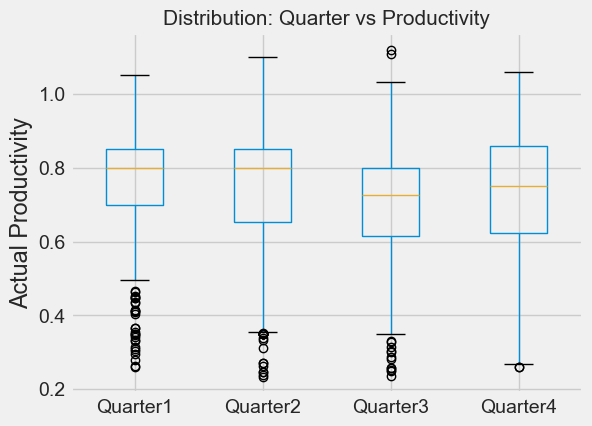

In [106]:
df.boxplot(column=['actual_productivity'], by='quarter')
plt.xlabel('')
plt.ylabel('Actual Productivity')
plt.title('Distribution: Quarter vs Productivity', size=15)
plt.suptitle('')
plt.show()

Quarters 1 & 2 have the highest productivity, however, the Q1 productivity spread is tighter than Q2's. Q4 has the widest productivity spread and the lowest median. Q3 is the worst quarter, with its 75th percentile at 80%

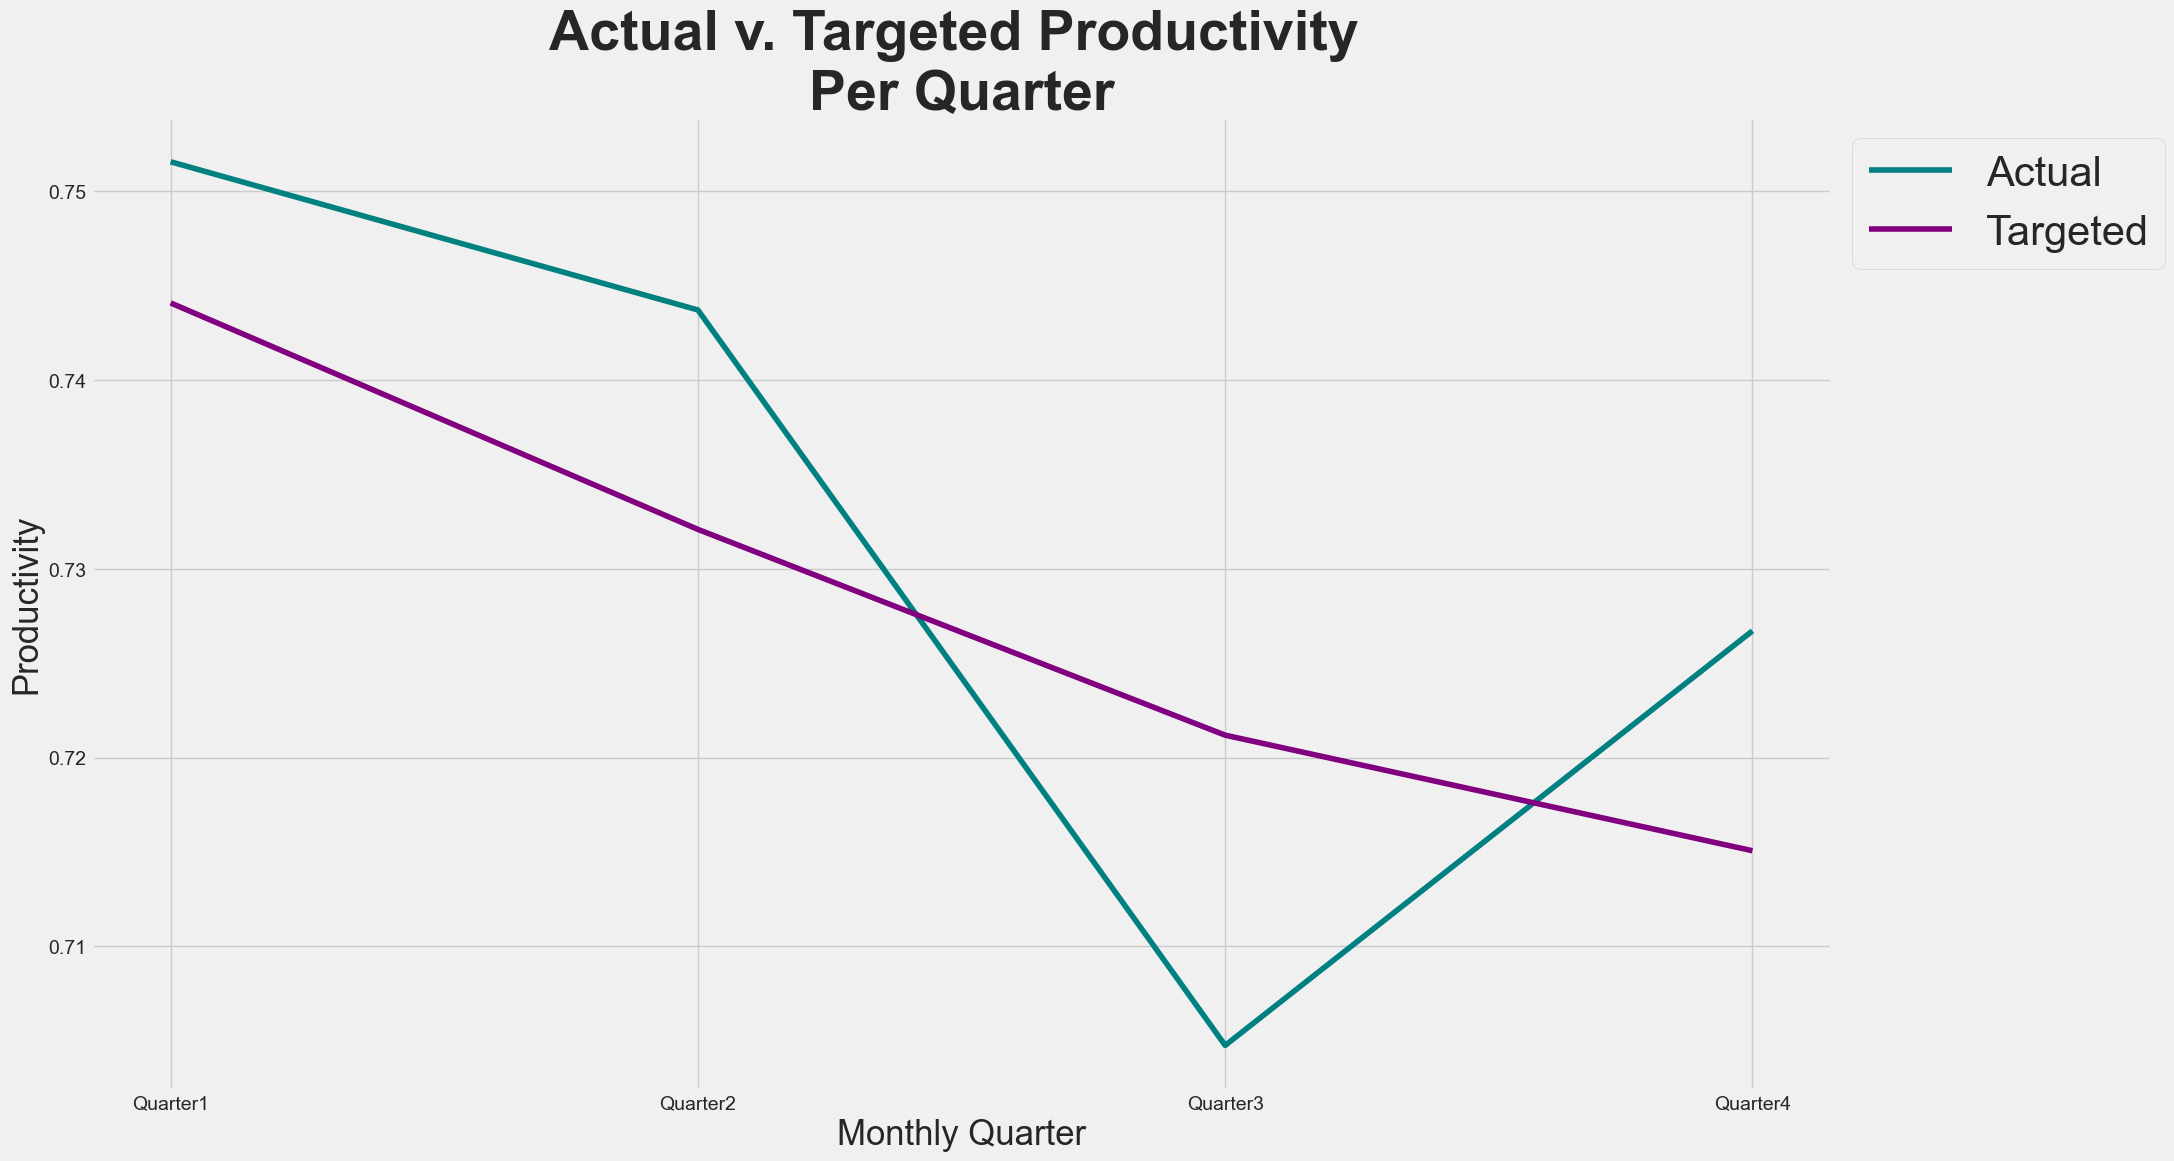

In [107]:
actual_prod_qtr = df.groupby(by=df.quarter).agg({'actual_productivity': np.mean})
target_prod_qtr = df.groupby(by=df.quarter).agg({'targeted_productivity': np.mean})
plt.figure(figsize=(20, 12))

plt.plot(actual_prod_qtr, color='teal', label='Actual')
plt.plot(target_prod_qtr, color='purple', label='Targeted')
plt.xlabel('Monthly Quarter', size=25)
plt.ylabel('Productivity', size=25)
plt.legend(loc='upper left',
           bbox_to_anchor=(1, 1),
           fontsize=30)
plt.title('Actual v. Targeted Productivity \nPer Quarter', weight='bold', size=40)
plt.show()

In [108]:
df['day'] = df['day'].apply(lambda x: x.strip())

In [109]:
df['day'].value_counts(dropna=False)

Wednesday    208
Sunday       203
Tuesday      201
Thursday     199
Monday       199
Saturday     187
Name: day, dtype: int64

In [110]:
days = ['Sunday', 'Monday', 'Tuesday',
        'Wednesday', 'Thursday', 'Saturday']

actual_prod_day = df.groupby(by=df.day).agg({'actual_productivity': np.mean}).reindex(days)
target_prod_day = df.groupby(by=df.day).agg({'targeted_productivity': np.mean})

actual_prod_day

actual_productivity
day                           
Sunday                0.728604
Monday                0.735488
Tuesday               0.742701
Wednesday             0.730462
Thursday              0.722641
Saturday              0.751929

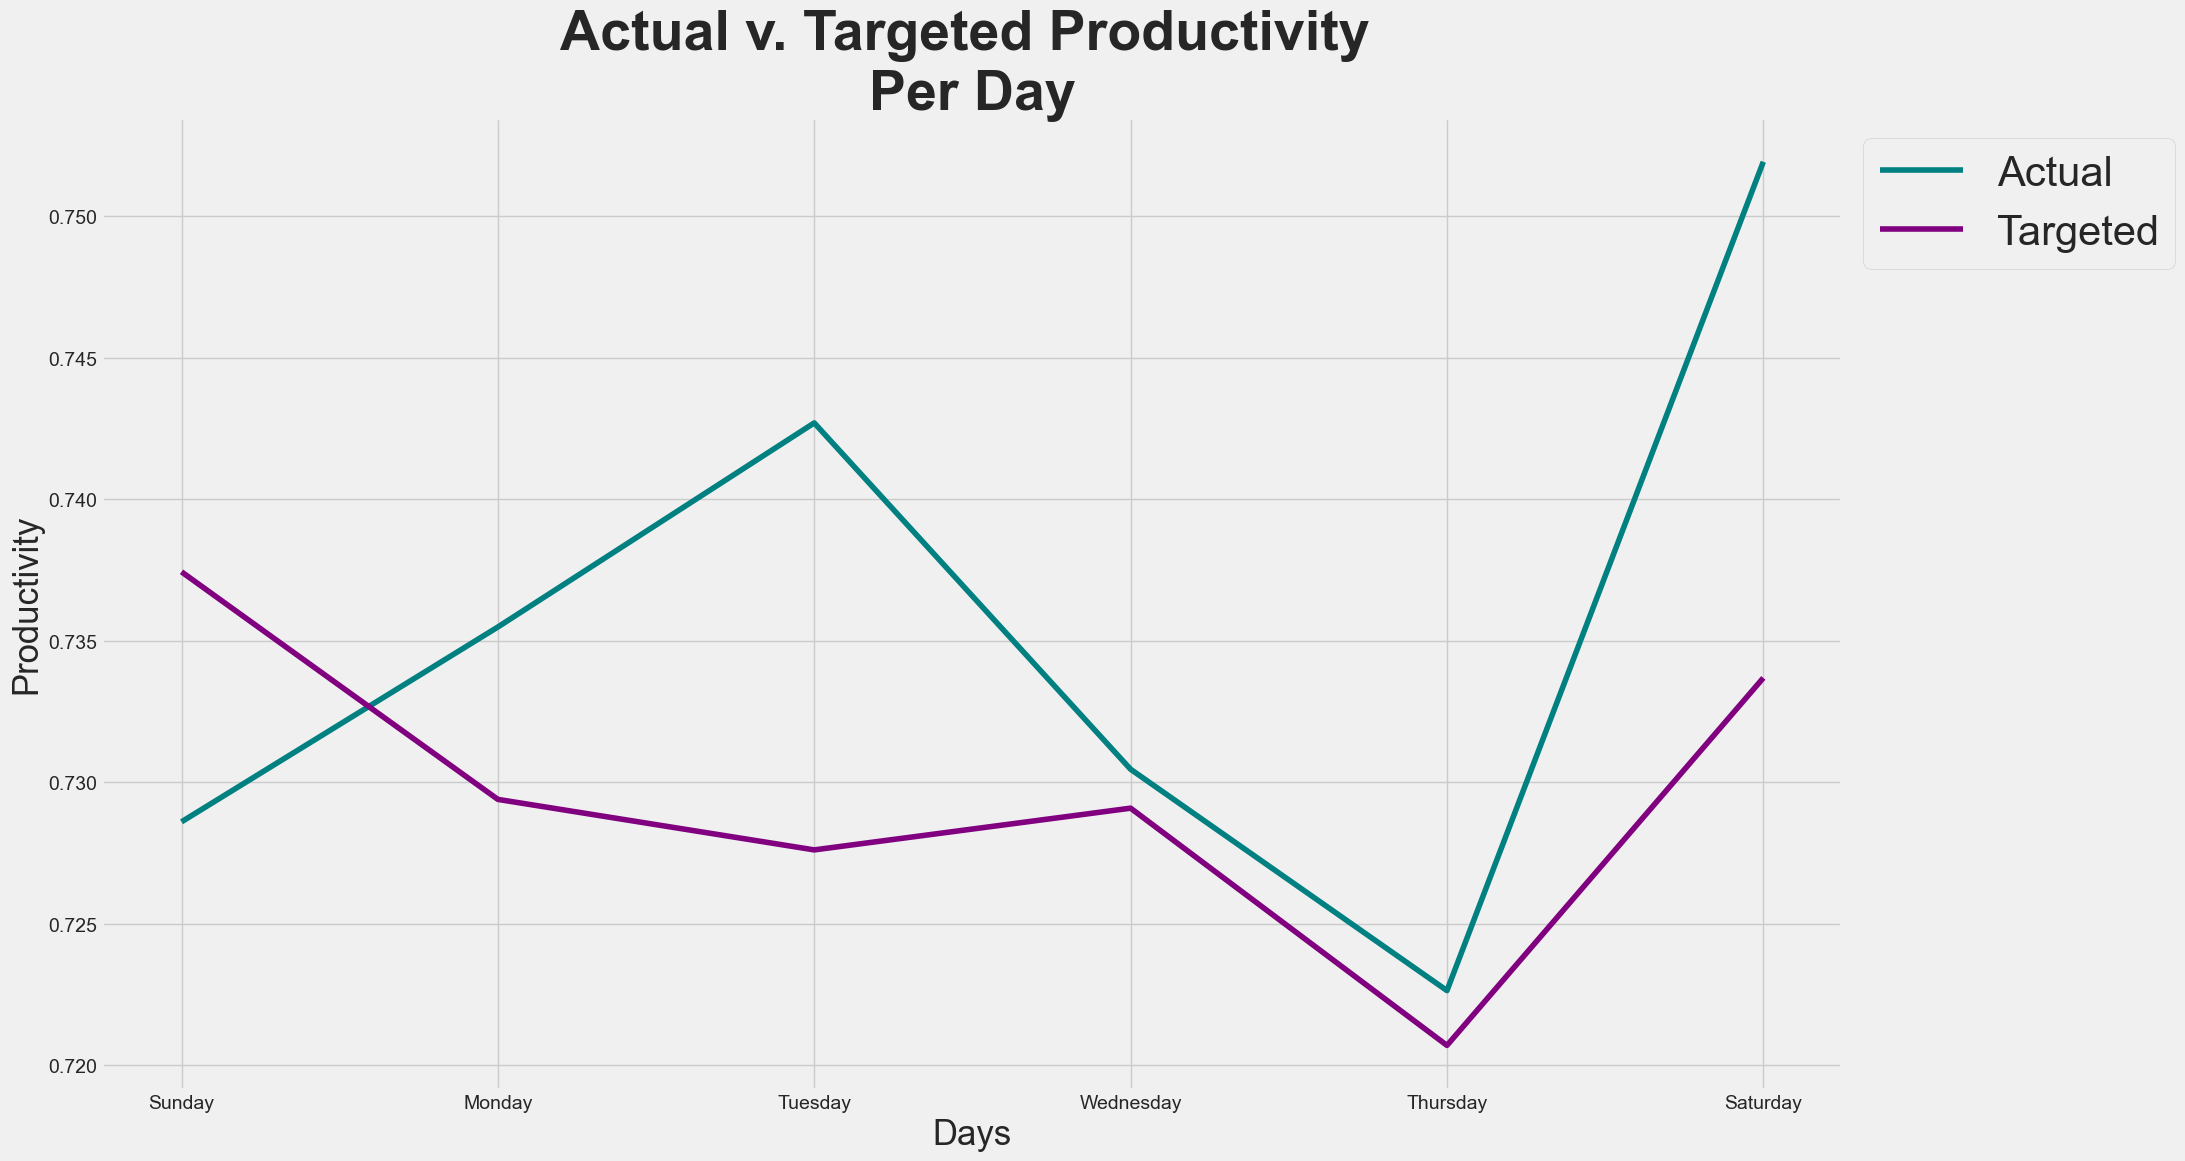

In [111]:
days = ['Sunday', 'Monday', 'Tuesday',
        'Wednesday', 'Thursday', 'Saturday']
actual_prod_day = df.groupby(by=df.day).agg({'actual_productivity': np.mean}).reindex(days)
target_prod_day = df.groupby(by=df.day).agg({'targeted_productivity': np.mean}).reindex(days)

plt.figure(figsize=(20, 12))

plt.plot(actual_prod_day, color='teal', label='Actual')
plt.plot(target_prod_day, color='purple', label='Targeted')
plt.xlabel('Days', size=25)
plt.ylabel('Productivity', size=25)
plt.legend(loc='upper left',
           bbox_to_anchor=(1, 1),
           fontsize=30)
plt.title('Actual v. Targeted Productivity \nPer Day', weight='bold', size=40)
plt.show()

The dataset counts records from Saturday - Thursday.

**Spread of the Department Feature**

In [112]:
df['department'] = df['department'].apply(lambda x: 'sewing' if x == 'sweing' else x)
df['department'] = df['department'].apply(lambda x: x.strip())

df['department'].value_counts()

sewing       691
finishing    506
Name: department, dtype: int64

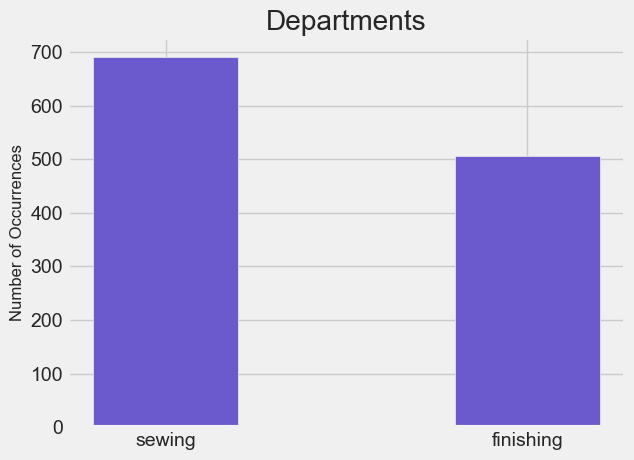

In [113]:
plt.bar(df['department'].value_counts().index,
        df['department'].value_counts(),
        width=0.4,
        color='slateblue')
# plt.xlabel('Departments', size=10)
plt.ylabel('Number of Occurrences', size=12)
plt.title('Departments')
plt.show()

There are 2 departments - sewing and finishing. More records were collected for sewing department than for finishing. Let's check relationship between department and productivity.

**Department vs Actual Productivity**

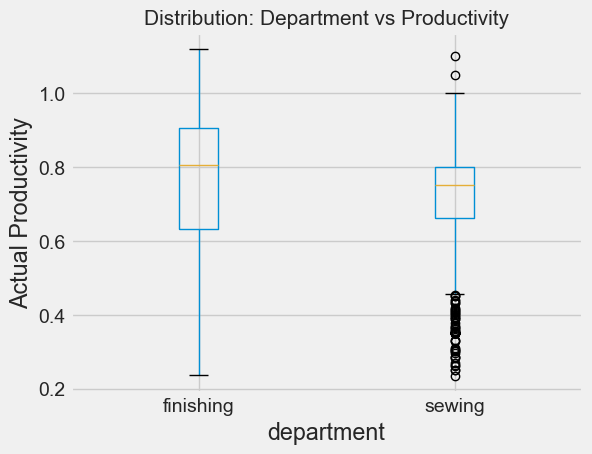

In [114]:
df.boxplot(column=['actual_productivity'], by='department')
plt.ylabel('Actual Productivity')
plt.title('Distribution: Department vs Productivity', size=15)
plt.suptitle('')
plt.show()

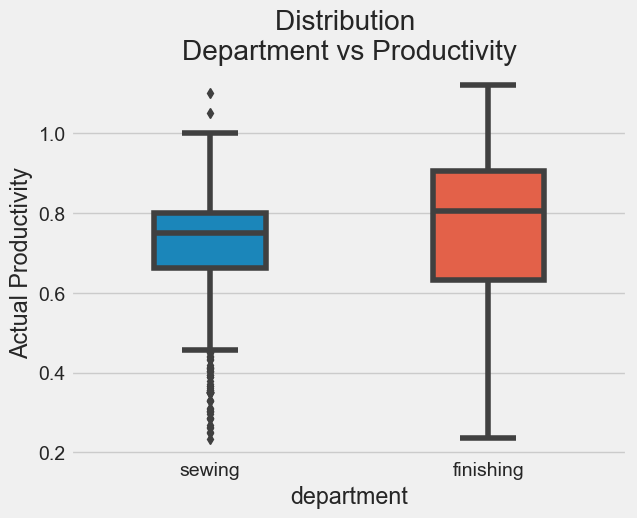

In [115]:
ax = sns.boxplot(x=df['department'],
                 y=df['actual_productivity'],
                 width=0.4)
plt.ylabel('Actual Productivity')
plt.title('Distribution \nDepartment vs Productivity')
plt.show()

The median productivity values for both departments are around the same range. However, the productivity values for the finishing values are more spread and contains no outliers. The IQR values are much tighter in the sewing department with outliers on both whiskers.

**Team vs Actual Productivity**

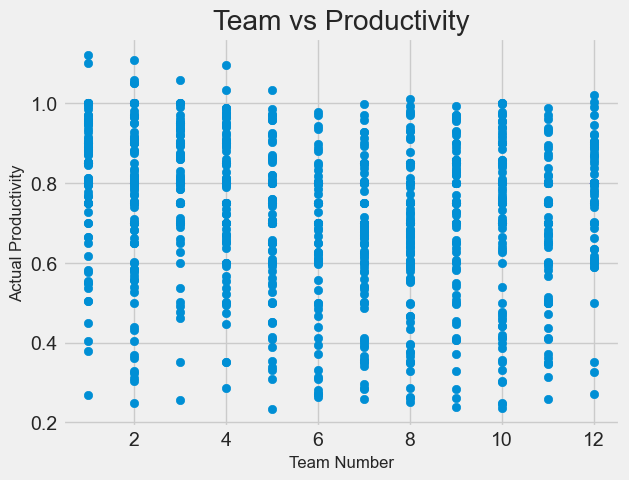

In [116]:
plt.scatter(x=df['team'], y=df['actual_productivity'])
plt.xlabel('Team Number', size=12)
plt.ylabel('Actual Productivity', size=12)
plt.title('Team vs Productivity')
plt.show()

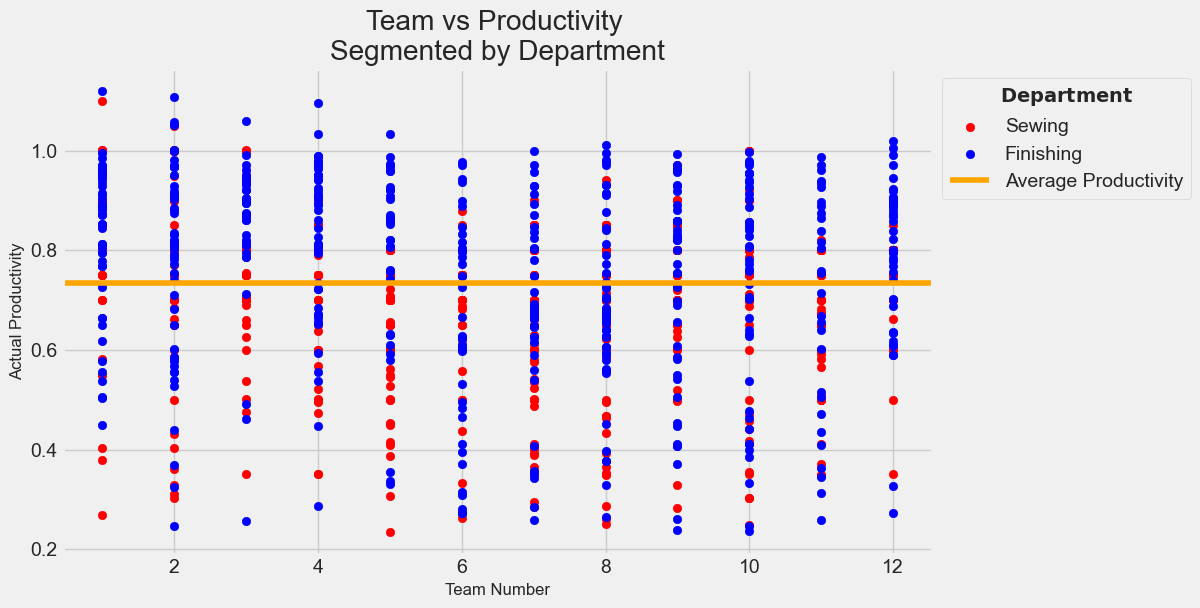

In [117]:
plt.figure(figsize=(10,6))

# Plot Records from Sewing Dept
plt.scatter(df.team[df.department=='sewing'],
            df.actual_productivity[df.department=='sewing'],
            c="red",
            label='Sewing')

# # Plot Records from Finishing Dept
plt.scatter(df.team[df.department=='finishing'],
            df.actual_productivity[df.department=='finishing'],
            c="blue",
            label='Finishing')

# Plot Average Productivity
plt.axhline(df.actual_productivity.mean(),
            color='orange',
            label='Average Productivity')

# Title, Legends and Labels
plt.xlabel('Team Number', size=12)
plt.ylabel('Actual Productivity', size=12)
plt.title('Team vs Productivity \nSegmented by Department')
plt.legend(title=r'$\bf{Department}$',
           loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

With average productivity at 73% and median productivity at 77%, sewing seems more represented below the average and median. We'll group the dataset by team number to investigate further.

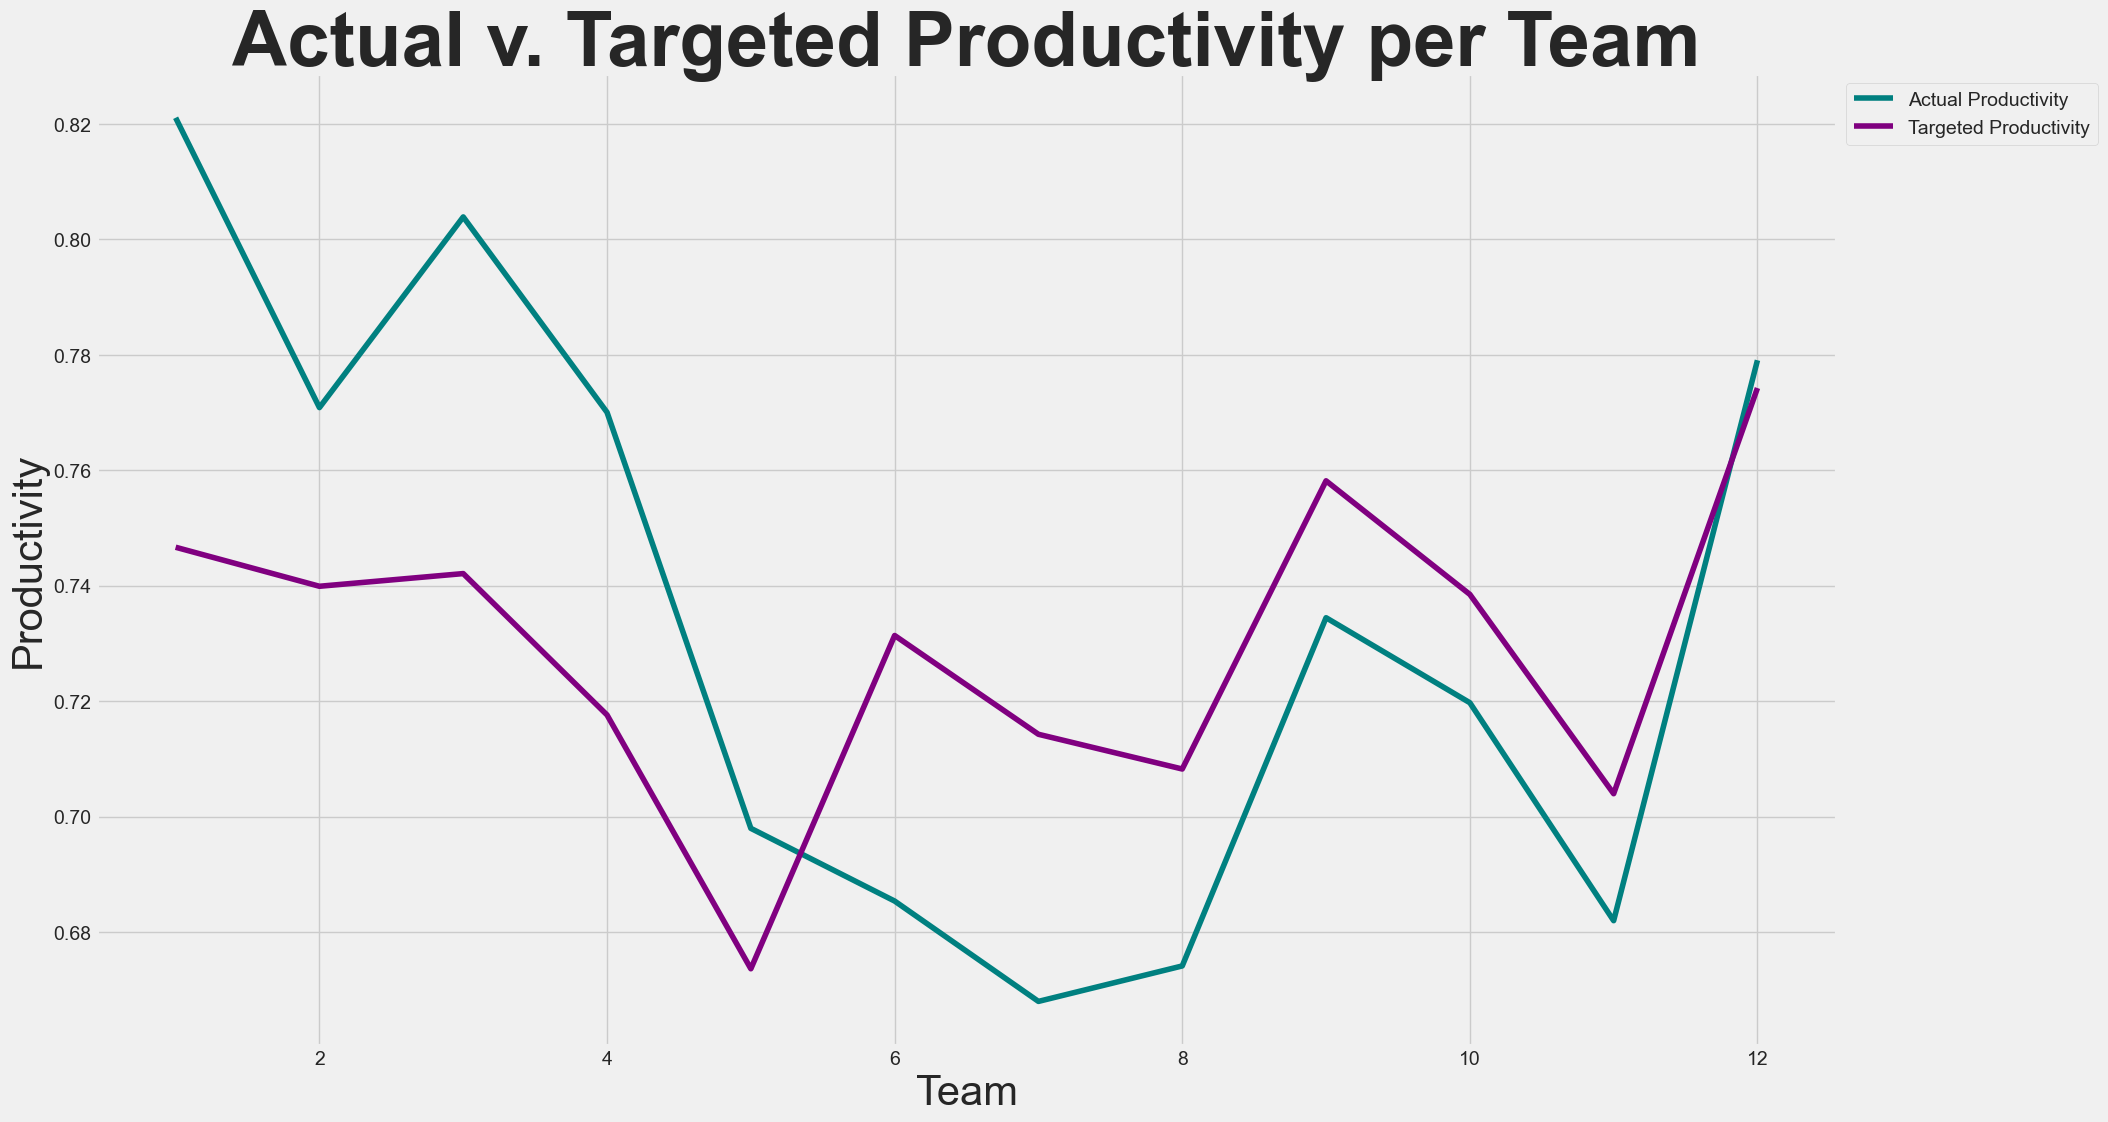

In [118]:
actual_prod_team = df.groupby(by=df.team).agg({'actual_productivity': np.mean})
target_prod_team = df.groupby(by=df.team).agg({'targeted_productivity': np.mean})
plt.figure(figsize=(20, 12))

plt.plot(actual_prod_team, color='teal', label='Actual Productivity')
plt.plot(target_prod_team, color='purple', label='Targeted Productivity')
plt.xlabel('Team', size=30)
plt.ylabel('Productivity', size=30)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.title('Actual v. Targeted Productivity per Team', weight='bold', size=55)
plt.show()

**Feature Averages Grouped by Teams**

In [119]:
team_df = df.groupby(by='team').agg(np.mean).round(2).reset_index()
team_df

team  targeted_productivity    smv      wip  over_time  incentive  \
0      1                   0.75  15.37  1323.85    4793.43      46.60   
1      2                   0.74  14.64  1169.55    4384.95      38.21   
2      3                   0.74  17.32  1249.00    5375.68      49.56   
3      4                   0.72  16.91  1121.89    5449.71      35.05   
4      5                   0.67  18.22   858.04    5330.97      49.14   
5      6                   0.73  11.91   959.34    3369.10      22.70   
6      7                   0.71  17.65   998.75    4857.19      15.53   
7      8                   0.71  15.77   990.87    4312.29      24.88   
8      9                   0.76  15.49  1157.23    4519.04      60.93   
9     10                   0.74  14.74  1300.18    4736.70      36.33   
10    11                   0.70  11.79   977.89    4342.50      37.91   
11    12                   0.77  10.59  1153.99    3317.93      41.20   

    idle_time  idle_men  no_of_style_change  no_of_workers  \
0        0.00      0.00                0.06          35.04   
1        0.06      0.28                0.16          34.62   
2        0.00      0.00                0.26          39.52   
3        1.43      0.14                0.20          38.20   
4        1.05      0.54                0.09          39.38   
5        0.00      0.00                0.07          25.17   
6        2.98      1.46                0.21          37.10   
7        2.88      1.07                0.27          33.49   
8        0.00      0.00                0.11          35.21   
9        0.16      0.70                0.11          35.30   
10       0.05      0.23                0.28          38.74   
11       0.00      0.00                0.00          23.92   

    actual_productivity  
0                  0.82  
1                  0.77  
2                  0.80  
3                  0.77  
4                  0.70  
5                  0.69  
6                  0.67  
7                  0.67  
8                  0.73  
9                  0.72  
10                 0.68  
11                 0.78

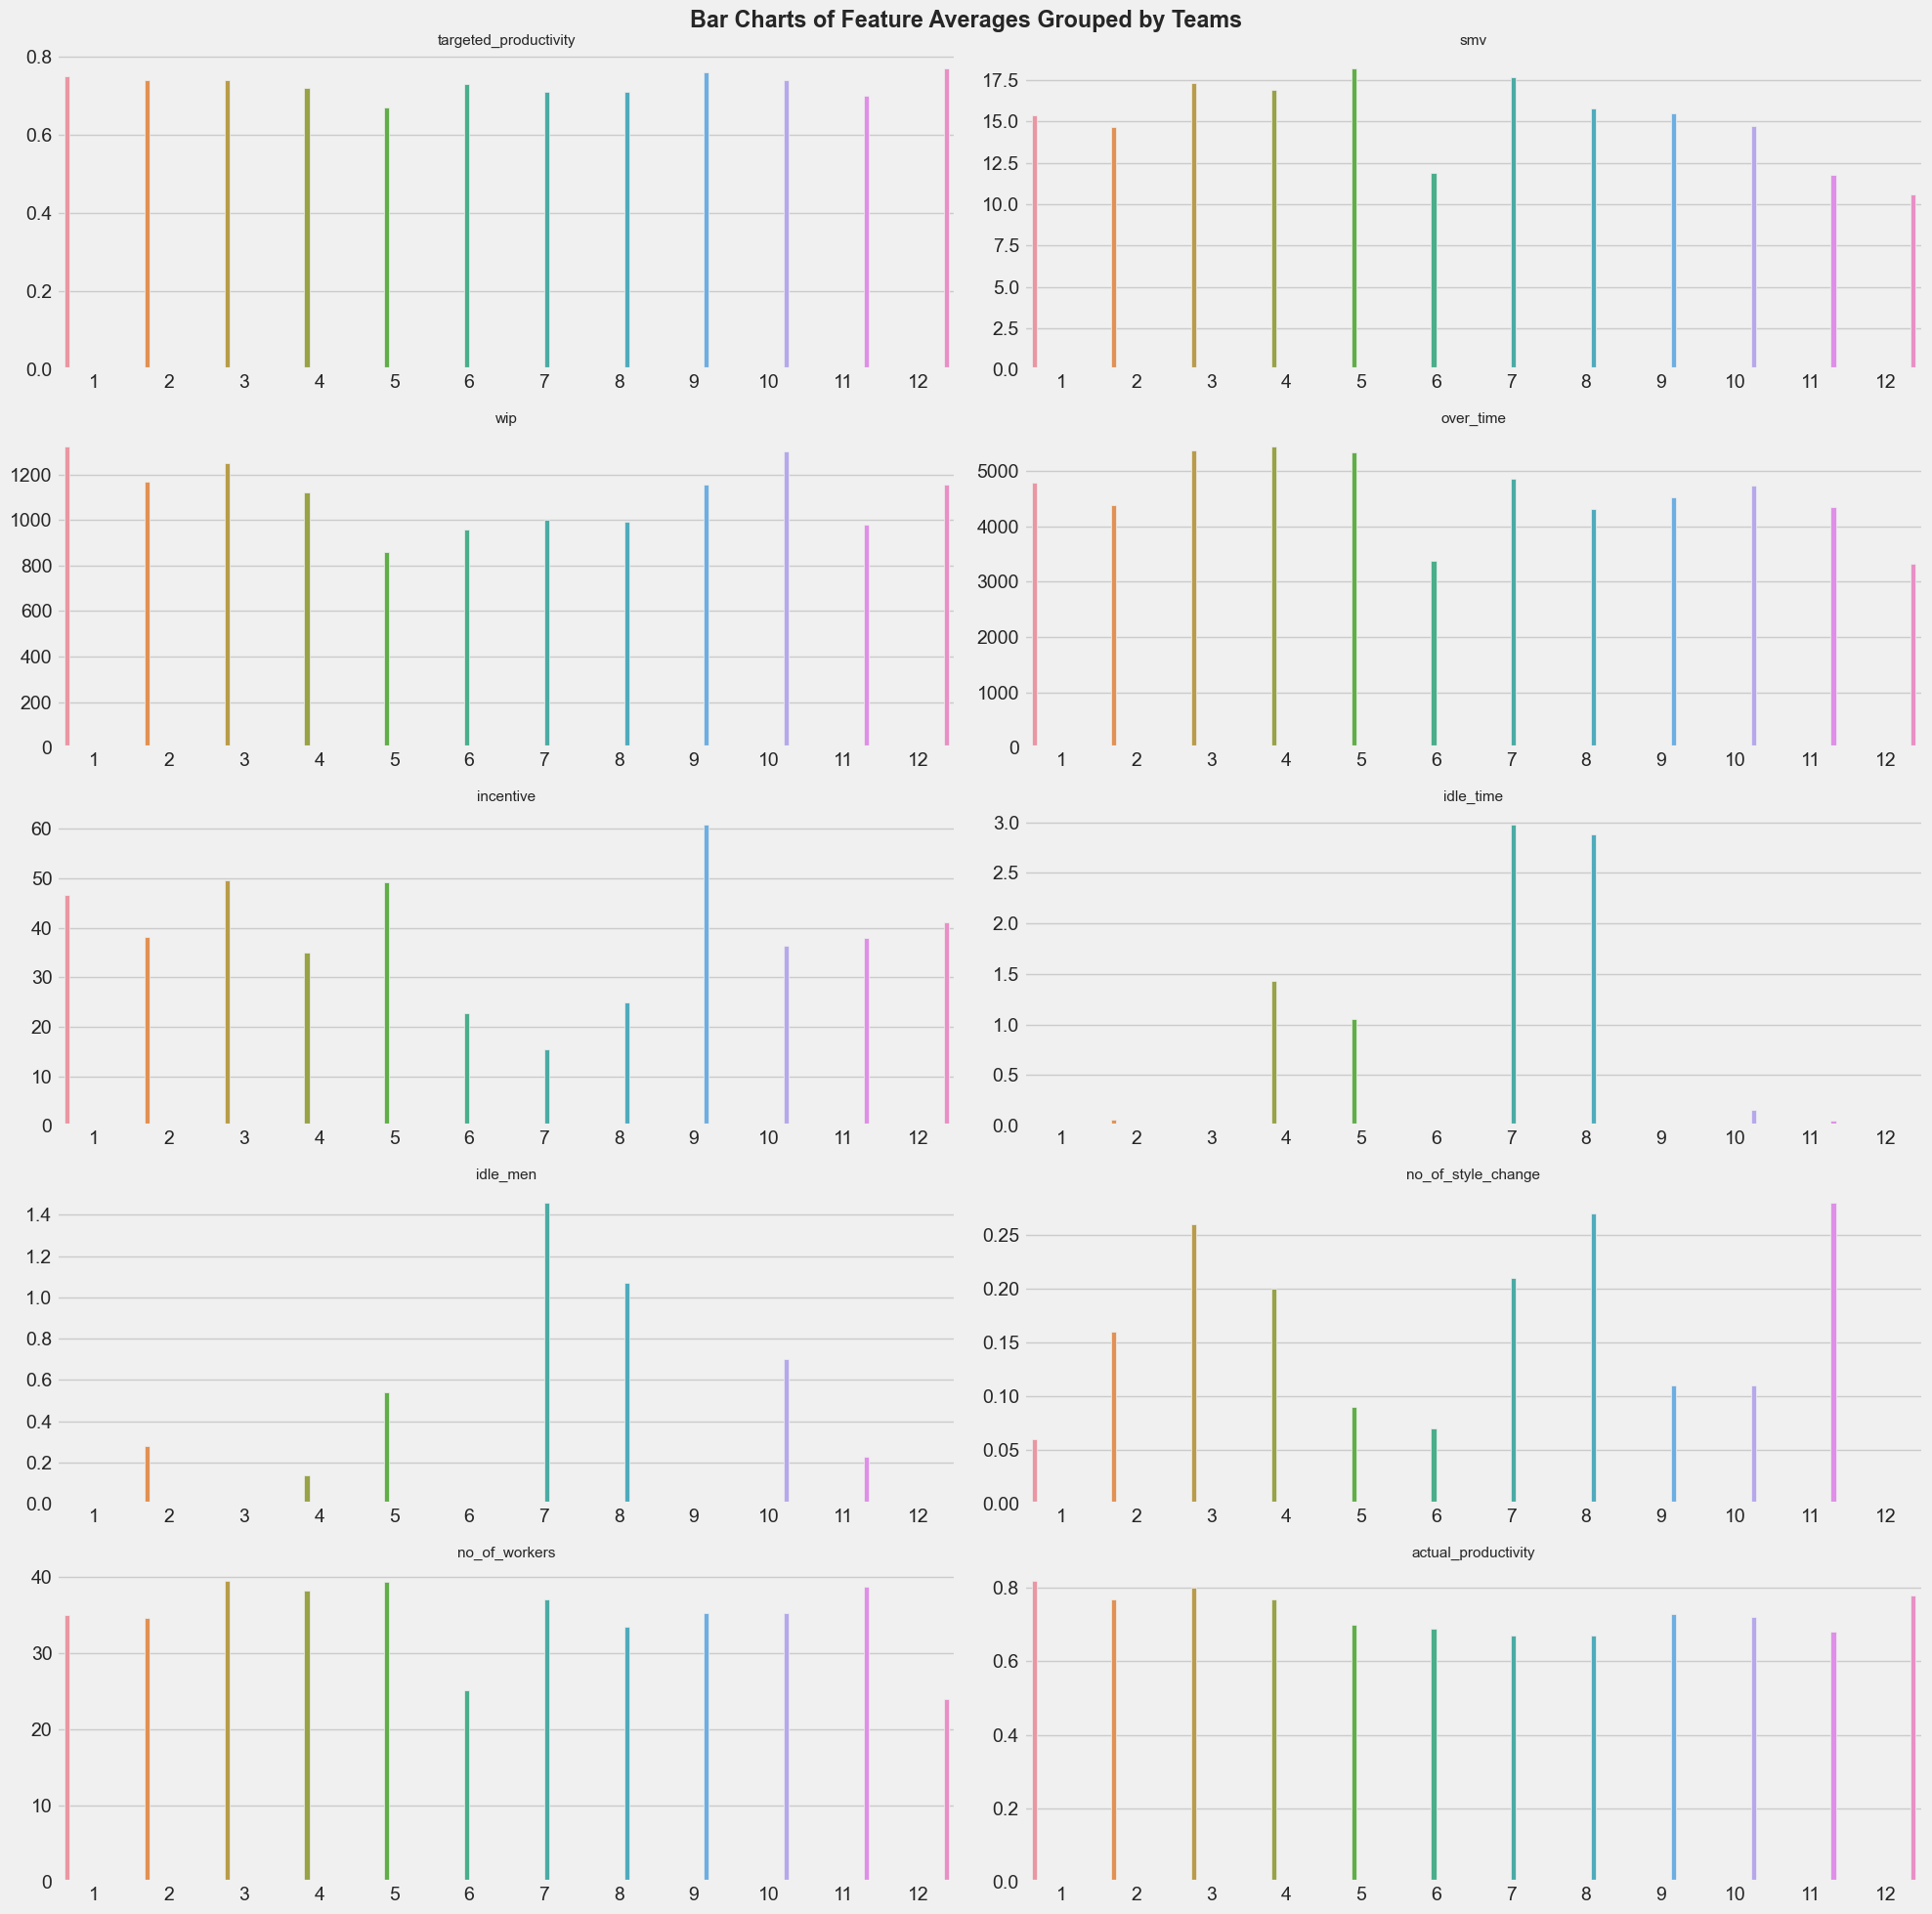

In [120]:
plt.figure(figsize=(20,20))
team_num = list(range(1,13))
x_labels = list(team_df.columns[1:])
plot_num = list(range(0,10))

for num in plot_num:
    plt.subplot(5, 2, num+1)
    sns.barplot(data=team_df,
                x='team',
                y=x_labels[num],
                hue='team')
    plt.legend([],[], frameon=False)
    plt.xlabel('')
    plt.ylabel('')
    plt.title(f'{x_labels[num]}', size=11)

plt.suptitle(t='Bar Charts of Feature Averages Grouped by Teams', weight='bold')
plt.tight_layout()
plt.show()

**Standard Minute Value (Time Allocated for a Task) vs Actual Productivity**

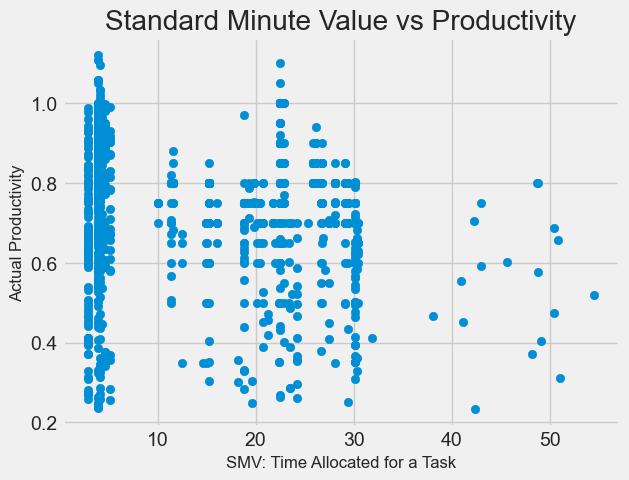

In [121]:
plt.scatter(x=df['smv'], y=df['actual_productivity'])
plt.xlabel('SMV: Time Allocated for a Task', size=12)
plt.ylabel('Actual Productivity', size=12)
plt.title('Standard Minute Value vs Productivity')
plt.show()

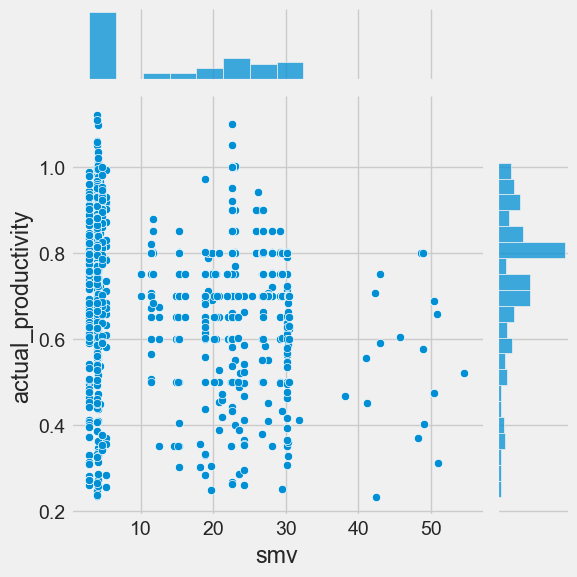

In [122]:
sns.jointplot(data=df, x='smv',
              y='actual_productivity',
              edgecolor='white')
plt.xlabel('SMV: Time Allocated for a Task', size=12)
plt.ylabel('Actual Productivity', size=12)
# plt.title('Standard Minute Value vs Productivity')
plt.show()

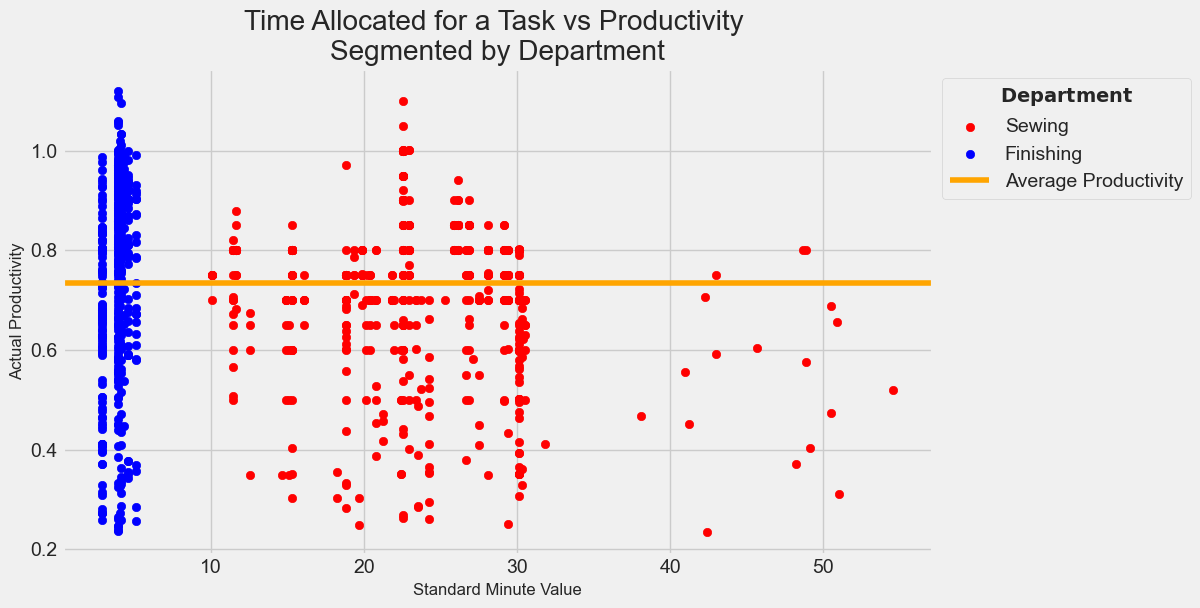

In [123]:
plt.figure(figsize=(10,6))

# Plot Records from Sewing Dept
plt.scatter(df.smv[df.department=='sewing'],
            df.actual_productivity[df.department=='sewing'],
            c="red",
            label='Sewing')

# # Plot Records from Finishing Dept
plt.scatter(df.smv[df.department=='finishing'],
            df.actual_productivity[df.department=='finishing'],
            c="blue",
            label='Finishing')

# Plot Average Productivity
plt.axhline(df.actual_productivity.mean(),
            color='orange',
            label='Average Productivity')

# Title, Legends and Labels
plt.xlabel('Standard Minute Value', size=12)
plt.ylabel('Actual Productivity', size=12)
plt.legend(title=r'$\bf{Department}$',
           loc='upper left', bbox_to_anchor=(1, 1))
plt.title('Time Allocated for a Task vs Productivity \nSegmented by Department')
plt.show()

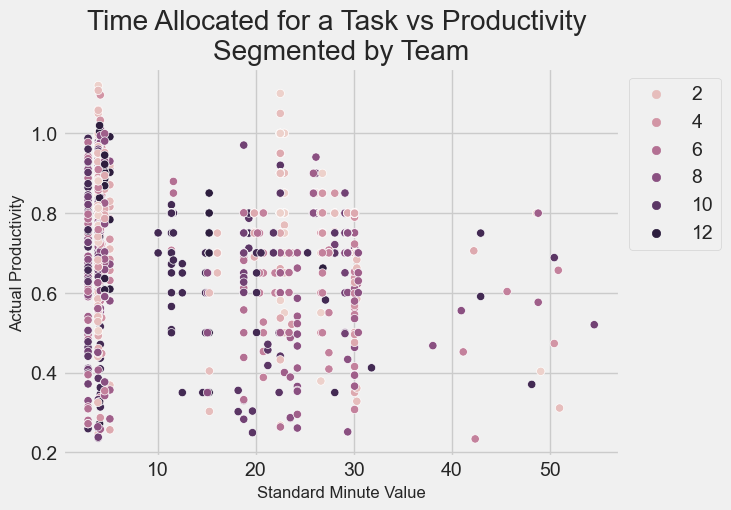

In [124]:
sns.scatterplot(data=df, x='smv',
                y='actual_productivity', hue='team')
plt.xlabel('Standard Minute Value', size=12)
plt.ylabel('Actual Productivity', size=12)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.title('Time Allocated for a Task vs Productivity \nSegmented by Team')
plt.show()

Time allocated for finishing teams are much smaller (under 5 minutes), than time allocated for sewing. However, when segmented by teams, teams with smaller numbers (team number 4 and under) are more productive on average than teams with higher numbers (team number 5 and over).

**Work in Progress vs Actual Productivity**

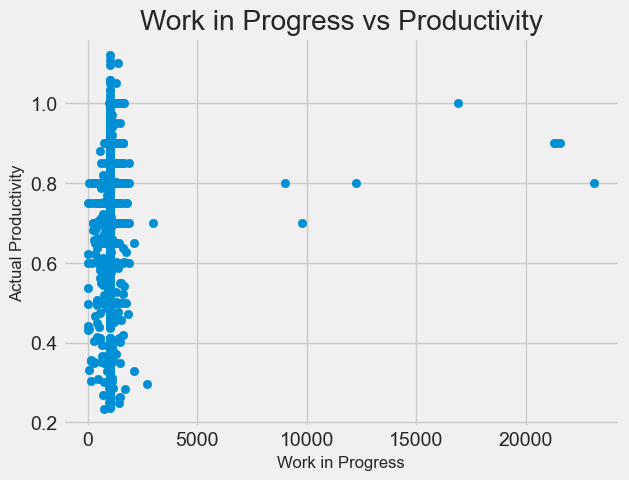

In [125]:
plt.scatter(x=df['wip'], y=df['actual_productivity'])
plt.xlabel('Work in Progress', size=12)
plt.ylabel('Actual Productivity', size=12)
plt.title('Work in Progress vs Productivity')
plt.show()

Let's segment by department to understand further.

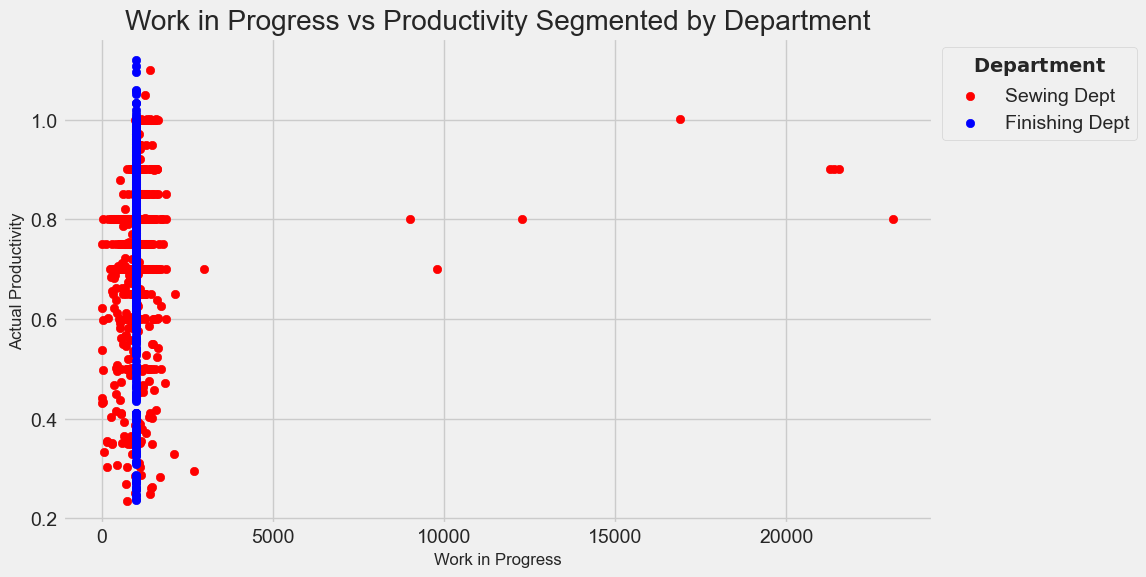

In [126]:
plt.figure(figsize=(10,6))

# Plot Records from Sewing Dept
plt.scatter(df.wip[df.department=='sewing'],
            df.actual_productivity[df.department=='sewing'],
            c="red")

# # Plot Records from Finishing Dept
plt.scatter(df.wip[df.department=='finishing'],
            df.actual_productivity[df.department=='finishing'],
            c="blue")

# Title, Legends and Labels
plt.xlabel('Work in Progress', size=12)
plt.ylabel('Actual Productivity', size=12)
plt.legend(title=r'$\bf{Department}$',
           labels=["Sewing Dept", "Finishing Dept"],
           loc='upper left', bbox_to_anchor=(1, 1))
plt.title('Work in Progress vs Productivity Segmented by Department')
plt.show()

The spread of the finishing department segment on the x-axis is very tight. Let's visualize after removing outliers.

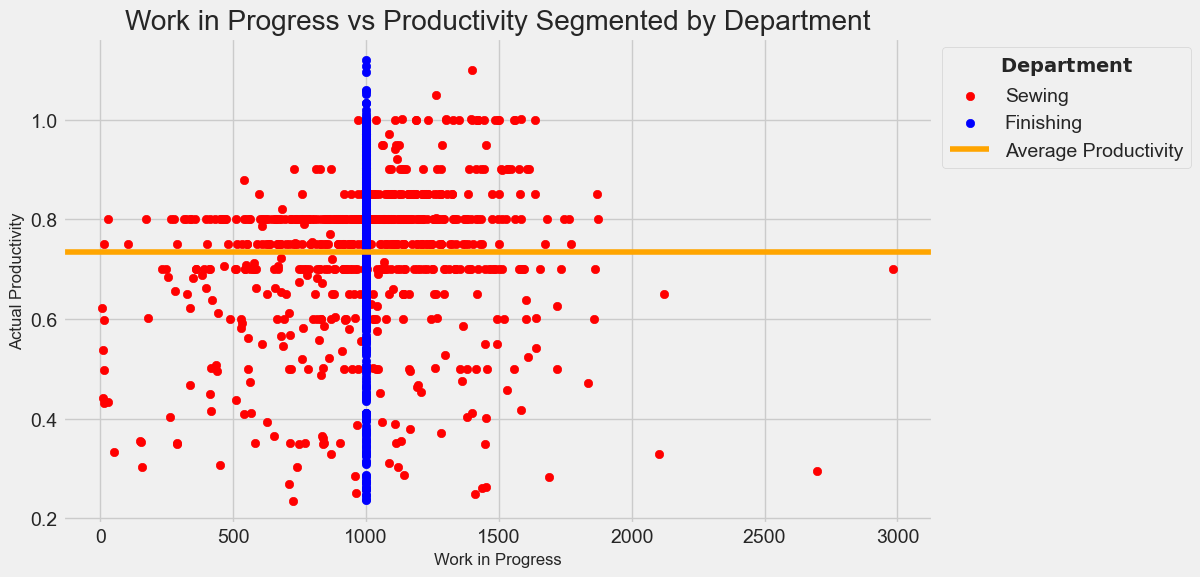

In [127]:
wip_u4000 = df.loc[df['wip'] <= 4000]

plt.figure(figsize=(10,6))

# Plot Records from Sewing Dept
plt.scatter(wip_u4000.wip[wip_u4000.department=='sewing'],
            wip_u4000.actual_productivity[wip_u4000.department=='sewing'],
            c="red",
            label='Sewing')

# # Plot Records from Finishing Dept
plt.scatter(wip_u4000.wip[wip_u4000.department=='finishing'],
            wip_u4000.actual_productivity[wip_u4000.department=='finishing'],
            c="blue",
            label='Finishing')

# Plot Average Productivity
plt.axhline(wip_u4000.actual_productivity.mean(),
            color='orange',
            label='Average Productivity')

# Title, Legends and Labels
plt.xlabel('Work in Progress', size=12)
plt.ylabel('Actual Productivity', size=12)
plt.legend(title=r'$\bf{Department}$',
           loc='upper left', bbox_to_anchor=(1, 1))
plt.title('Work in Progress vs Productivity Segmented by Department')
plt.show()

After removing the outliers, work in progress for the sewing department includes products from 0 to 300 range. For finishing department, work in progress only includes 1000 products across all productivity values.

Let's segment by teams.

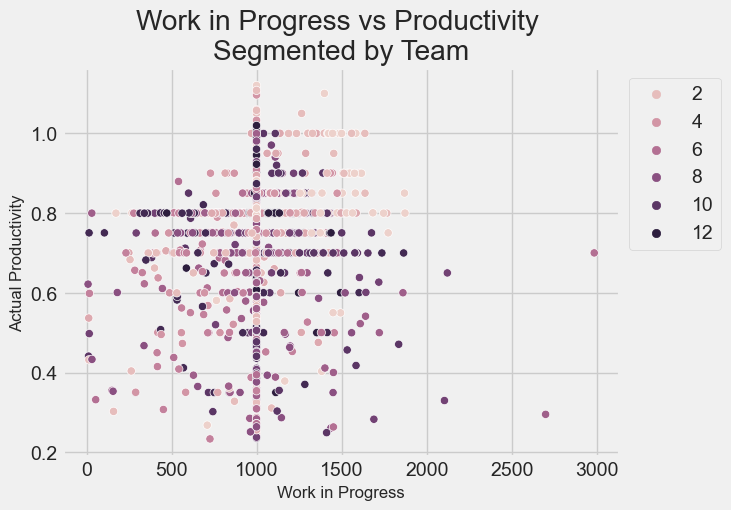

In [128]:
sns.scatterplot(data=wip_u4000, x='wip', y='actual_productivity', hue='team')
plt.xlabel('Work in Progress', size=12)
plt.ylabel('Actual Productivity', size=12)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.title('Work in Progress vs Productivity \nSegmented by Team')
plt.show()

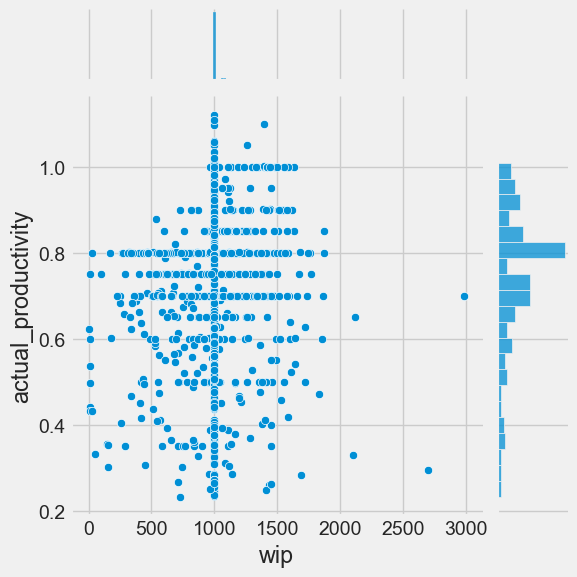

In [129]:
sns.jointplot(data=wip_u4000, x='wip',
              y='actual_productivity',
              edgecolor='white')
plt.xlabel('Work in Progress', size=12)
plt.ylabel('Actual Productivity', size=12)
# plt.title('Standard Minute Value vs Productivity')
plt.show()

For values from sewing department, teams with smaller numbers have more productivity with higher works in progress. The inverse is the case for large number teams.Even with the finishing department, the highest productivity are with the small number teams. The same seems to be the case for the finishing department.

Might be important to check the count of people in each team.

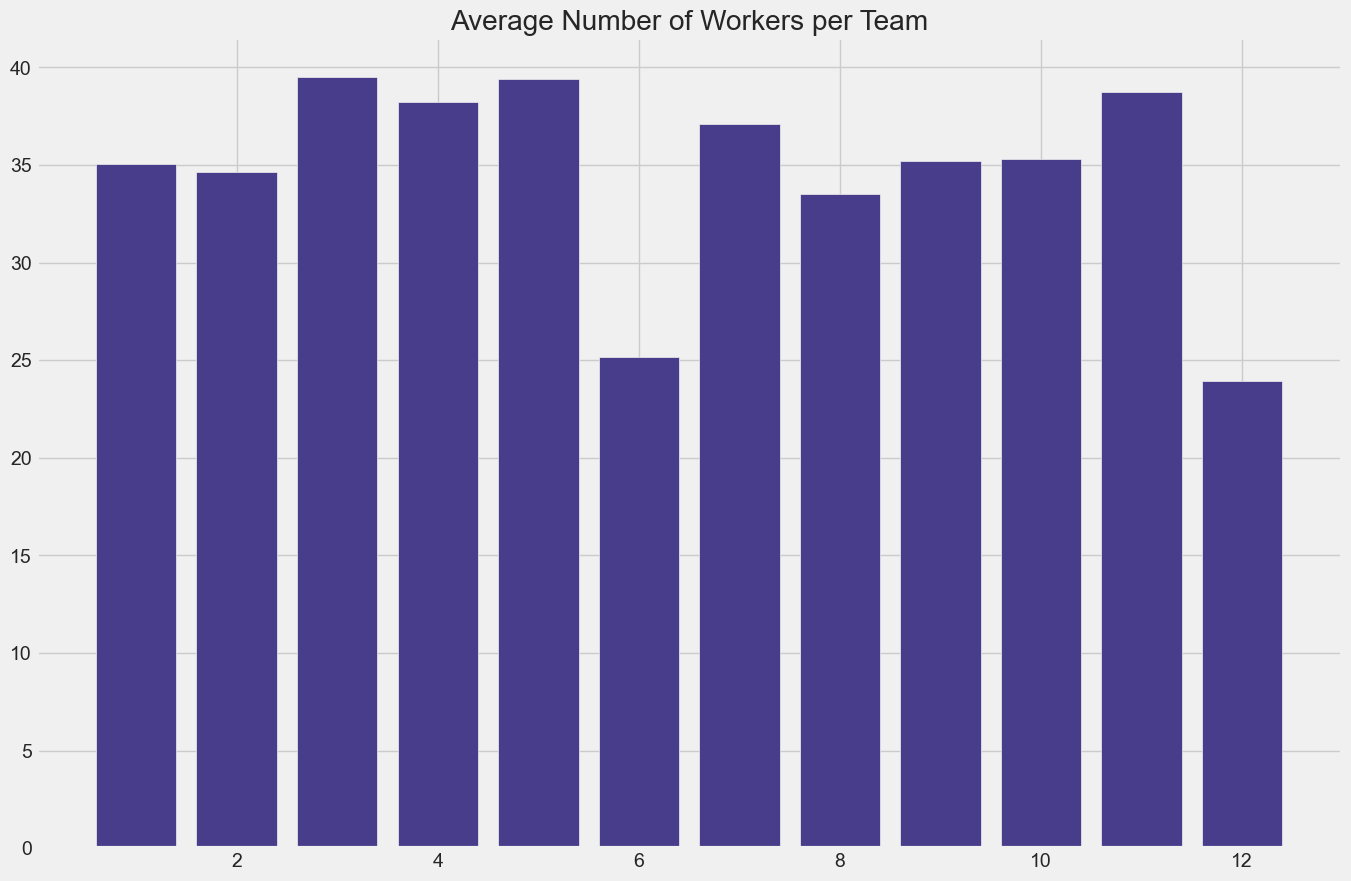

In [130]:
plt.figure(figsize=(15,10))
plt.bar(x=team_df['team'],
        height=team_df['no_of_workers'],
        color='darkslateblue')
plt.title('Average Number of Workers per Team')
plt.show()

Apart from teams 6 and 12, the number of people on the teams are similar. Let's segment by idle men.

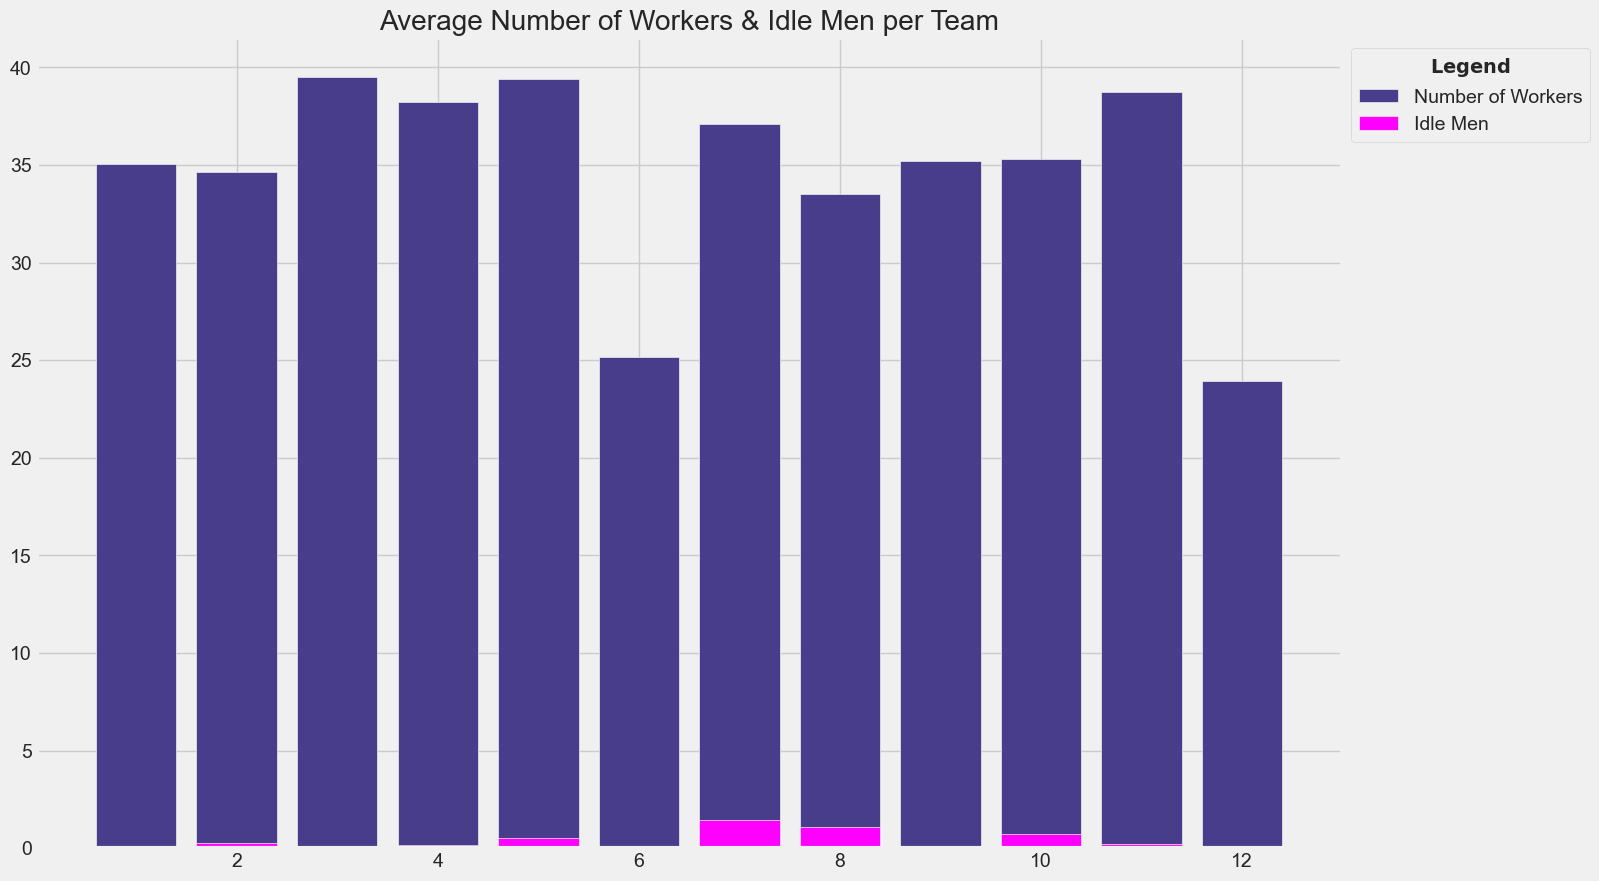

In [131]:
plt.figure(figsize=(15,10))
plt.bar(data=team_df,
        x=team_df['team'],
        height=team_df['no_of_workers'],
        color='darkslateblue')
plt.bar(data=team_df,
        x=team_df['team'],
        height=team_df['idle_men'],
        color='fuchsia')
plt.legend(title=r'$\bf{Legend}$',
           labels=["Number of Workers", "Idle Men"],
           loc='upper left', bbox_to_anchor=(1, 1))
plt.title('Average Number of Workers & Idle Men per Team')
plt.show()

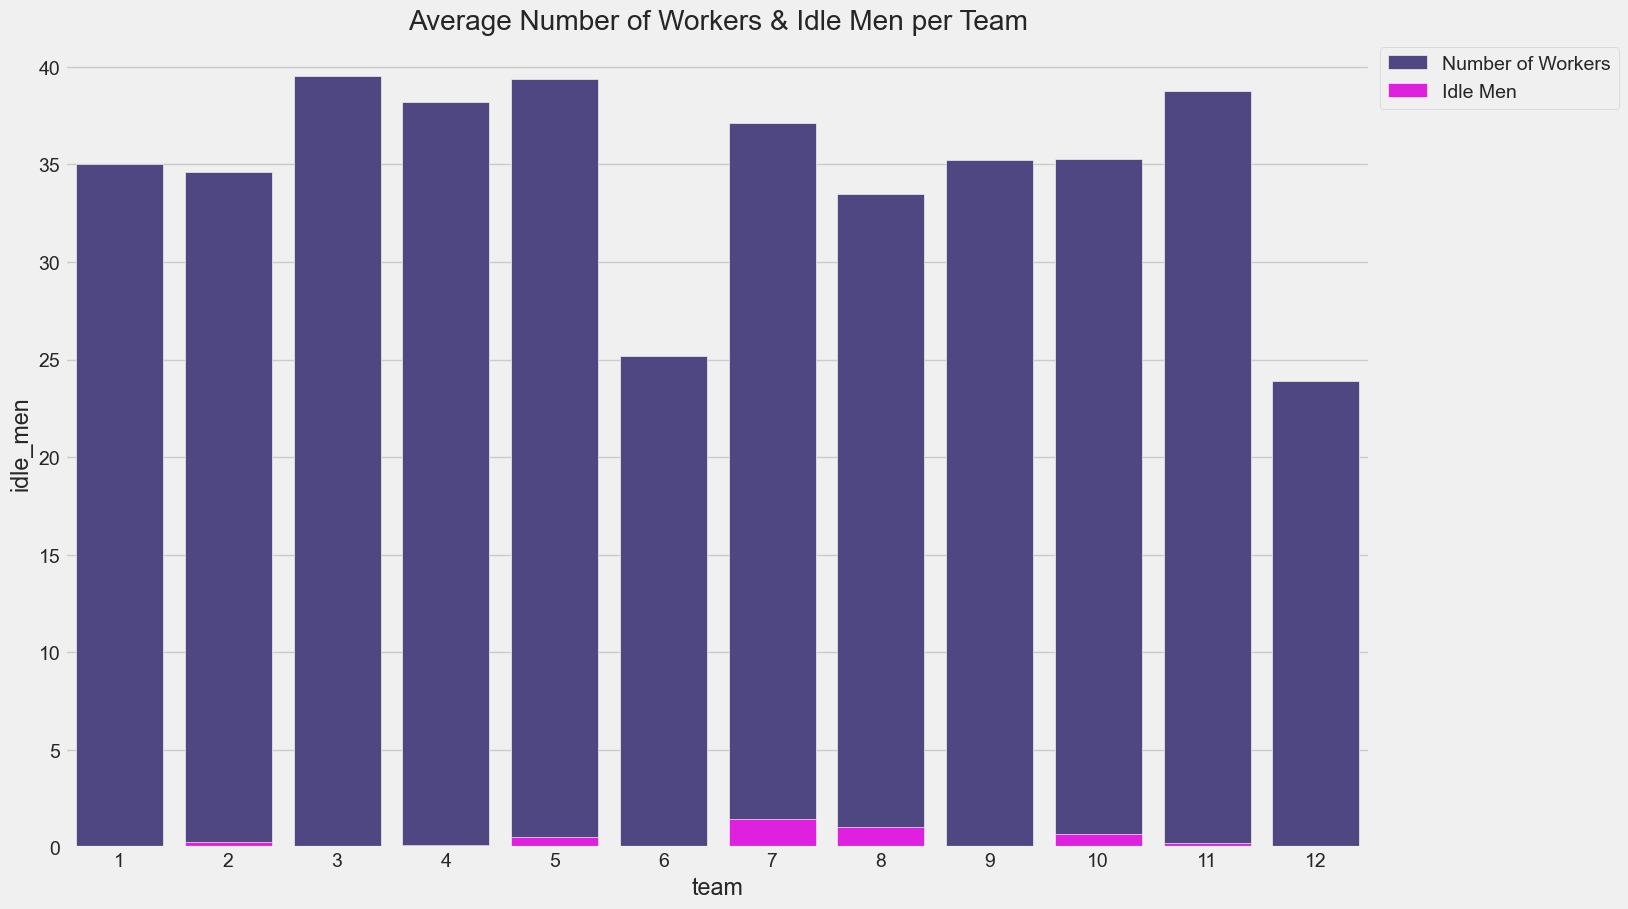

In [132]:
plt.figure(figsize=(15,10))
sns.barplot(data=team_df,
            x=team_df['team'],
            y=team_df['no_of_workers'],
            color='darkslateblue',
            label='Number of Workers')
sns.barplot(data=team_df,
            x=team_df['team'],
            y=team_df['idle_men'],
            color='fuchsia',
            label='Idle Men')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.title('Average Number of Workers & Idle Men per Team')
plt.show()

On average, there are more idle workers in teams 5, 7, 8, and 10.

**Overtime vs Actual Productivity**

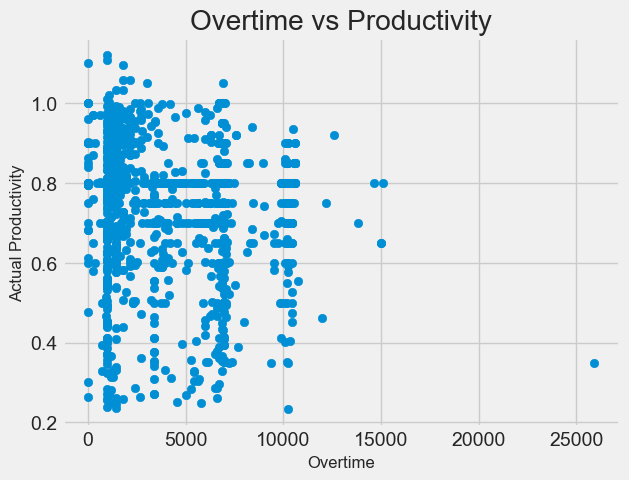

In [133]:
plt.scatter(x=df['over_time'], y=df['actual_productivity'])
plt.xlabel('Overtime', size=12)
plt.ylabel('Actual Productivity', size=12)
plt.title('Overtime vs Productivity')
plt.show()

Let's reassess with department and team segments after removing outliers.

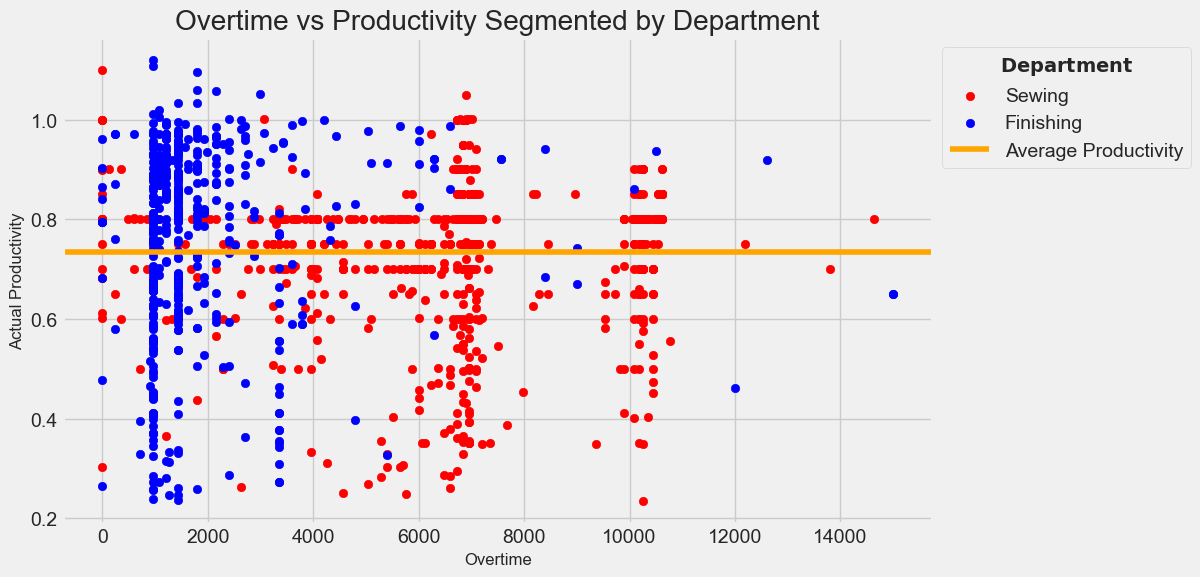

In [134]:
ot_u15k = df.loc[df['over_time'] <= 15000]

plt.figure(figsize=(10,6))

# Plot Records from Sewing Dept
plt.scatter(ot_u15k.over_time[ot_u15k.department=='sewing'],
            ot_u15k.actual_productivity[ot_u15k.department=='sewing'],
            c="red",
            label='Sewing')

# Plot Records from Finishing Dept
plt.scatter(ot_u15k.over_time[ot_u15k.department=='finishing'],
            ot_u15k.actual_productivity[ot_u15k.department=='finishing'],
            c="blue",
            label='Finishing')

# Plot Average Productivity
plt.axhline(ot_u15k.actual_productivity.mean(),
            color='orange',
            label='Average Productivity')

# Title, Legends and Labels
plt.xlabel('Overtime', size=12)
plt.ylabel('Actual Productivity', size=12)
plt.legend(title=r'$\bf{Department}$',
           loc='upper left', bbox_to_anchor=(1, 1))
plt.title('Overtime vs Productivity Segmented by Department')
plt.show()

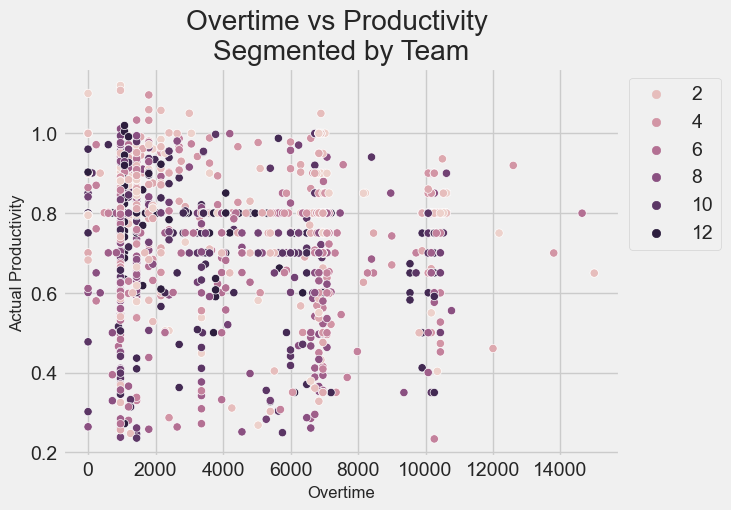

In [135]:
sns.scatterplot(data=ot_u15k, x='over_time',
                y='actual_productivity', hue='team')
plt.xlabel('Overtime', size=12)
plt.ylabel('Actual Productivity', size=12)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.title('Overtime vs Productivity \nSegmented by Team')
plt.show()

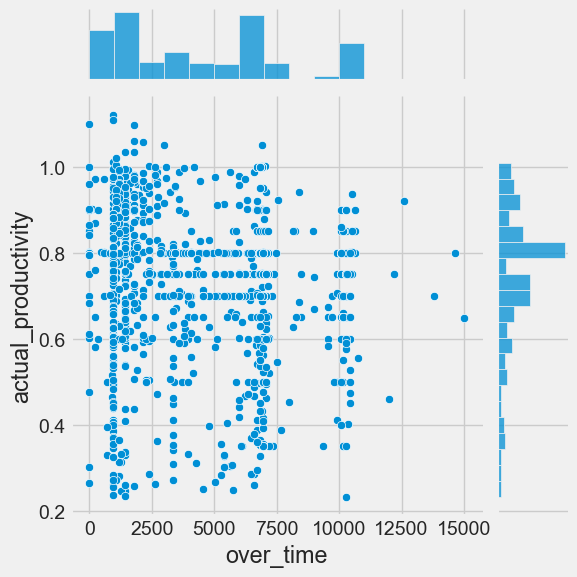

In [136]:
sns.jointplot(data=ot_u15k, x='over_time',
              y='actual_productivity',
              edgecolor='white')
plt.xlabel('Overtime', size=12)
plt.ylabel('Actual Productivity', size=12)
# plt.title('Standard Minute Value vs Productivity')
plt.show()

**Incentive vs Actual Productivity**

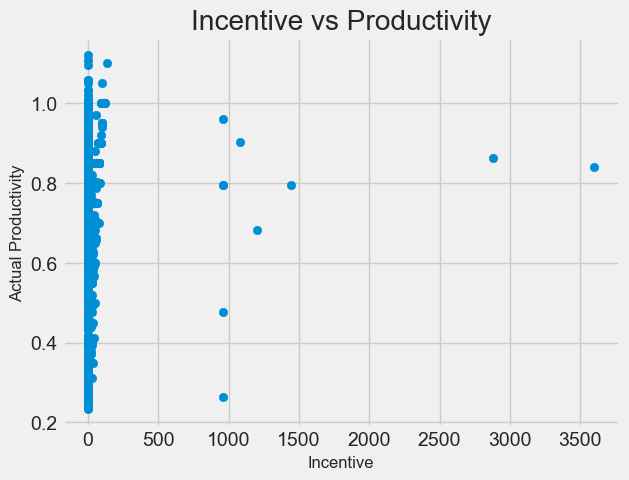

In [137]:
plt.scatter(x=df['incentive'], y=df['actual_productivity'])
plt.xlabel('Incentive', size=12)
plt.ylabel('Actual Productivity', size=12)
plt.title('Incentive vs Productivity')
plt.show()

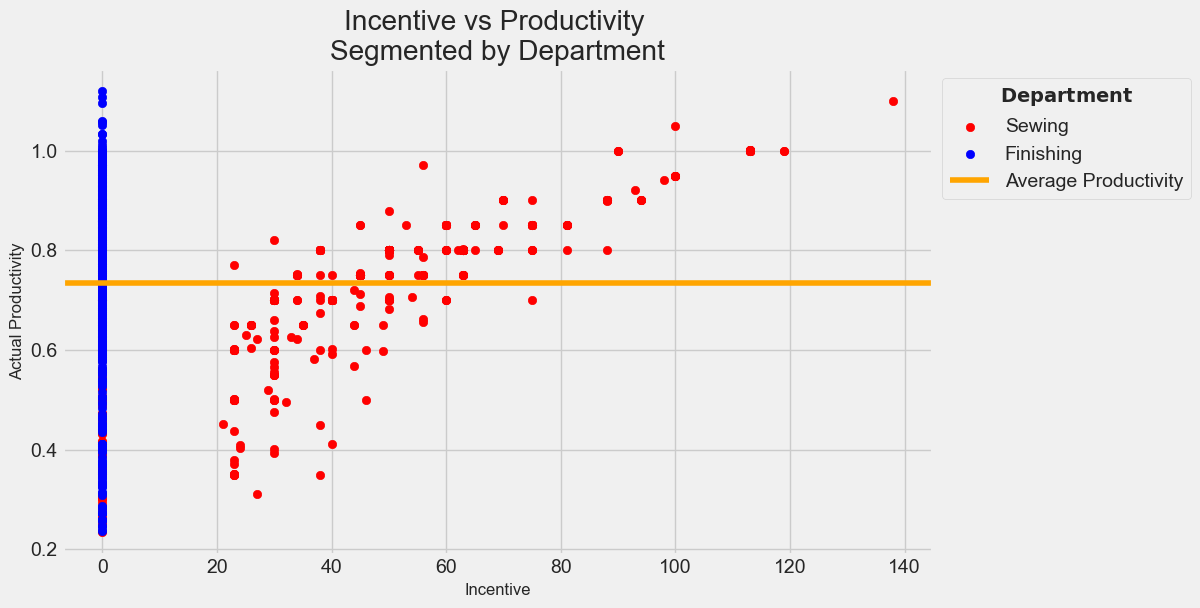

In [138]:
incentive_u200 = df.loc[df['incentive'] <= 200]

plt.figure(figsize=(10,6))

# Plot Records from Sewing Dept
plt.scatter(incentive_u200.incentive[incentive_u200.department=='sewing'],
            incentive_u200.actual_productivity[incentive_u200.department=='sewing'],
            c="red",
            label='Sewing')

# # Plot Records from Finishing Dept
plt.scatter(incentive_u200.incentive[incentive_u200.department=='finishing'],
            incentive_u200.actual_productivity[incentive_u200.department=='finishing'],
            c="blue",
            label='Finishing')

# Plot Average Productivity
plt.axhline(incentive_u200.actual_productivity.mean(),
            color='orange',
            label='Average Productivity')

# Title, Legends and Labels
plt.xlabel('Incentive', size=12)
plt.ylabel('Actual Productivity', size=12)
plt.legend(title=r'$\bf{Department}$',
           loc='upper left', bbox_to_anchor=(1, 1))
plt.title('Incentive vs Productivity \nSegmented by Department')
plt.show()

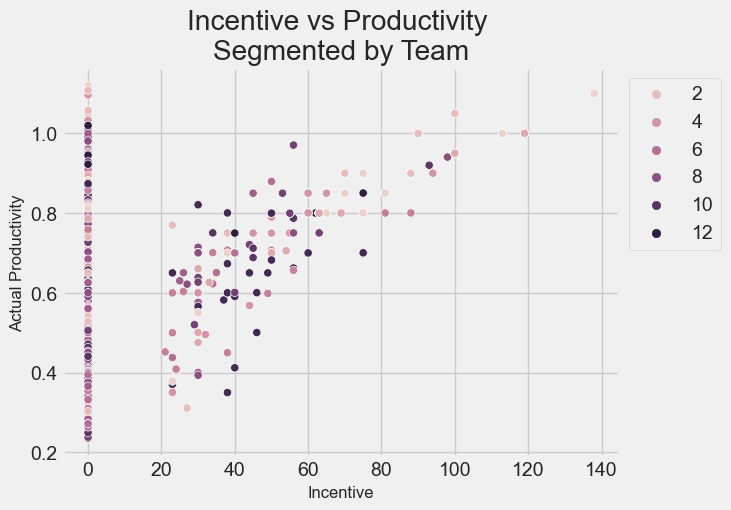

In [139]:
sns.scatterplot(data=incentive_u200, x='incentive',
                y='actual_productivity', hue='team')
plt.xlabel('Incentive', size=12)
plt.ylabel('Actual Productivity', size=12)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.title('Incentive vs Productivity \nSegmented by Team')
plt.show()

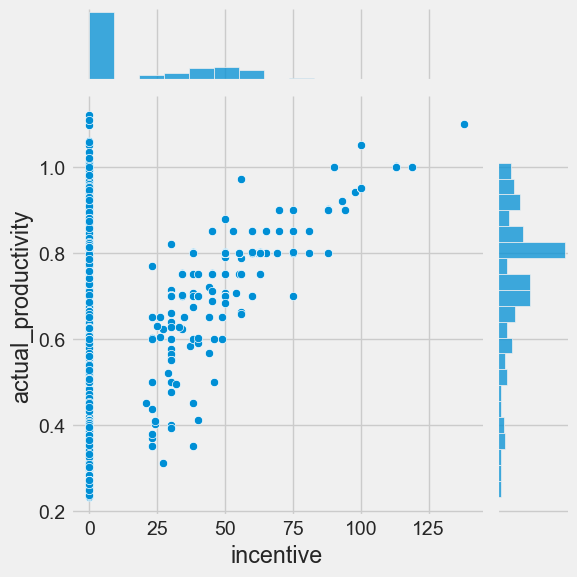

In [140]:
sns.jointplot(data=incentive_u200, x='incentive',
              y='actual_productivity',
              edgecolor='white')
plt.xlabel('Incentive', size=12)
plt.ylabel('Actual Productivity', size=12)
# plt.title('Standard Minute Value vs Productivity')
plt.show()

**Idle Time vs Actual Productivity**

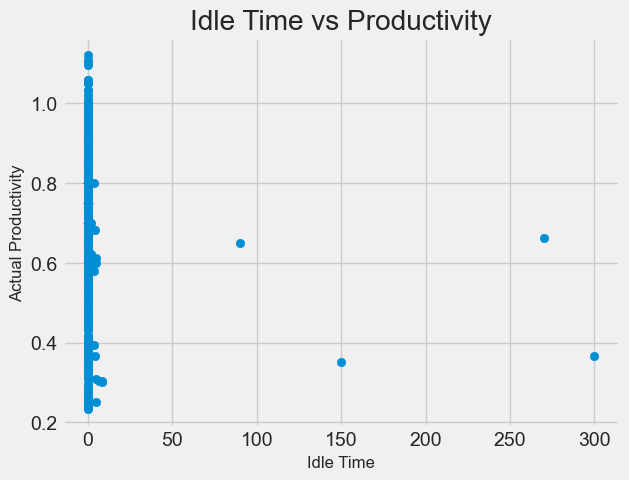

In [141]:
plt.scatter(x=df['idle_time'], y=df['actual_productivity'])
plt.xlabel('Idle Time', size=12)
plt.ylabel('Actual Productivity', size=12)
plt.title('Idle Time vs Productivity')
plt.show()

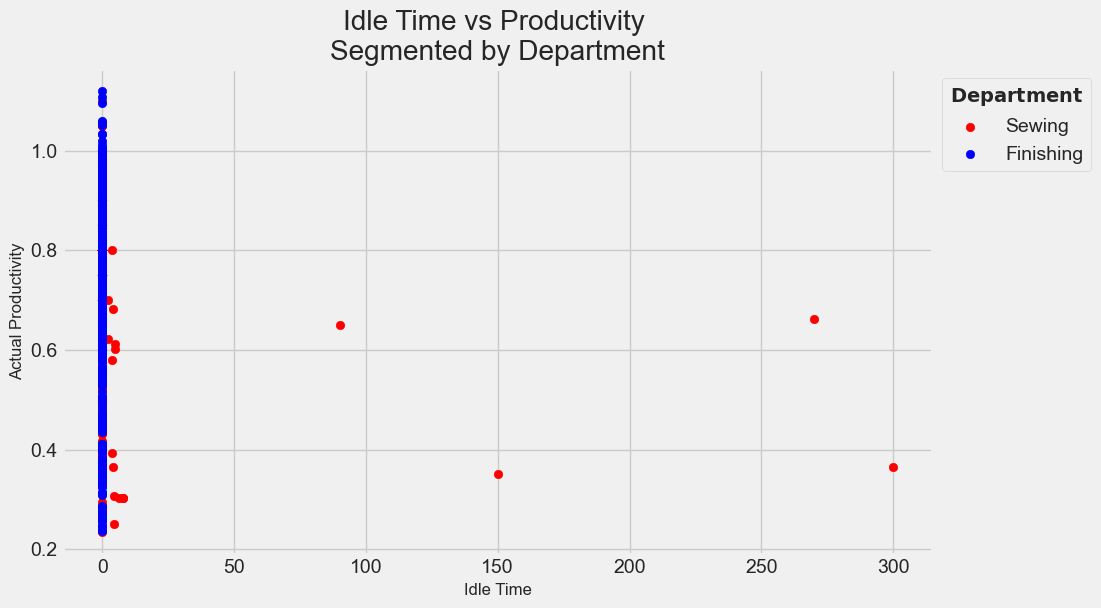

In [142]:
plt.figure(figsize=(10,6))

# Plot Records from Sewing Dept
plt.scatter(df.idle_time[df.department=='sewing'],
            df.actual_productivity[df.department=='sewing'],
            c="red")

# # Plot Records from Finishing Dept
plt.scatter(df.idle_time[df.department=='finishing'],
            df.actual_productivity[df.department=='finishing'],
            c="blue")

# Title, Legends and Labels
plt.xlabel('Idle Time', size=12)
plt.ylabel('Actual Productivity', size=12)
plt.legend(title=r'$\bf{Department}$',
           labels=["Sewing", "Finishing"],
           loc='upper left', bbox_to_anchor=(1, 1))
plt.title('Idle Time vs Productivity \nSegmented by Department')
plt.show()

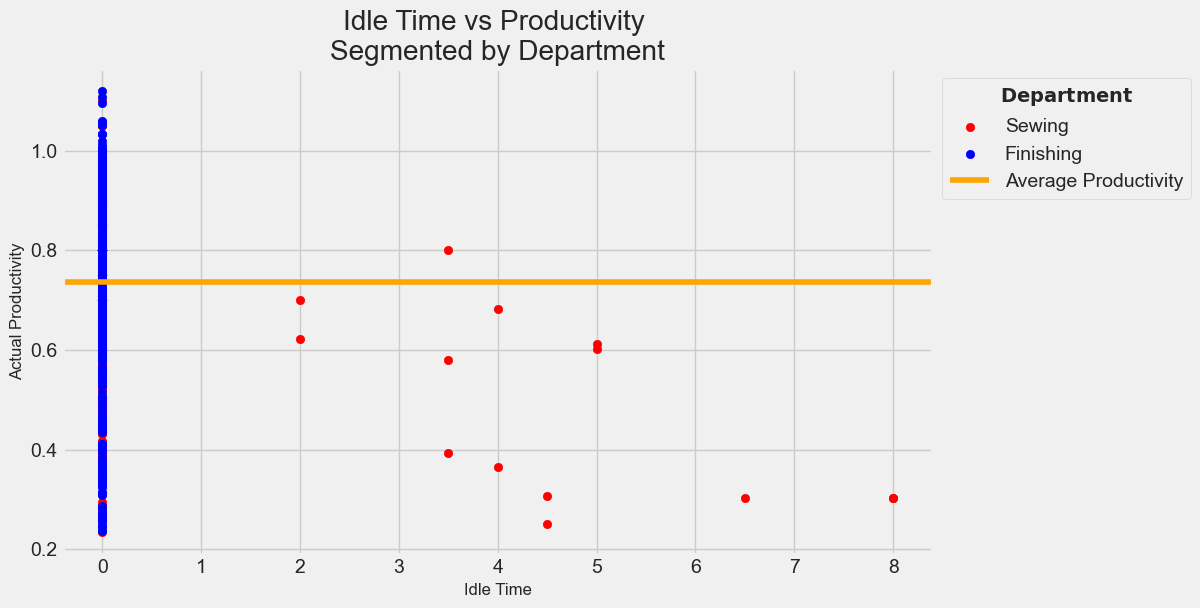

In [143]:
idle_u25 = df.loc[df['idle_time'] <= 25]

plt.figure(figsize=(10,6))

# Plot Records from Sewing Dept
plt.scatter(idle_u25.idle_time[idle_u25.department=='sewing'],
            idle_u25.actual_productivity[idle_u25.department=='sewing'],
            c="red",
            label='Sewing')

# # Plot Records from Finishing Dept
plt.scatter(idle_u25.idle_time[idle_u25.department=='finishing'],
            idle_u25.actual_productivity[idle_u25.department=='finishing'],
            c="blue",
            label='Finishing')

# Plot Average Productivity
plt.axhline(idle_u25.actual_productivity.mean(),
            color='orange',
            label='Average Productivity')

# Title, Legends and Labels
plt.xlabel('Idle Time', size=12)
plt.ylabel('Actual Productivity', size=12)
plt.legend(title=r'$\bf{Department}$',
           loc='upper left', bbox_to_anchor=(1, 1))
plt.title('Idle Time vs Productivity \nSegmented by Department')
plt.show()

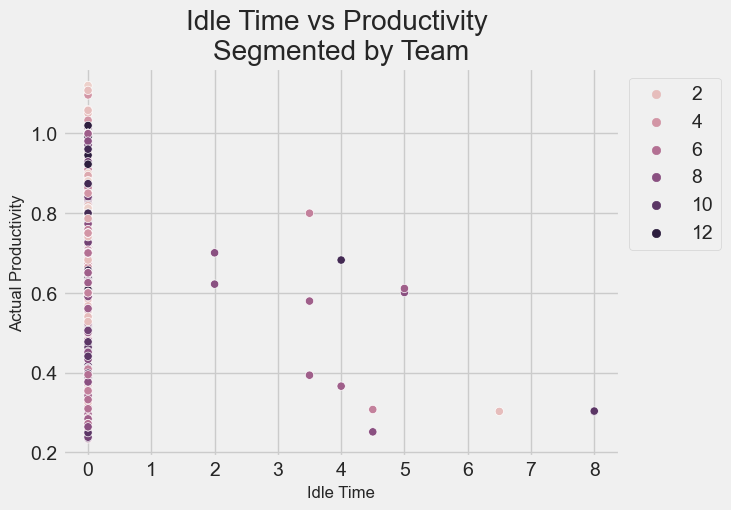

In [144]:
sns.scatterplot(data=idle_u25, x='idle_time',
                y='actual_productivity', hue='team')
plt.xlabel('Idle Time', size=12)
plt.ylabel('Actual Productivity', size=12)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.title('Idle Time vs Productivity \nSegmented by Team')
plt.show()

There is no idle time butt only a few records in the sewing department. Nearly all those records fall under the average productivity line.

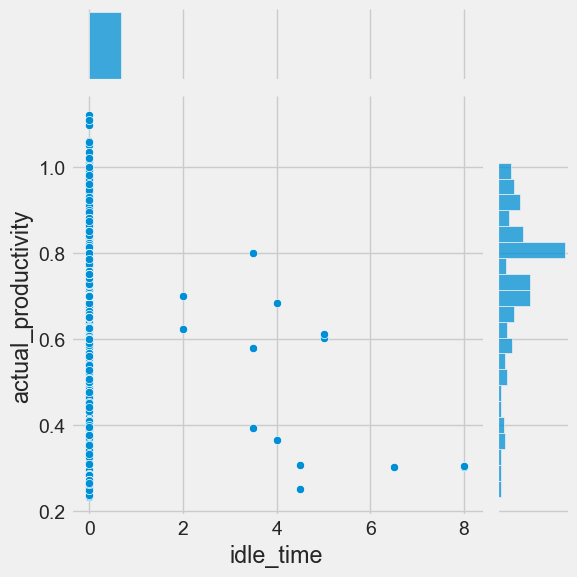

In [145]:
sns.jointplot(data=idle_u25, x='idle_time',
              y='actual_productivity',
              edgecolor='white')
plt.xlabel('Idle Time', size=12)
plt.ylabel('Actual Productivity', size=12)
# plt.title('Standard Minute Value vs Productivity')
plt.show()

**Idle Men vs Actual Productivity**

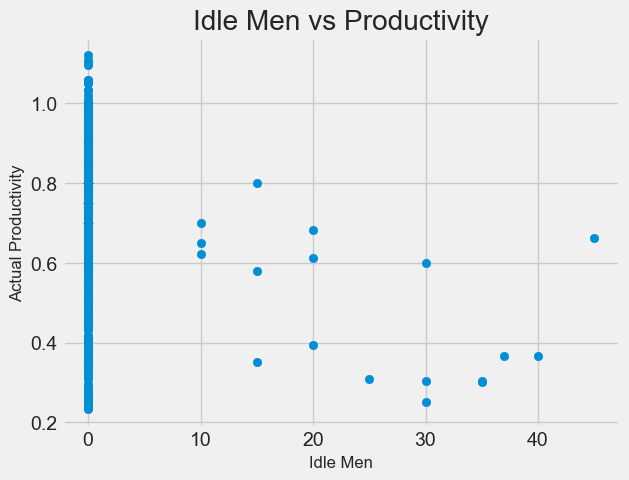

In [146]:
plt.scatter(x=df['idle_men'], y=df['actual_productivity'])
plt.xlabel('Idle Men', size=12)
plt.ylabel('Actual Productivity', size=12)
plt.title('Idle Men vs Productivity')
plt.show()

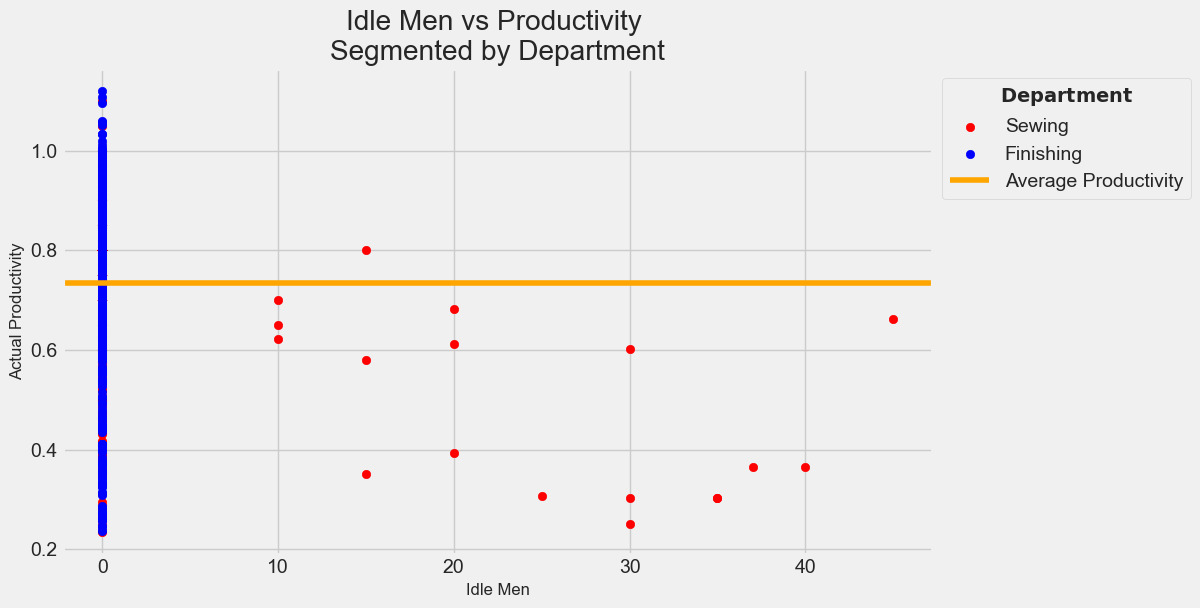

In [147]:
plt.figure(figsize=(10,6))

# Plot Records from Sewing Dept
plt.scatter(df.idle_men[df.department=='sewing'],
            df.actual_productivity[df.department=='sewing'],
            c="red",
            label='Sewing')

# # Plot Records from Finishing Dept
plt.scatter(df.idle_men[df.department=='finishing'],
            df.actual_productivity[df.department=='finishing'],
            c="blue",
            label='Finishing')

# Plot Average Productivity
plt.axhline(df.actual_productivity.mean(),
            color='orange',
            label='Average Productivity')

# Title, Legends and Labels
plt.xlabel('Idle Men', size=12)
plt.ylabel('Actual Productivity', size=12)
plt.legend(title=r'$\bf{Department}$',
           loc='upper left', bbox_to_anchor=(1, 1))
plt.title('Idle Men vs Productivity \nSegmented by Department')
plt.show()

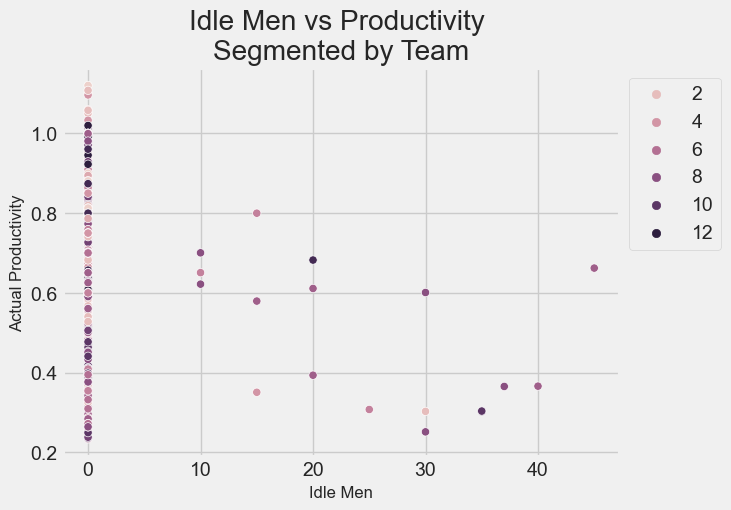

In [148]:
sns.scatterplot(data=df, x='idle_men',
                y='actual_productivity', hue='team')
plt.xlabel('Idle Men', size=12)
plt.ylabel('Actual Productivity', size=12)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.title('Idle Men vs Productivity \nSegmented by Team')
plt.show()

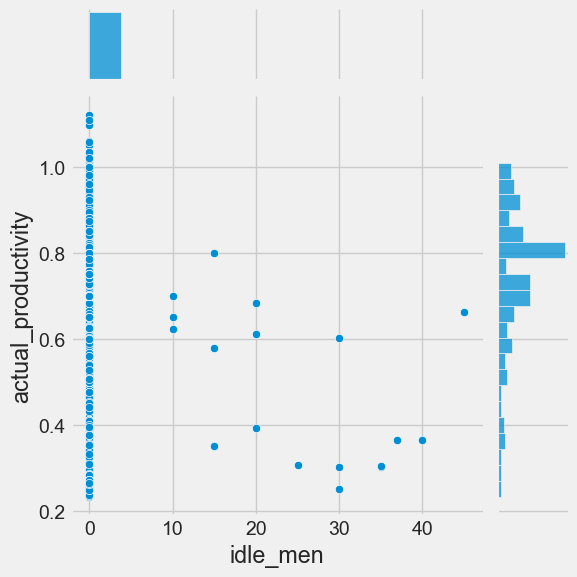

In [149]:
sns.jointplot(data=df, x='idle_men',
              y='actual_productivity',
              edgecolor='white')
plt.xlabel('Idle Men', size=12)
plt.ylabel('Actual Productivity', size=12)
# plt.title('Standard Minute Value vs Productivity')
plt.show()

**Product Style Changes vs Actual Productivity**

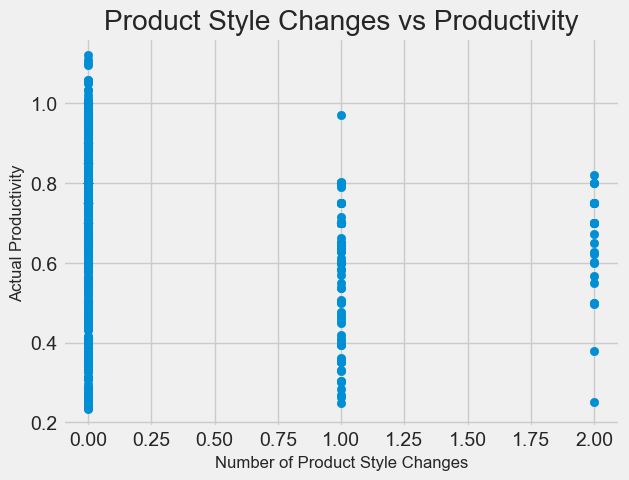

In [150]:
plt.scatter(x=df['no_of_style_change'],
            y=df['actual_productivity'])
plt.xlabel('Number of Product Style Changes', size=12)
plt.ylabel('Actual Productivity', size=12)
plt.title('Product Style Changes vs Productivity')
plt.show()

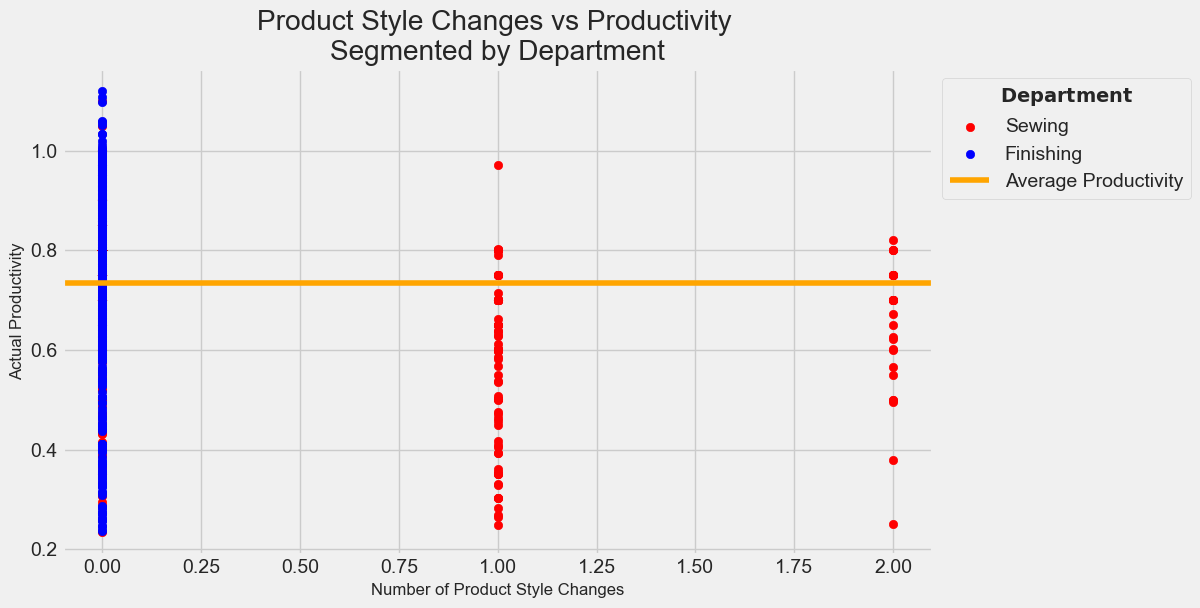

In [151]:
plt.figure(figsize=(10,6))

# Plot Records from Sewing Dept
plt.scatter(df.no_of_style_change[df.department=='sewing'],
            df.actual_productivity[df.department=='sewing'],
            c="red",
            label='Sewing')

# # Plot Records from Finishing Dept
plt.scatter(df.no_of_style_change[df.department=='finishing'],
            df.actual_productivity[df.department=='finishing'],
            c="blue",
            label='Finishing')

# Plot Average Productivity
plt.axhline(df.actual_productivity.mean(),
            color='orange',
            label='Average Productivity')

# Title, Legends and Labels
plt.xlabel('Number of Product Style Changes', size=12)
plt.ylabel('Actual Productivity', size=12)
plt.legend(title=r'$\bf{Department}$',
           loc='upper left', bbox_to_anchor=(1, 1))
plt.title('Product Style Changes vs Productivity \nSegmented by Department')
plt.show()

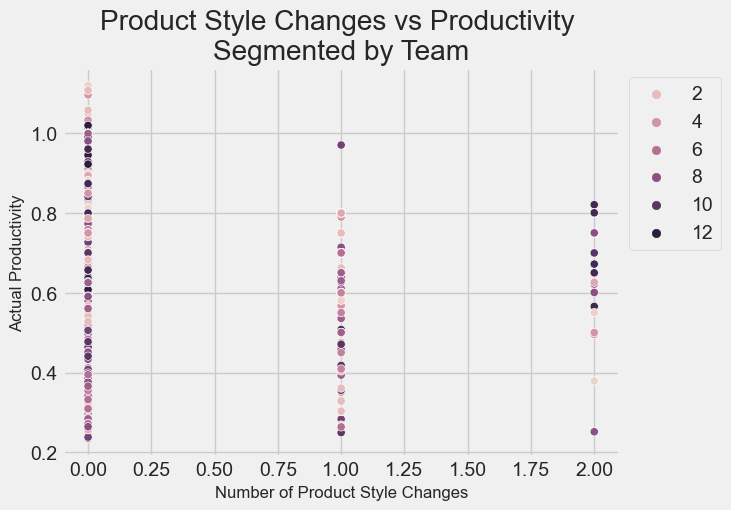

In [152]:
sns.scatterplot(data=df, x='no_of_style_change',
                y='actual_productivity', hue='team')
plt.xlabel('Number of Product Style Changes', size=12)
plt.ylabel('Actual Productivity', size=12)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.title('Product Style Changes vs Productivity \nSegmented by Team')
plt.show()

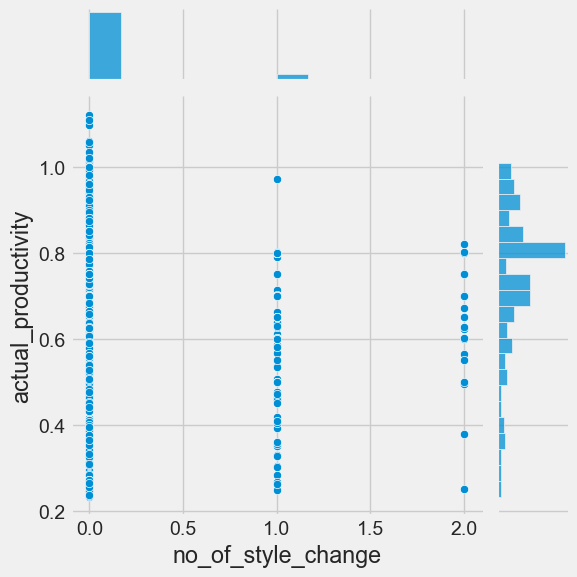

In [153]:
sns.jointplot(data=df, x='no_of_style_change',
              y='actual_productivity',
              edgecolor='white')
plt.xlabel('Product Style Changes', size=12)
plt.ylabel('Actual Productivity', size=12)
# plt.title('Standard Minute Value vs Productivity')
plt.show()

**Number of Workers in a Team vs Actual Productivity**

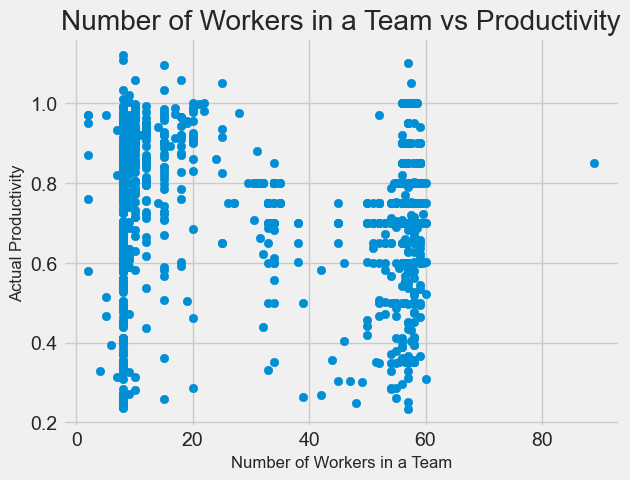

In [154]:
plt.scatter(x=df['no_of_workers'],
            y=df['actual_productivity'])
plt.xlabel('Number of Workers in a Team', size=12)
plt.ylabel('Actual Productivity', size=12)
plt.title('Number of Workers in a Team vs Productivity')
plt.show()

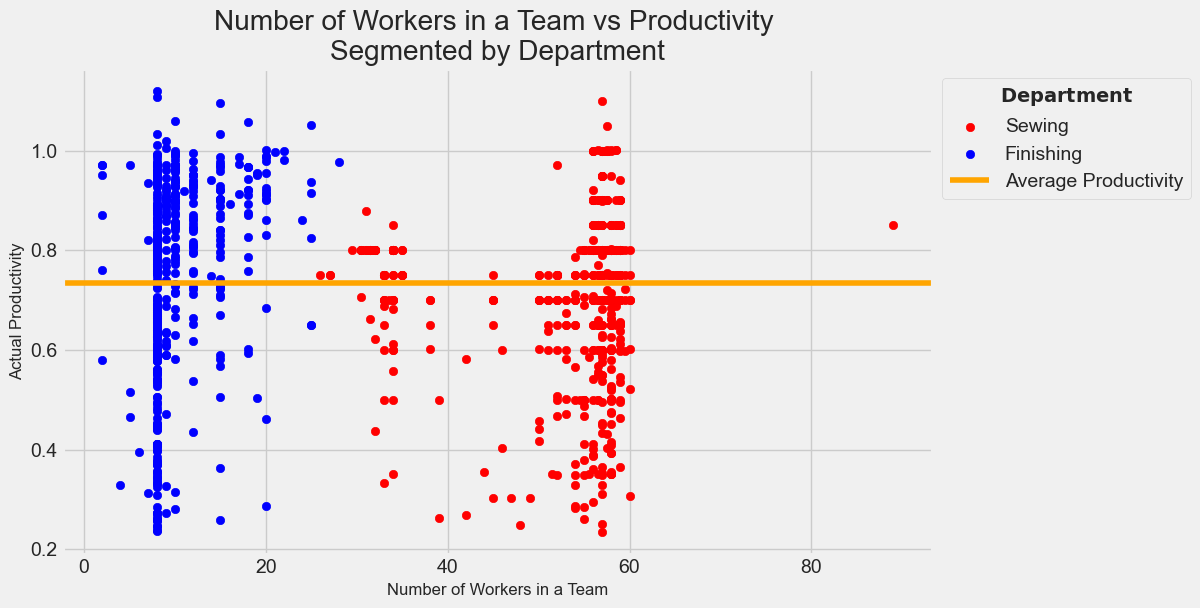

In [155]:
plt.figure(figsize=(10,6))

# Plot Records from Sewing Dept
plt.scatter(df.no_of_workers[df.department=='sewing'],
            df.actual_productivity[df.department=='sewing'],
            c="red",
            label='Sewing')

# # Plot Records from Finishing Dept
plt.scatter(df.no_of_workers[df.department=='finishing'],
            df.actual_productivity[df.department=='finishing'],
            c="blue",
            label='Finishing')

# Plot Average Productivity
plt.axhline(df.actual_productivity.mean(),
            color='orange',
            label='Average Productivity')

# Title, Legends and Labels
plt.xlabel('Number of Workers in a Team', size=12)
plt.ylabel('Actual Productivity', size=12)
plt.legend(title=r'$\bf{Department}$',
           loc='upper left', bbox_to_anchor=(1, 1))
plt.title('Number of Workers in a Team vs Productivity \nSegmented by Department')
plt.show()

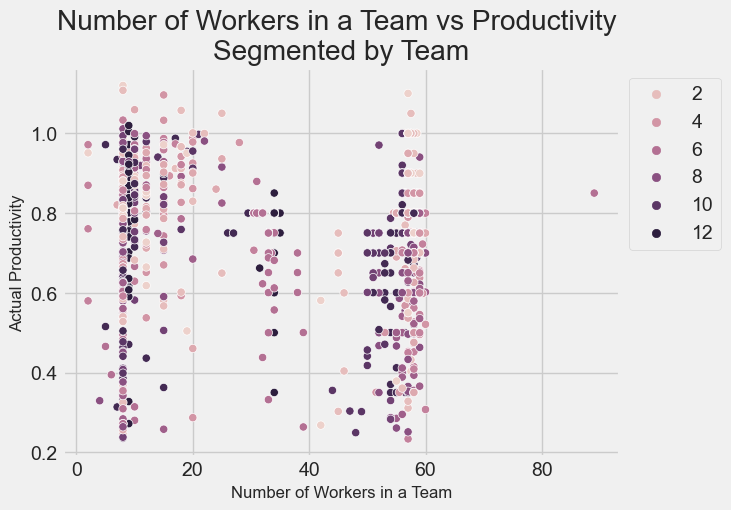

In [156]:
sns.scatterplot(data=df, x='no_of_workers',
                y='actual_productivity', hue='team')
plt.xlabel('Number of Workers in a Team', size=12)
plt.ylabel('Actual Productivity', size=12)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.title('Number of Workers in a Team vs Productivity \nSegmented by Team')
plt.show()

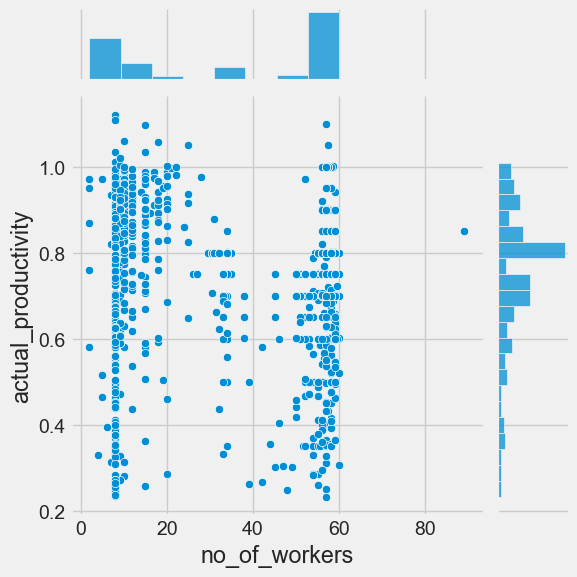

In [157]:
sns.jointplot(data=df, x='no_of_workers',
              y='actual_productivity',
              edgecolor='white')
plt.xlabel('Number of Workers in a Team', size=12)
plt.ylabel('Actual Productivity', size=12)
# plt.title('Standard Minute Value vs Productivity')
plt.show()

**Targeted Productivity vs Actual Productivity**

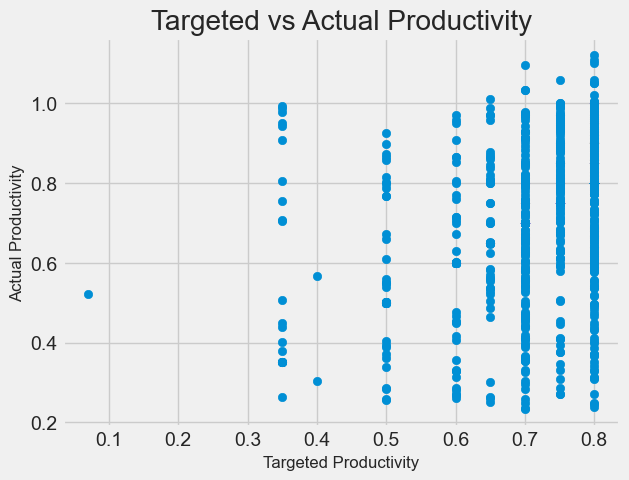

In [158]:
plt.scatter(x=df['targeted_productivity'],
            y=df['actual_productivity'])
plt.xlabel('Targeted Productivity', size=12)
plt.ylabel('Actual Productivity', size=12)
plt.title('Targeted vs Actual Productivity')
plt.show()

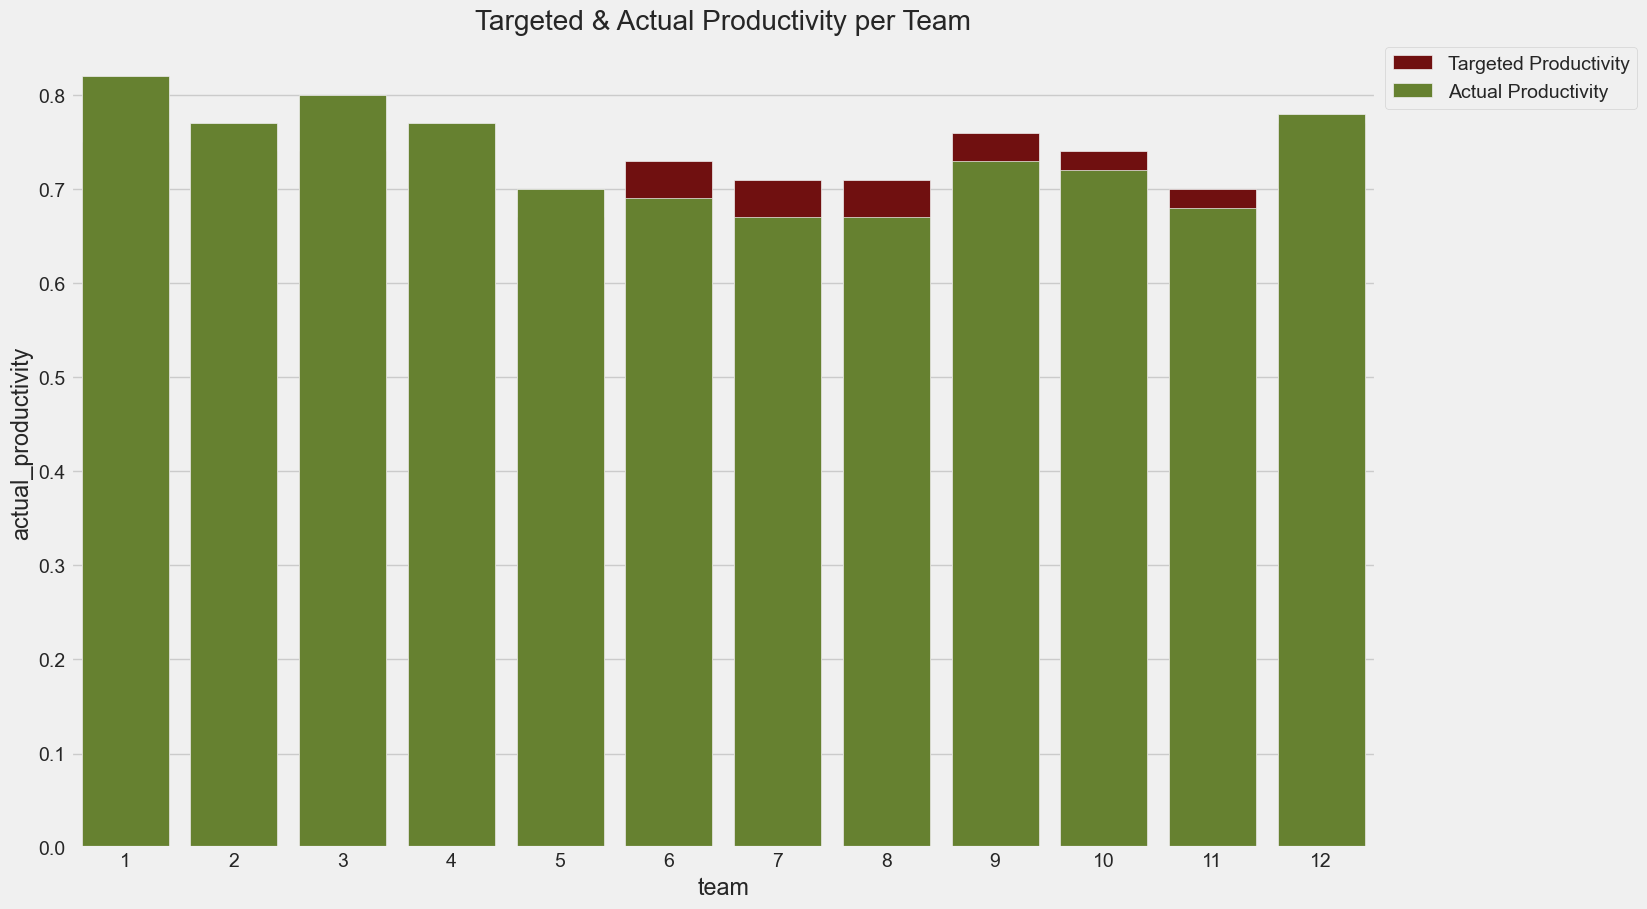

In [159]:
plt.figure(figsize=(15,10))
sns.barplot(data=team_df,
            x=team_df['team'],
            y=team_df['targeted_productivity'],
            color='maroon',
            label='Targeted Productivity')
sns.barplot(data=team_df,
            x=team_df['team'],
            y=team_df['actual_productivity'],
            color='olivedrab',
            label='Actual Productivity')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.title('Targeted & Actual Productivity per Team')
plt.show()

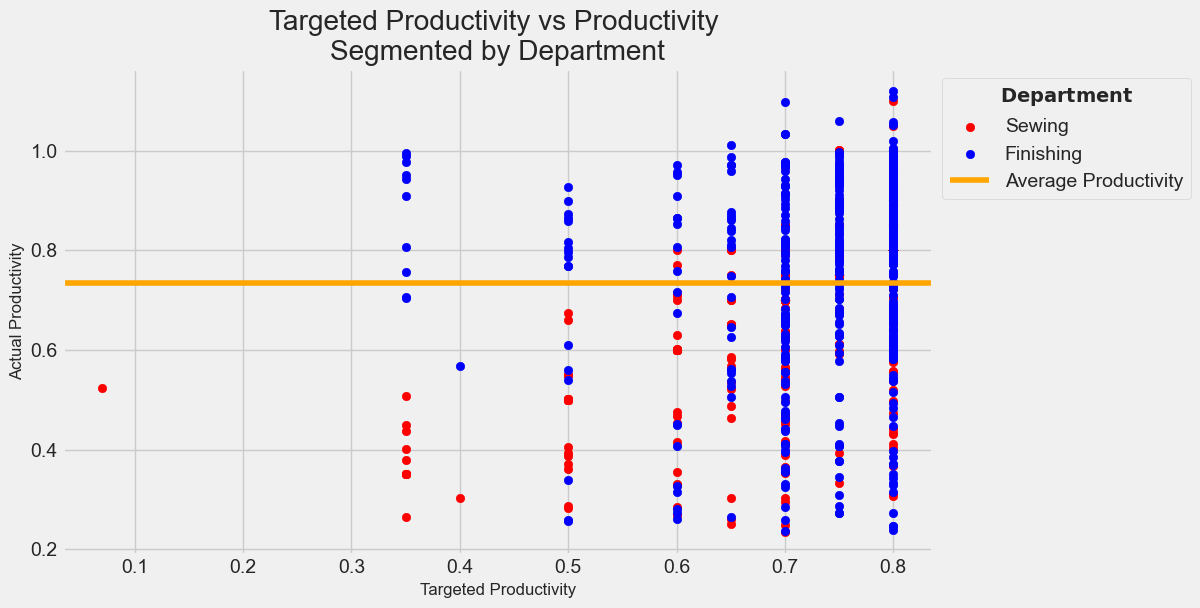

In [160]:
plt.figure(figsize=(10,6))

# Plot Records from Sewing Dept
plt.scatter(df.targeted_productivity[df.department=='sewing'],
            df.actual_productivity[df.department=='sewing'],
            c="red",
            label='Sewing')

# # Plot Records from Finishing Dept
plt.scatter(df.targeted_productivity[df.department=='finishing'],
            df.actual_productivity[df.department=='finishing'],
            c="blue",
            label='Finishing')

# Plot Average Productivity
plt.axhline(df.actual_productivity.mean(),
            color='orange',
            label='Average Productivity')

# Title, Legends and Labels
plt.xlabel('Targeted Productivity', size=12)
plt.ylabel('Actual Productivity', size=12)
plt.legend(title=r'$\bf{Department}$',
           loc='upper left', bbox_to_anchor=(1, 1))
plt.title('Targeted Productivity vs Productivity \nSegmented by Department')
plt.show()

Teams in the sewing department have higher targeted productivity and lower actual productivity rates, well below the average.

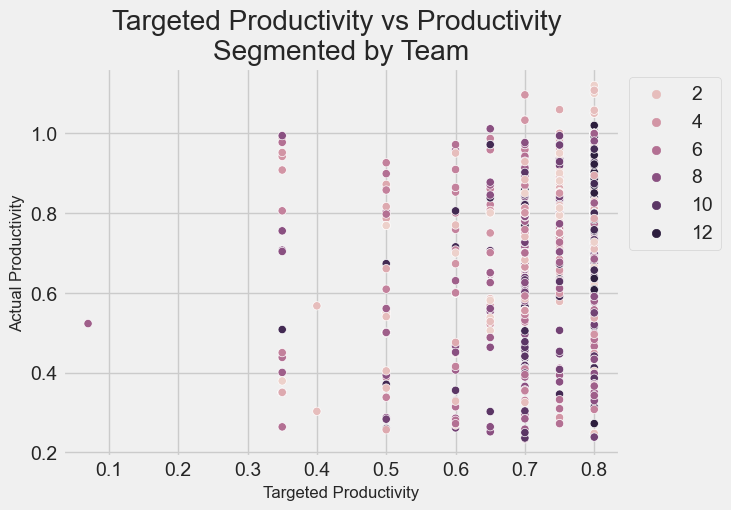

In [161]:
sns.scatterplot(data=df, x='targeted_productivity',
                y='actual_productivity', hue='team')
plt.xlabel('Targeted Productivity', size=12)
plt.ylabel('Actual Productivity', size=12)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.title('Targeted Productivity vs Productivity \nSegmented by Team')
plt.show()

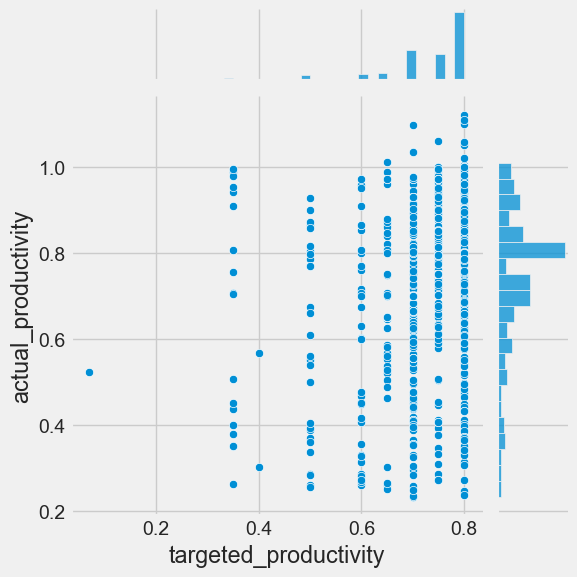

In [162]:
sns.jointplot(data=df, x='targeted_productivity',
              y='actual_productivity',
              edgecolor='white')
plt.xlabel('Targeted Productivity', size=12)
plt.ylabel('Actual Productivity', size=12)
# plt.title('Standard Minute Value vs Productivity')
plt.show()

In [163]:
df.head()

date   quarter department       day  team  targeted_productivity  \
0 2015-01-01  Quarter1     sewing  Thursday     8                   0.80   
1 2015-01-01  Quarter1  finishing  Thursday     1                   0.75   
2 2015-01-01  Quarter1     sewing  Thursday    11                   0.80   
3 2015-01-01  Quarter1     sewing  Thursday    12                   0.80   
4 2015-01-01  Quarter1     sewing  Thursday     6                   0.80   

     smv          wip  over_time  incentive  idle_time  idle_men  \
0  26.16  1108.000000       7080         98        0.0         0   
1   3.94   997.742268        960          0        0.0         0   
2  11.41   968.000000       3660         50        0.0         0   
3  11.41   968.000000       3660         50        0.0         0   
4  25.90  1170.000000       1920         50        0.0         0   

   no_of_style_change  no_of_workers  actual_productivity  
0                   0           59.0             0.940725  
1                   0            8.0             0.886500  
2                   0           30.5             0.800570  
3                   0           30.5             0.800570  
4                   0           56.0             0.800382

**Productivity Over Time**

In [164]:
actual_prod_wk = df.groupby(by=df.date.dt.week).agg({'actual_productivity':np.mean})
target_prod_wk = df.groupby(by=df.date.dt.week).agg({'targeted_productivity':np.mean})

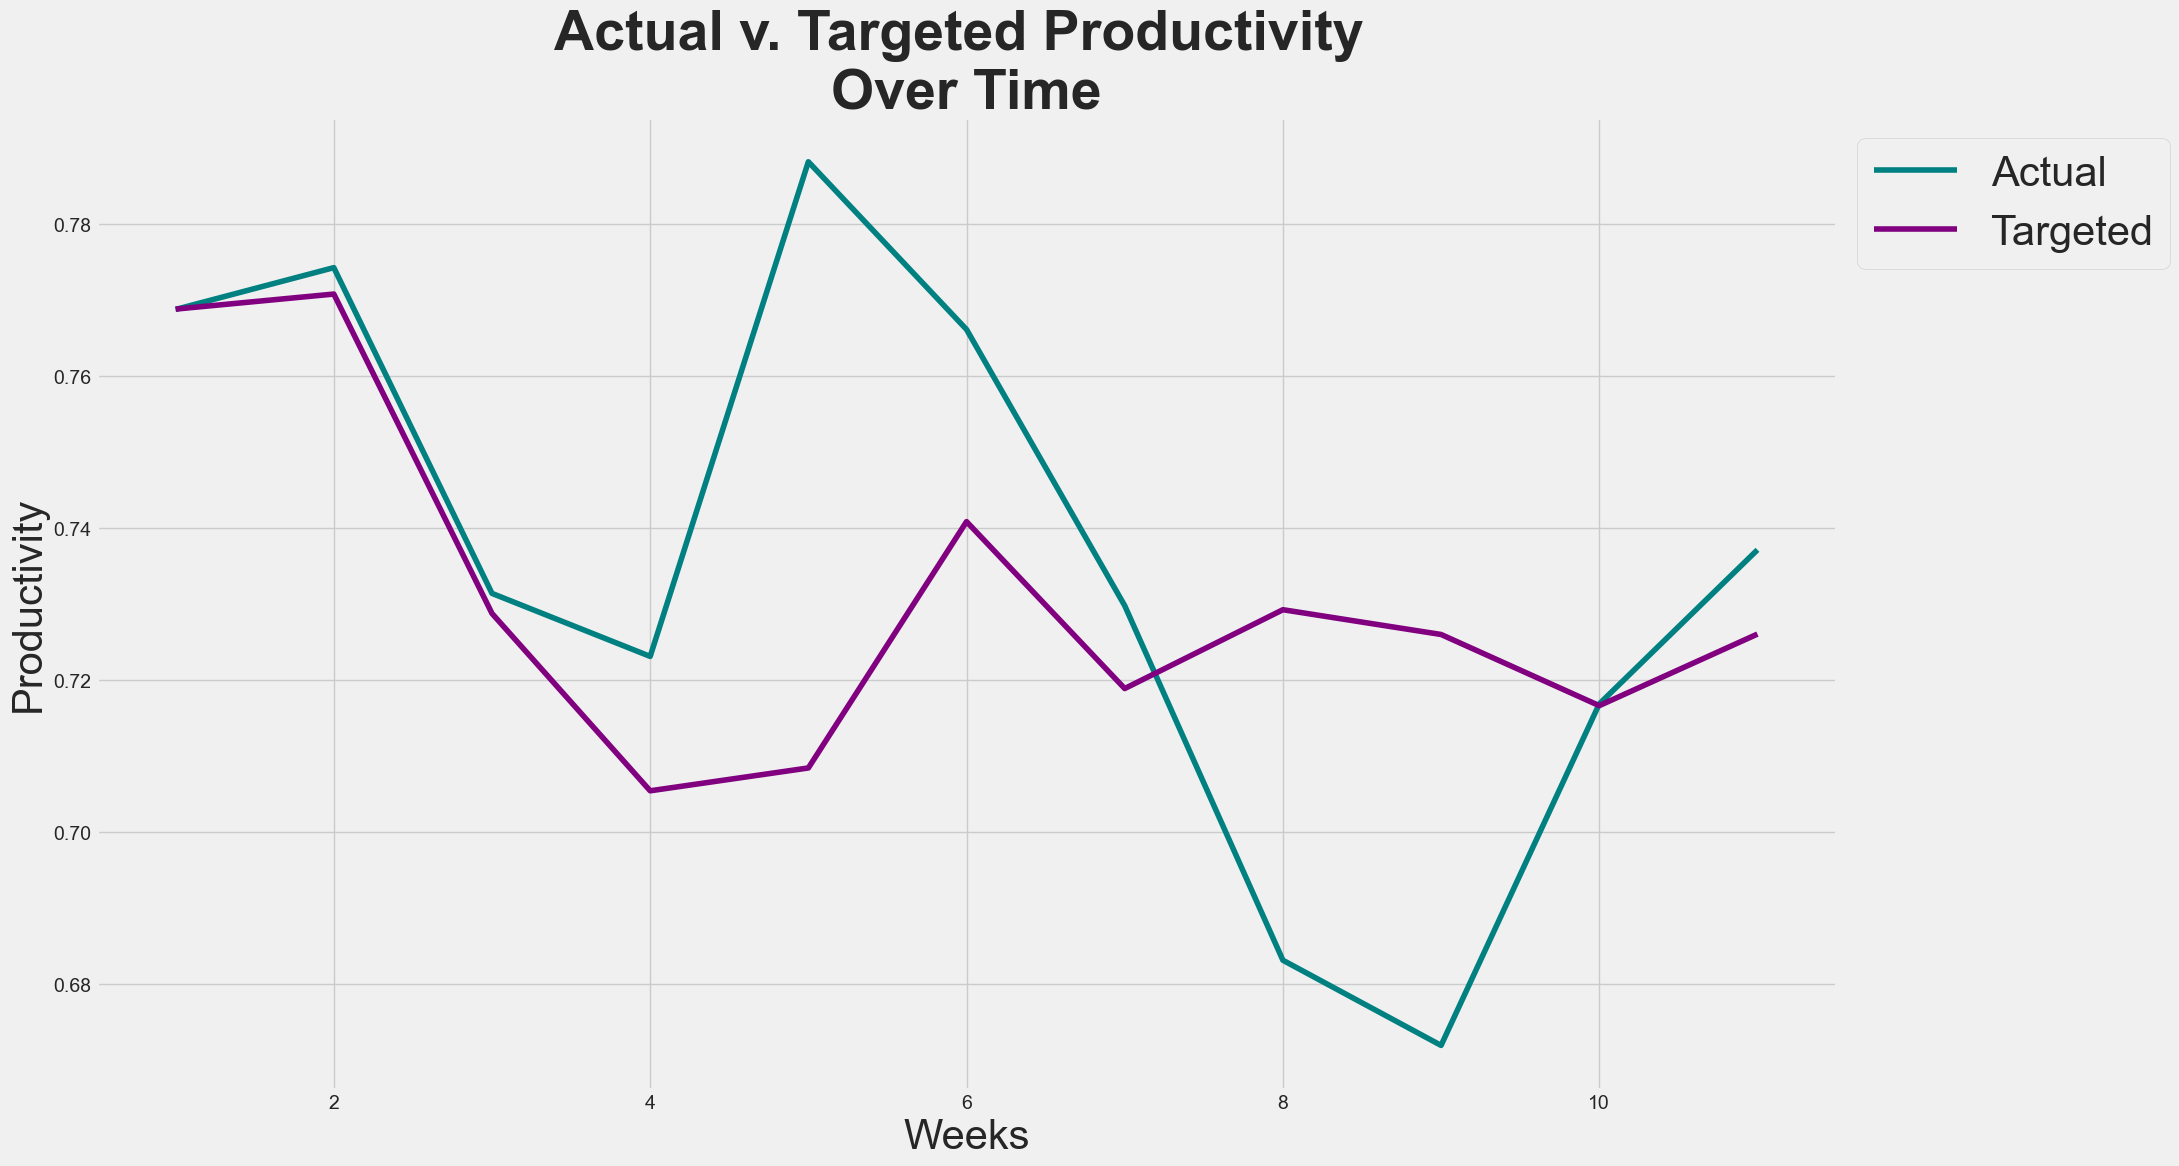

In [165]:
plt.figure(figsize=(20,12))

plt.plot(actual_prod_wk, color='teal', label='Actual')
plt.plot(target_prod_wk, color='purple', label='Targeted')
plt.xlabel('Weeks', size=30)
plt.ylabel('Productivity', size=30)
plt.legend(loc='upper left',
           bbox_to_anchor=(1, 1),
           fontsize=30)
plt.title('Actual v. Targeted Productivity \nOver Time', weight='bold', size=40)
plt.show()

Let's use the target and actual productivity column to build the target

In [166]:
df["productive"] = df["actual_productivity"] >= df["targeted_productivity"]

df['productive'] = df['productive'].apply(lambda x: 1 if x == True else 0)
df['productive'].sample(20)

889     1
930     1
647     1
1172    0
83      1
993     1
40      1
536     1
355     1
1066    0
503     1
948     1
973     1
581     1
903     1
1110    1
621     1
314     1
474     0
311     1
Name: productive, dtype: int64

Export df for Modeling

In [168]:
df.isnull().sum()

date                     0
quarter                  0
department               0
day                      0
team                     0
targeted_productivity    0
smv                      0
wip                      0
over_time                0
incentive                0
idle_time                0
idle_men                 0
no_of_style_change       0
no_of_workers            0
actual_productivity      0
productive               0
dtype: int64

In [169]:
df.to_csv('df_model.csv')